In [ ]:
#  ###########################################################################################
#  #                                    IN THE NAME OF ALLAH                                 #
#  #  STEEL PLATE LENGTH AND THICKNESS SENSITIVITY ANALYSIS WITH NONLINEAR DYNAMIC ANALYSIS  #
#  #-----------------------------------------------------------------------------------------#
#  #                        THIS PROGRAM WRITTEN BY SALAR DELAVAR QASHQAI                    #
#  #                              EMAIL: salar.d.ghashghaei@gmail.com                        #
#  ###########################################################################################

In [11]:
#import the os module
import os
import math
import time

In [12]:
#to create a directory at specified path with name "Data"
os.mkdir('C:\\OPENSEESPY_SALAR')
#this will create the directory with name 'Data' and will update it when we rerun the analysis,
# otherwise we have to keep deleting the old 'Data' Folder
dir = "C:\\OPENSEESPY_SALAR\\OPENSEESPY_DATA"
if not os.path.exists(dir):
    os.makedirs(dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\OPENSEESPY_SALAR'

In [62]:
def MAXABS_FUN(DATA_FILE, COLUMN, I):
    import numpy as np
    # Read and process displacement data
    NameFiles = DATA_FILE
    filename = f"{NameFiles}_{I}.txt"
    D = np.loadtxt(filename)
    #print(D)
    MAXABS = np.max(np.abs([D[:, COLUMN]]))
    #print("MAX. ABS. :", MAXABS)
    return MAXABS
# -----------------------------------------------
def PLOT_2D(X, Y, Xfit, Yfit, XLABEL, YLABEL, TITLE, COLOR, Z):
    import matplotlib.pyplot as plt
    if Z == 1:
        # Plot 1 line
        plt.figure(figsize=(12, 8))
        plt.plot(X, Y,color=COLOR)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.title(TITLE)
        plt.grid(True)
        plt.show()
    if Z == 2:
        plt.plot(X, Y, Xfit, Yfit, 'r--', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend(['curve', 'bilinear fitted'], loc='lower right')
        plt.grid(True)
        plt.show()
#--------------------------------------------
def HISROGRAM_BOXPLOT(X, HISTO_COLOR, LABEL):
    import numpy as np
    import matplotlib.pyplot as plt
    X = np.array(X)
    print("-------------------------")
    from scipy.stats import skew, kurtosis
    MINIMUM = np.min(X)
    MAXIMUM = np.max(X)
    #MODE = max(set(X), key=list(X).count)
    MEDIAN = np.quantile(X, .50)#q2
    MEAN = np.mean(X)
    STD = np.std(X)
    q1 = np.quantile(X, .25)
    q3 = np.quantile(X, .75)
    SKEW = skew(X)
    KURT = kurtosis(X)
    #SKEW = (MEAN - MODE) / STD
    #KURT = (np.mean((X - MEAN)**4) / STD**4)
    # Estimate confidence intervals of the output variable
    lower_bound = np.quantile(X, .05)
    upper_bound = np.quantile(X, .95)
    print("Box-Chart Datas: ")
    print(f'Minimum: {MINIMUM:.4e}')
    print(f'First quartile: {q1:.4e}')
    #print(f'Mode: {MODE:.4e}')
    print(f'Median: {MEDIAN:.4e}')
    print(f'Mean: {MEAN:.4e}')
    print(f'Std: {STD:.4e}')
    print(f'Third quartile: {q3:.4e}')
    print(f'Maximum: {MAXIMUM :.4e}')
    print(f'Skewness: {skew(X) :.4e}')
    print(f'kurtosis: {kurtosis(X) :.4e}')
    print(f"90% Confidence Interval: ({lower_bound:.4e}, {upper_bound:.4e})")
    print("-------------------------")

    plt.figure(figsize=(10,6))
    # Plot histogram of data
    count, bins, ignored = plt.hist(X, bins=100, color=HISTO_COLOR, density=True, align='mid')#, edgecolor="black"
    
    # Plot lognormal PDF
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(x - MEAN)**2 / (2 * STD**2)) / (STD * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, color='r', label="Normal PDF")
    
    # Plot vertical lines for risk measures
    plt.axvline(q1, color="black", linestyle="--", label=f"Quantile 0.25: {q1:.4e}")
    plt.axvline(MEDIAN, color="green", linestyle="--", label=f"Median: {MEDIAN:.4e}")
    plt.axvline(q3, color="black", linestyle="--", label=f"Quantile 0.75: {q3:.4e}")
    #plt.axvline(MODE, color="purple", linestyle="--", label=f"Mode: {MODE:.4e}")
    plt.axvline(MEAN, color="red", linestyle="--", label=f"Mean: {MEAN:.4e}")
    plt.axvline(MEAN-STD, color="blue", linestyle="--", label=f"Mean-Std: {MEAN-STD:.4e}")
    plt.axvline(MEAN+STD, color="blue", linestyle="--", label=f"Mean+Std: {MEAN+STD:.4e}")
    plt.xlabel(LABEL)
    plt.ylabel("Frequency")
    prob = np.sum(X > 0) / len(X)
    plt.title(f"Histogram - Probability of Positive {LABEL} is {100*prob:.2f} %")
    plt.legend()
    #plt.grid()
    plt.show()

    #Plot boxplot with outliers
    plt.figure(figsize=(10,6))
    plt.boxplot(X, vert=0)
    # Write the quartile data on the chart
    plt.text(q1, 1.05, f" Q1: {q1:.4e}")
    plt.text(MEDIAN, 1.1, f" Q2: {MEDIAN:.4e}")
    plt.text(q3, 1.05, f" Q3: {q3:.4e}")
    #plt.text(MODE, 1.15, f" Mode: {MODE:.4e}")
    
    #plt.text(MEAN, 0.9, f" Mean: {MEAN:.4e}")
    #plt.text(MEAN-STD, 0.9, f" Mean-Std: {MEAN-STD:.4e}")
    #plt.text(MEAN+STD, 0.9, f" Mean+Std: {MEAN+STD:.4e}")
    plt.scatter(MEAN, 1, color="red", marker="+", s=200, label=f"Mean: {MEAN:.4e}")
    plt.scatter(MEAN-STD, 1, color="green", marker="X", s=200, label=f"Mean-Std: {MEAN-STD:.4e}")
    plt.scatter(MEAN+STD, 1, color="blue", marker="*", s=200, label=f"Mean+Std:  {MEAN+STD:.4e}")
    plt.xlabel(LABEL)
    plt.ylabel("Data")
    plt.title(f"Boxplot of {LABEL}")
    plt.legend()
    plt.grid()
    plt.show()
# -----------------------------------------------    
def PLOT_TIME_HIS(DTH, VTH, ATH, BTH):
    ## PLOT THE DATA
    import matplotlib.pyplot as plt
    # Create a 1x3 grid of subplots
    fig, axs = plt.subplots(4, 1, figsize=(14, 14))

    # Plot Displacement
    axs[0].plot(DTH, label='Displacement')
    axs[0].set_title(f'Last Analysis Displacement Time History - Max(Abs): {np.max(np.abs(DTH)):.6f}')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Displacement')
    axs[0].grid()

    # Plot Velocity
    axs[1].plot(VTH, label='Velocity', color='purple')
    axs[1].set_title(f'Last Analysis Velocity Time History - Max(Abs): {np.max(np.abs(ATH)):.6f}')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Velocity')
    axs[1].grid()

    # Plot Acceleration
    axs[2].plot(ATH, label='Acceleration', color='green')
    axs[2].set_title(f'Last Analysis Acceleration Time History - Max(Abs): {np.max(np.abs(ATH)):.6f}')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Acceleration')
    axs[2].grid()
    
    # Plot Base Shear
    axs[3].plot(BTH, label='Base Shear', color='orange')
    axs[3].set_title(f'Last Analysis Base Shear Time History - Max(Abs): {np.max(np.abs(BTH)):.6f}')
    axs[3].set_xlabel('Time')
    axs[3].set_ylabel('Base Shear')
    axs[3].grid()

    # Adjust layout
    plt.tight_layout()
    plt.show()    
# -----------------------------------------------
def OUTPUT_SECOND_COLUMN(X, COLUMN):
    import numpy as np
    # Time History
    filename = f"C:\OPENSEESPY_SALAR\OPENSEESPY_DATA\\{X}.txt"
    data_collected = np.loadtxt(filename)
    X = data_collected[:, COLUMN]
    return X     
# -----------------------------------------------
def BETA_PDF(MIN_X, MAX_X, a, b):
    import numpy as np
    return MIN_X + (MAX_X - MIN_X) * np.random.beta(a, b)
# -----------------------------------------------
def PLOT3D(x, y, z, XLABEL, YLABEL, ZLABEL, TITLE):
    import plotly.graph_objects as go
    # Create a 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5))])
    fig.update_layout(scene=dict(xaxis_title=XLABEL, yaxis_title=YLABEL, zaxis_title=ZLABEL), title=TITLE)
    fig.show()
# -----------------------------------------------    
def HISTOGRAM_BOXPLOT_PLOTLY( DATA, XLABEL='X', TITLE='A', COLOR='cyan'):
    # Plotting histogram and boxplot
    import plotly.express as px
    fig = px.histogram(x=DATA, marginal="box", color_discrete_sequence=[COLOR])
    fig.update_layout(title=TITLE, xaxis_title=XLABEL, yaxis_title="Frequency")
    fig.show() 
# -----------------------------------------------     
# Create a scatter plot
def PLOT_SCATTER(X, Y , XLABEL, YLABEL, TITLE, COLOR):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.scatter(X, Y, color=COLOR, marker='o')
    # Add labels and title
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)

    # Show the plot
    plt.grid(True)
    plt.semilogx();plt.semilogy();
    plt.show()

def plot_scatter_plotly(X, Y, XLABEL, YLABEL, TITLE, COLOR):
    import plotly.express as px
    fig = px.scatter(x=X, y=Y, color_discrete_sequence=[COLOR], labels={XLABEL: XLABEL, YLABEL: YLABEL})
    fig.update_layout(title=TITLE, xaxis_type='log', yaxis_type='log')
    fig.show() 
# ----------------------------------------------- 
def PLOT_HEATMAP(df):
    import plotly.figure_factory as ff
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create a correlation heatmap
    fig = ff.create_annotated_heatmap(
        z=corr_matrix.values,
        x=list(corr_matrix.columns),
        y=list(corr_matrix.index),
        annotation_text=corr_matrix.round(5).values,
        showscale=True,
        colorscale='Viridis'
    )

    # Update layout
    fig.update_layout(
        title='Correlation Heatmap',
        xaxis=dict(title='Variable'),
        yaxis=dict(title='Variable'),
        width=800, height=700
    )

    fig.show()

In [14]:
# pip install openseespy

In [15]:
# OUTPUT DATA ADDRESS:
SALAR_DIR = 'C:/OPENSEESPY_SALAR/OPENSEESPY_DATA/';

In [41]:
#
#    ^Y
#    |
#    2       __ 
#    |          | 
#    |          |
#    |          |
#  (1)       LCol
#    |          |
#    |          |
#    |          |
#  =1=      _|_  -------->X
#

# SET UP ----------------------------------------------------------------------------


#########################################################################################################################################################################

def DYNAMIC_ANALYSIS(LR, TR, HCol, BCol, LCol, coverCol, Weight, numBarsCol, BD, fc, I):
    import openseespy.opensees as op
    op.wipe()
    op.model('basic', '-ndm', 2, '-ndf', 3) 
    PCol =Weight  # nodal dead-load weight per column
    g =  9810 # mm/s^2
    Mass =  PCol/g

    #ACol = BCol*HCol;  # cross-sectional area, make stiff
    IzCol = (BCol* HCol**3)/12; # Column moment of inertia
    L = LCol - LR; # NOT Retrofitrd Length
    # nodal coordinates:
    op.node(1, 0.0, 0.0) # node#, X, Y
    op.node(2, 0.0, LR)
    op.node(3, 0.0, LCol)
    # Single point constraints -- Boundary Conditions
    op.fix(1, 1, 1, 1) # node DX DY RZ
    # node#, Mx My Mz, Mass=Weight/g, neglect rotational inertia at nodes
    op.mass(2, Mass, 1e-9, 0.0)
    
    barAreaCol = (3.1415 * BD**2) / 4  # area of longitudinal-reinforcement bars
    
    ColSecTag01 = 1			# Retrofited Section - assign a tag number to the column section
    ColSecTag02 = 2			# Not Retrofited Section - assign a tag number to the column section
    # MATERIAL parameters -------------------------------------------------------------------
    IDconcCore = 1; 				# material ID tag -- confined core concrete
    IDconcCover = 2; 				# material ID tag -- unconfined cover concrete
    IDreinf = 3; 				# material ID tag -- reinforcement
    IDrp = 4; 				# material ID tag -- retofited plate 
    
    # nominal concrete compressive strength
    Ec = 4700 * math.sqrt(-fc) # Concrete Elastic Modulus (the term in sqr root needs to be in psi

    # confined concrete
    Kfc = 1.3;			# ratio of confined to unconfined concrete strength
    fc1C = Kfc*fc;		# CONFINED concrete (mander model), maximum stress
    eps1C = 2*fc1C/Ec;	# strain at maximum stress 
    fc2C = 0.2*fc1C;		# ultimate stress
    eps2C = 5*eps1C;		# strain at ultimate stress 
    # unconfined concrete
    fc1U = fc;			# UNCONFINED concrete (todeschini parabolic model), maximum stress
    eps1U = -0.0025;			# strain at maximum strength of unconfined concrete
    fc2U = 0.2*fc1U;		# ultimate stress
    eps2U = -0.012;			# strain at ultimate stress
    Lambda = 0.1;				# ratio between unloading slope at $eps2 and initial slope $Ec
    # tensile-strength properties
    ftC = -0.55*fc1C;		# tensile strength +tension
    ftU = -0.55*fc1U;		# tensile strength +tension
    Ets = ftU/0.002;		# tension softening stiffness
    # REBAR MATERIAL PROPERTIES:
    Fy = 4000			# Steel rebar yield stress
    Cy = 0.02			# Steel rebar yield strain
    Es = Fy/Cy				# modulus of steel
    Bs = 0.01				# strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches
    # PLATE MATERIAL PROPERTIES:
    FyP = 2400			# Steel plate yield stress
    CyP = 0.02			# Steel plate yield strain
    Es = FyP/CyP				# modulus of steel
    Bs = 0.01				# strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches

    op.uniaxialMaterial('Concrete02', IDconcCore, fc1C, eps1C, fc2C, eps2C, Lambda, ftC, Ets) # build cover concrete (confined)
    op.uniaxialMaterial('Concrete02', IDconcCover, fc1U, eps1U, fc2U, eps2U, Lambda, ftU, Ets) # build cover concrete (unconfined)
    op.uniaxialMaterial('Steel02', IDreinf, Fy, Es, Bs, R0,cR1,cR2) # build reinforcement material
    op.uniaxialMaterial('Steel02', IDrp, FyP, Es, Bs, R0,cR1,cR2) # build retrofited plate material
    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #             ---------------------     --   --
    #             |   o  o   o   o    |     |    -- cover
    #             |                   |     |
    #             |   o           o   |     |
    #    z <---   |          +        |     H
    #             |   o           o   |     |
    #             |                   |     |
    #             |   o  o    o   o   |     |    -- cover
    #             ---------------------     --   --
    #             |-------- B --------|
    #
    # RC section: 

    coverY = (HCol+TR) / 2.0	# The distance from the section z-axis to the edge of the cover concrete -- outer edge of cover concrete
    coverZ = (BCol+TR) / 2.0	# The distance from the section y-axis to the edge of the cover concrete -- outer edge of cover concrete
    
    plateY = coverY - TR
    plateZ = coverZ - TR
    coreY = coverY - coverCol - TR
    coreZ = coverZ - coverCol - TR
    coreY02 = coreY - 50 # Middle Rebar Distance
    coreZ02 = coreZ      # Middle Rebar Distance
    
    #MID_numBarsCol = numBarsCol/2
    nfPlateY = 16;			# number of fibers for concrete in y-direction -- plate steel
    nfPlateZ = 4;			# number of fibers for concrete in z-direction
    nfCoreY = 16;			# number of fibers for concrete in y-direction -- core concrete
    nfCoreZ = 4;			# number of fibers for concrete in z-direction
    nfCoverY = 16;			# number of fibers for concrete in y-direction -- cover concrete
    nfCoverZ = 4;			# number of fibers for concrete in z-direction
    # -----------------------------------------------------------------------------------------------------
    # RETROFITED SECTION: 
    op.section('Fiber', ColSecTag01)
    # Define the four plate patches
    op.patch('quad', IDrp, nfPlateZ, nfPlateY, -coverY, coverZ, -plateY, plateZ, plateY, plateZ, coverY, coverZ) # Define the plate patch
    op.patch('quad', IDrp, nfPlateZ, nfPlateY, -plateY, -plateZ, -coverY, -coverZ, coverY, -coverZ, plateY, -plateZ) # Define the plate patch
    op.patch('quad', IDrp, nfPlateZ, nfPlateY, -coverY, coverZ, -coverY, -coverZ, -plateY, -plateZ, -plateY, plateZ) # Define the plate patch
    op.patch('quad', IDrp, nfPlateZ, nfPlateY, plateY, plateZ, plateY, -plateZ, coverY, -coverZ, coverY, coverZ) # Define the plate patch
    # Define the core patch
    op.patch('quad', IDconcCore, nfCoreZ, nfCoreY, -coreY,coreZ, -coreY,-coreZ, coreY,-coreZ, coreY, coreZ) # Define the concrete patch
    # Define the four cover patches
    op.patch('quad', IDconcCover, nfCoverZ, nfCoverY, -coverY, coverZ, -coreY, coreZ, coreY, coreZ, coverY, coverZ) # Define the concrete patch
    op.patch('quad', IDconcCover, nfCoverZ, nfCoverY, -coreY, -coreZ, -coverY, -coverZ, coverY, -coverZ, coreY, -coreZ) # Define the concrete patch
    op.patch('quad', IDconcCover, nfCoverZ, nfCoverY, -coverY, coverZ, -coverY, -coverZ, -coreY, -coreZ, -coreY, coreZ) # Define the concrete patch
    op.patch('quad', IDconcCover, nfCoverZ, nfCoverY, coreY, coreZ, coreY, -coreZ, coverY, -coverZ, coverY, coverZ) # Define the concrete patch
    # Define reinfocement layers    
    op.layer('straight', IDreinf, numBarsCol, barAreaCol, coreY, coreZ, coreY, -coreZ)# top layer reinforcement
    op.layer('straight', IDreinf, 2, barAreaCol, coreY02, coreZ02, coreY02, -coreZ02)# middle top layer reinforcement
    op.layer('straight', IDreinf, 2, barAreaCol, -coreY02, coreZ02, -coreY02, -coreZ02)# middle bottom layer reinforcement
    op.layer('straight', IDreinf, numBarsCol, barAreaCol, -coreY, coreZ, -coreY, -coreZ)# bottom layer reinfocement
    
    ColTransfTag01 = 1
    op.geomTransf('Linear', ColTransfTag01)
    numIntgrPts = 5
    eleTag = 1
    op.element('nonlinearBeamColumn', eleTag, 1, 2, numIntgrPts, ColSecTag01, ColTransfTag01)
    # -----------------------------------------------------------------------------------------------------
    # NOT RETROFITED SECTION:
    op.section('Fiber', ColSecTag02)
    # Define the core patch
    op.patch('quad', IDconcCore, nfCoreZ, nfCoreY, -coreY, coreZ, -coreY,-coreZ, coreY,-coreZ, coreY, coreZ) # Define the concrete patch
    # Define the four cover patches
    op.patch('quad', IDconcCover, nfCoverZ, nfCoverY, -coverY,coverZ, -coreY, coreZ, coreY, coreZ, coverY,coverZ) # Define the concrete patch
    op.patch('quad', IDconcCover, nfCoverZ, nfCoverY, -coreY, -coreZ, -coverY, -coverZ, coverY, -coverZ, coreY, -coreZ) # Define the concrete patch
    op.patch('quad', IDconcCover, nfCoverZ, nfCoverY, -coverY, coverZ, -coverY, -coverZ, -coreY, -coreZ, -coreY, coreZ) # Define the concrete patch
    op.patch('quad', IDconcCover, nfCoverZ, nfCoverY, coreY, coreZ, coreY, -coreZ, coverY,-coverZ, coverY,coverZ) # Define the concrete patch
    # Define reinfocement layers    
    op.layer('straight', IDreinf, numBarsCol, barAreaCol, coreY, coreZ, coreY, -coreZ)# top layer reinforcement
    op.layer('straight', IDreinf, 2, barAreaCol, coreY02, coreZ02, coreY02, -coreZ02)# middle top layer reinforcement
    op.layer('straight', IDreinf, 2, barAreaCol, -coreY02, coreZ02, -coreY02, -coreZ02)# middle bottom layer reinforcement
    op.layer('straight', IDreinf, numBarsCol, barAreaCol, -coreY, coreZ, -coreY, -coreZ)# bottom layer reinfocement
    
    ColTransfTag02 = 2
    op.geomTransf('Linear', ColTransfTag02)
    numIntgrPts = 5
    eleTag = 2
    op.element('nonlinearBeamColumn', eleTag, 2, 3, numIntgrPts, ColSecTag02, ColTransfTag02)
    # -----------------------------------------------------------------------------------------------------

    #import InelasticFiberSection
    op.recorder('EnvelopeNode','-file', f"{SALAR_DIR}MD.txt" ,'-time','-node',2,'-dof',1,'disp');# max. displacements of free nodes 2
    op.recorder('EnvelopeNode','-file', f"{SALAR_DIR}MD02_{I}.txt" ,'-time','-node',3,'-dof',1,'disp');# max. displacements of free nodes 3
    op.recorder('EnvelopeNode','-file',f"{SALAR_DIR}MV.txt" ,'-time','-node',3,'-dof',1,'disp');# max. vel of free nodes 3
    op.recorder('EnvelopeNode','-file', f"{SALAR_DIR}MA.txt" ,'-time','-node',3,'-dof',1,'disp');# max. accel of free nodes 3	
    op.recorder('Node', '-file', f"{SALAR_DIR}DTH.txt",'-time', '-node', 2, '-dof', 1,2,3, 'disp')# Displacement Time History
    op.recorder('Node', '-file', f"{SALAR_DIR}VTH.txt",'-time', '-node', 2, '-dof', 1,2,3, 'vel')# Vel Time History
    op.recorder('Node', '-file', f"{SALAR_DIR}ATH.txt",'-time', '-node', 2, '-dof', 1,2,3, 'accel')# Accel Time History
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_{I}.txt",'-time', '-node', 1, '-dof', 1,2,3, 'reaction')# Base Shear Time History
    op.recorder('Element', '-file', f"{SALAR_DIR}FCol.txt",'-time', '-ele', 1, 'globalForce')
    op.recorder('Element', '-file', f"{SALAR_DIR}ForceColSec1.txt",'-time', '-ele', 1, 'section', 1, 'force')
    op.recorder('Element', '-file', f"{SALAR_DIR}DCol.txt",'-time', '-ele', 1, 'section', 5, 'deformations')# Rotation Time History nodes 1
    #op.recorder('Element', '-file', f"{SALAR_DIR}FCol.txt",'-time', '-ele', 1, 'section', 1, 'globalForce')
    #op.recorder('Element', '-file', f"{SALAR_DIR}stCol.txt",'-time', '-ele', 1, 'section', 1,'fiber',coverY, 0,IDreinf, 'stressStrain')# Stress and Strain Time History nodes 1


    #defining gravity loads
    op.timeSeries('Linear', 1)
    op.pattern('Plain', 1, 1)
    op.load(2, 0.0, -PCol, 0.0)

    Tol = 1e-8 # convergence tolerance for test
    NstepGravity = 10
    DGravity = 1/NstepGravity
    op.integrator('LoadControl', DGravity) # determine the next time step for an analysis
    op.numberer('Plain') # renumber dof's to minimize band-width (optimization), if you want to
    op.system('BandGeneral') # how to store and solve the system of equations in the analysis
    op.constraints('Plain') # how it handles boundary conditions
    op.test('NormDispIncr', Tol, 6) # determine if convergence has been achieved at the end of an iteration step
    op.algorithm('Newton') # use Newton's solution algorithm: updates tangent stiffness at every iteration
    op.analysis('Static') # define type of analysis static or transient
    op.analyze(NstepGravity) # apply gravity

    op.loadConst('-time', 0.0) #maintain constant gravity loads and reset time to zero

    #applying Dynamic Ground motion analysis
    GMdirection = 1
    GMfile = 'BM68elc.acc'
    GMfact = 1.0



    Lambda01 = op.eigen('-fullGenLapack', 1) # eigenvalue mode 1
    Lambda02 = op.eigen('-genBandArpack', 1) # eigenvalue mode 1
    #print(Lambda)
    Omega = math.pow(max(min(Lambda01), min(Lambda02)), 0.5)
    betaKcomm = 2 * (0.02/Omega)

    xDamp = 0.02				# 2% damping ratio
    alphaM = 0.0				# M-prop. damping; D = alphaM*M	
    betaKcurr = 0.0		# K-proportional damping;      +beatKcurr*KCurrent
    betaKinit = 0.0 # initial-stiffness proportional damping      +beatKinit*Kini

    op.rayleigh(alphaM,betaKcurr, betaKinit, betaKcomm) # RAYLEIGH damping

    # Uniform EXCITATION: acceleration input
    IDloadTag = 400			# load tag
    dt = 0.01			# time step for input ground motion
    GMfatt = 1.0			# data in input file is in g Unifts -- ACCELERATION TH
    maxNumIter = 10
    op.timeSeries('Path', 2, '-dt', dt, '-filePath', GMfile, '-factor', GMfact)
    op.pattern('UniformExcitation', IDloadTag, GMdirection, '-accel', 2) 

    op.wipeAnalysis()
    op.constraints('Transformation')
    op.numberer('Plain')
    op.system('BandGeneral')
    op.test('EnergyIncr', Tol, maxNumIter)
    op.algorithm('ModifiedNewton')

    NewmarkGamma = 0.5
    NewmarkBeta = 0.25
    op.integrator('Newmark', NewmarkGamma, NewmarkBeta)
    op.analysis('Transient')

    DtAnalysis = 0.01
    TmaxAnalysis = 10.0

    Nsteps =  int(TmaxAnalysis/ DtAnalysis)

    ok = op.analyze(Nsteps, DtAnalysis)

    tCurrent = op.getTime()

    # for gravity analysis, load control is fine, 0.1 is the load factor increment (http://opensees.berkeley.edu/wiki/index.php/Load_Control)

    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:

            if ok != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], Tol, 1000)
                ok = op.analyze(Nsteps, DtAnalysis)                            
                print(test[i], algorithm[j], ok)             
                if ok == 0:
                    break
            else:
                continue

    #u2 = op.nodeDisp(2, 1)
    #print("u2 = ", u2)
    print('Ground Motion Done.')
    op.wipe()
    


In [43]:
### ---------------------------------------------------------------------
###    COMPOSITE SECTION COLUMN PLATE THICKNESS AND LENGTH SENSITIVITY 
### ---------------------------------------------------------------------

# define section geometry
LR_MIN = 500 # [mm] Minimum Retrofit Column length
LR_MAX = 1000 # [mm] Maximum Retrofit Column length
TR_MIN = 4# [mm] Minimum [mm] Retrofit Column Section Plate Thickness
TR_MAX = 12# [mm] Maximum [mm] Retrofit Column Section Plate Thickness

LCol = 3000.0 # [mm] Column length
HCol = 300 # [mm] Column Depth
BCol = 300 # [mm] Column Width
coverCol = 50.0   # [mm] Column cover to reinforcing steel NA.
Weight = 100000.0 # [N] superstructure weight
numBarsCol = 4  # number of longitudinal-reinforcement bars in column. (symmetric top & bot)
BD = 18  # [mm] Rebar Diamater
fc = -25.0 # [N/mm^2] Concrete Compressive Strength (+Tension, -Compression)

#TARGET_PGD = 0.0000005 # [mm] Target Demand Max. Abs. Displacement Time History

lr = [] # Retrofit Column length array
tr = [] # Retrofit Column Section Plate Thickness array
# monitor cpu time
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

NUM_ITERATION = 20000
### FIND THE OPTIMUM VALUE 
for i in range(NUM_ITERATION):
    LR = BETA_PDF(LR_MIN, LR_MAX, 1, 1)# Random Retrofit Column length
    TR = BETA_PDF(TR_MIN, TR_MAX, 1, 1)# Random Retrofit Column Section Plate Thickness
    lr.append(LR);tr.append(TR);
    DYNAMIC_ANALYSIS(LR, TR, HCol, BCol, LCol, coverCol, Weight, numBarsCol, BD, fc, i)
    print(f' {i+1} LR {LR} TR {TR}')
    
    
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

Current time (HH:MM:SS): 12:12:41


Ground Motion Done.
 1 LR 638.4913460186121 TR 7.034540990253685
Ground Motion Done.
 2 LR 920.4076978620446 TR 7.39325064598683
Ground Motion Done.
 3 LR 755.082357324608 TR 11.989207069026985
Ground Motion Done.
 4 LR 619.3913732784536 TR 6.749727938439696
Ground Motion Done.
 5 LR 844.39764219587 TR 11.757290558499946
Ground Motion Done.
 6 LR 992.1645673738595 TR 9.02990244571389
Ground Motion Done.
 7 LR 829.861538855953 TR 7.775405203938268
Ground Motion Done.
 8 LR 992.9918762411385 TR 10.261826890427443
Ground Motion Done.
 9 LR 594.0290836339659 TR 6.775612797698048
Ground Motion Done.
 10 LR 969.2489602025105 TR 11.744468530020988
Ground Motion Done.
 11 LR 853.5800114467504 TR 7.315890670234094
Ground Motion Done.
 12 LR 669.6151820832757 TR 6.604766257878449
Ground Motion Done.
 13 LR 668.4101013366881 TR 5.777400658527711
Ground Motion Done.
 14 LR 761.8152163927921 TR 6.209437104194338
Ground Motion Done.
 15 LR 981.6115251075756 TR 9.8

Ground Motion Done.
 126 LR 931.309124526326 TR 9.129565220689443
Ground Motion Done.
 127 LR 610.1017317603403 TR 11.997722478224851
Ground Motion Done.
 128 LR 517.1320748322677 TR 7.0478222786395515
Ground Motion Done.
 129 LR 994.5338078401346 TR 4.218596282738782
Ground Motion Done.
 130 LR 525.0218457794901 TR 7.352711060696798
Ground Motion Done.
 131 LR 800.7030542371978 TR 5.311323015109406
Ground Motion Done.
 132 LR 845.8478538561999 TR 7.657359014610302
Ground Motion Done.
 133 LR 922.6670777625267 TR 11.95538252550747
Ground Motion Done.
 134 LR 837.4532723968564 TR 7.781130194603632
Ground Motion Done.
 135 LR 781.2041462005791 TR 6.146553757437413
Ground Motion Done.
 136 LR 713.2110314814743 TR 9.31746609107191
Ground Motion Done.
 137 LR 662.4149067645321 TR 9.274684492931016
Ground Motion Done.
 138 LR 645.7688061407894 TR 5.272339598309985
Ground Motion Done.
 139 LR 618.4413856926736 TR 4.1577652628250625
Ground Motion Done.
 140 LR 531.9995319028275 TR 6.7072473216

Ground Motion Done.
 252 LR 832.11098269577 TR 10.911737114078427
Ground Motion Done.
 253 LR 660.4300652515852 TR 11.405521695629691
Ground Motion Done.
 254 LR 860.378019277761 TR 5.624979310333841
Ground Motion Done.
 255 LR 954.3705096523648 TR 8.221287069101841
Ground Motion Done.
 256 LR 875.7841814793925 TR 9.549953180673572
Ground Motion Done.
 257 LR 821.5052778266235 TR 10.991485899719905
Ground Motion Done.
 258 LR 871.0257230355983 TR 8.248710707839825
Ground Motion Done.
 259 LR 968.0024490910919 TR 11.63616229156743
Ground Motion Done.
 260 LR 664.7743242032072 TR 6.192118858275931
Ground Motion Done.
 261 LR 594.5819656110982 TR 10.21413246204644
Ground Motion Done.
 262 LR 589.0648644356102 TR 7.903595138860222
Ground Motion Done.
 263 LR 986.5633814291316 TR 6.547976760054553
Ground Motion Done.
 264 LR 553.7000818508301 TR 6.849870988787479
Ground Motion Done.
 265 LR 591.4205991906545 TR 7.236500409441559
Ground Motion Done.
 266 LR 722.6388690717981 TR 6.48472697723

Ground Motion Done.
 377 LR 633.5068945269251 TR 11.386749554993413
Ground Motion Done.
 378 LR 506.921590283235 TR 8.351457439899196
Ground Motion Done.
 379 LR 773.9098409857402 TR 9.398867909360872
Ground Motion Done.
 380 LR 807.126922242495 TR 10.20079712573875
Ground Motion Done.
 381 LR 785.2133082344392 TR 11.389242100114739
Ground Motion Done.
 382 LR 515.8367051963419 TR 9.830817998860756
Ground Motion Done.
 383 LR 503.13419046619094 TR 5.687911974672277
Ground Motion Done.
 384 LR 870.8121862836406 TR 9.400148960344566
Ground Motion Done.
 385 LR 808.0778402398535 TR 9.933636952738652
Ground Motion Done.
 386 LR 695.3620183836583 TR 6.035480300383437
Ground Motion Done.
 387 LR 791.5381560320373 TR 10.111443856037637
Ground Motion Done.
 388 LR 901.9745292045939 TR 5.49934478070182
Ground Motion Done.
 389 LR 611.1261129354153 TR 5.251524040022137
Ground Motion Done.
 390 LR 853.978937895758 TR 9.19931379574109
Ground Motion Done.
 391 LR 869.7291373699911 TR 4.002672658132

Ground Motion Done.
 501 LR 643.7588200912999 TR 10.489506600711106
Ground Motion Done.
 502 LR 552.2786238996501 TR 10.593882158141067
Ground Motion Done.
 503 LR 782.4075089472503 TR 7.629454821535999
Ground Motion Done.
 504 LR 979.2038662953719 TR 11.317125152996386
Ground Motion Done.
 505 LR 831.9496540399134 TR 4.8263657078153175
Ground Motion Done.
 506 LR 702.1689343236275 TR 8.611904607984872
Ground Motion Done.
 507 LR 579.005459856756 TR 11.102040870241424
Ground Motion Done.
 508 LR 819.2086140379836 TR 4.284332451356951
Ground Motion Done.
 509 LR 957.4238311057176 TR 8.225121175275053
Ground Motion Done.
 510 LR 988.7148599008096 TR 8.974658758710268
Ground Motion Done.
 511 LR 652.1597447112115 TR 5.838451167978318
Ground Motion Done.
 512 LR 709.3877453636427 TR 10.52077355055459
Ground Motion Done.
 513 LR 690.00222438063 TR 10.906107438457443
Ground Motion Done.
 514 LR 971.8196012465628 TR 5.349849412029468
Ground Motion Done.
 515 LR 683.85029406883 TR 4.2940516594

Ground Motion Done.
 626 LR 621.6219559573788 TR 7.36776599978892
Ground Motion Done.
 627 LR 526.8851850923828 TR 7.89736097363897
Ground Motion Done.
 628 LR 936.2350469403789 TR 4.040352125203505
Ground Motion Done.
 629 LR 606.6112314606005 TR 4.746515028955429
Ground Motion Done.
 630 LR 866.0404518782841 TR 6.014839152268617
Ground Motion Done.
 631 LR 509.60216127162306 TR 4.608123252597079
Ground Motion Done.
 632 LR 730.0566676912861 TR 11.496627185379953
Ground Motion Done.
 633 LR 964.7594401984381 TR 6.031398706167188
Ground Motion Done.
 634 LR 904.6437704265463 TR 4.548450868370966
Ground Motion Done.
 635 LR 615.2008110342338 TR 8.715879267552115
Ground Motion Done.
 636 LR 916.1220853695181 TR 5.637584468504433
Ground Motion Done.
 637 LR 971.7348186630461 TR 11.82719918528934
Ground Motion Done.
 638 LR 860.1288101368618 TR 9.504269159719541
Ground Motion Done.
 639 LR 998.0074659493653 TR 6.14190225405471
Ground Motion Done.
 640 LR 905.4887196887994 TR 8.562867991997

Ground Motion Done.
 749 LR 886.9115216751445 TR 6.075991166964661
Ground Motion Done.
 750 LR 842.1998410382974 TR 6.701518704355263
Ground Motion Done.
 751 LR 758.8081831071656 TR 6.159466928978394
Ground Motion Done.
 752 LR 684.1479332246614 TR 7.339451262318071
Ground Motion Done.
 753 LR 970.2926162489664 TR 7.590372223109058
Ground Motion Done.
 754 LR 847.1585785213758 TR 7.042645197522515
Ground Motion Done.
 755 LR 888.2183523578833 TR 6.4788015134713515
Ground Motion Done.
 756 LR 859.9168255024247 TR 8.920937171254046
Ground Motion Done.
 757 LR 699.1984013970109 TR 11.747571920114297
Ground Motion Done.
 758 LR 726.6407302824971 TR 6.088644038824963
Ground Motion Done.
 759 LR 681.9453268226719 TR 5.674741307408903
Ground Motion Done.
 760 LR 835.3325616283036 TR 8.058917331199607
Ground Motion Done.
 761 LR 779.7214950032212 TR 5.954182525420837
Ground Motion Done.
 762 LR 745.6489180012206 TR 4.973534197392775
Ground Motion Done.
 763 LR 777.5509460453331 TR 10.06922108

Ground Motion Done.
 872 LR 906.4390815501135 TR 7.757266778954178
Ground Motion Done.
 873 LR 737.2142761743908 TR 6.1517051875835325
Ground Motion Done.
 874 LR 779.0885668152521 TR 8.625360921456098
Ground Motion Done.
 875 LR 917.049586404609 TR 6.972829300137649
Ground Motion Done.
 876 LR 717.4841200277631 TR 11.062527900063127
Ground Motion Done.
 877 LR 989.7465604016429 TR 8.945780789587939
Ground Motion Done.
 878 LR 598.8022983361927 TR 4.845721378373944
Ground Motion Done.
 879 LR 849.0510652738471 TR 5.557887176118642
Ground Motion Done.
 880 LR 587.938000707424 TR 7.214756427206375
Ground Motion Done.
 881 LR 919.1712086528821 TR 9.80961743544108
Ground Motion Done.
 882 LR 728.6131544010772 TR 4.941035709269328
Ground Motion Done.
 883 LR 638.9451175716321 TR 11.416917774747734
Ground Motion Done.
 884 LR 769.69328164124 TR 11.77701110094409
Ground Motion Done.
 885 LR 891.6740411195766 TR 6.7812716381782385
Ground Motion Done.
 886 LR 656.4238282460592 TR 9.897823501387

Ground Motion Done.
 996 LR 844.7499678608738 TR 9.535570345042643
Ground Motion Done.
 997 LR 768.5641882619286 TR 11.625174293354803
Ground Motion Done.
 998 LR 710.8844611303068 TR 8.966403457111262
Ground Motion Done.
 999 LR 973.0644930764336 TR 9.278337506659456
Ground Motion Done.
 1000 LR 800.815207326212 TR 9.54848272663493
Ground Motion Done.
 1001 LR 812.5981260708805 TR 5.636283396143378
Ground Motion Done.
 1002 LR 549.335265608165 TR 8.248726745004456
Ground Motion Done.
 1003 LR 651.4300257734452 TR 5.744270846206375
Ground Motion Done.
 1004 LR 994.8362383210417 TR 10.095361598811436
Ground Motion Done.
 1005 LR 601.0272875080963 TR 5.031316845872054
Ground Motion Done.
 1006 LR 597.0840673201935 TR 7.5063052935950285
Ground Motion Done.
 1007 LR 574.093840122611 TR 4.499385170497655
Ground Motion Done.
 1008 LR 774.9223342169475 TR 5.174271892511145
Ground Motion Done.
 1009 LR 911.8182615821162 TR 11.337171938452688
Ground Motion Done.
 1010 LR 614.3517008386057 TR 5.

Ground Motion Done.
 1118 LR 786.4637082104293 TR 4.176657624996511
Ground Motion Done.
 1119 LR 930.3135836549118 TR 6.392177936139188
Ground Motion Done.
 1120 LR 934.9758006094057 TR 10.589159494315606
Ground Motion Done.
 1121 LR 903.9924886913386 TR 5.49006371464179
Ground Motion Done.
 1122 LR 679.5886193858427 TR 11.670069992422736
Ground Motion Done.
 1123 LR 510.16487578703607 TR 6.783507577737531
Ground Motion Done.
 1124 LR 736.1150128320484 TR 10.575986210233136
Ground Motion Done.
 1125 LR 802.5628856506446 TR 10.745017931150645
Ground Motion Done.
 1126 LR 683.6850943801234 TR 5.77239884235888
Ground Motion Done.
 1127 LR 619.4841839446989 TR 9.175357168401238
Ground Motion Done.
 1128 LR 902.3283589122948 TR 10.470626773020646
Ground Motion Done.
 1129 LR 828.0972346981399 TR 8.53763318475022
Ground Motion Done.
 1130 LR 708.1145260255396 TR 7.050968918899466
Ground Motion Done.
 1131 LR 903.4744907430681 TR 11.074655927096078
Ground Motion Done.
 1132 LR 885.94816146072

Ground Motion Done.
 1243 LR 699.1413813315344 TR 9.624869419467188
Ground Motion Done.
 1244 LR 961.3634365154543 TR 5.954616269609037
Ground Motion Done.
 1245 LR 576.2318307658934 TR 5.1518650444909655
Ground Motion Done.
 1246 LR 964.3652108479291 TR 11.65020989490153
Ground Motion Done.
 1247 LR 543.4384839442556 TR 11.1597272312612
Ground Motion Done.
 1248 LR 840.4913080308718 TR 11.584877673689927
Ground Motion Done.
 1249 LR 630.9866650299174 TR 7.031351924441756
Ground Motion Done.
 1250 LR 659.7070474251941 TR 7.284417823559561
Ground Motion Done.
 1251 LR 534.2999698739832 TR 6.405046303056713
Ground Motion Done.
 1252 LR 731.9193956759199 TR 6.241044357508538
Ground Motion Done.
 1253 LR 808.1542702552999 TR 10.540684231184414
Ground Motion Done.
 1254 LR 891.9239322906141 TR 4.0452191607450025
Ground Motion Done.
 1255 LR 606.3957498550606 TR 8.304691690718553
Ground Motion Done.
 1256 LR 513.4167094411204 TR 11.92859051363601
Ground Motion Done.
 1257 LR 775.801533743311

Ground Motion Done.
 1364 LR 628.1663169745375 TR 11.242077307602388
Ground Motion Done.
 1365 LR 968.0232623025934 TR 6.913406243145729
Ground Motion Done.
 1366 LR 659.8497982946881 TR 9.281062510515232
Ground Motion Done.
 1367 LR 772.163763445389 TR 11.565979944485488
Ground Motion Done.
 1368 LR 554.1700832140866 TR 5.502716652266591
Ground Motion Done.
 1369 LR 847.8816781332521 TR 5.079396321647059
Ground Motion Done.
 1370 LR 703.6507105507756 TR 11.130286906147447
Ground Motion Done.
 1371 LR 731.1659571295818 TR 10.549552697013697
Ground Motion Done.
 1372 LR 757.0051358435246 TR 5.492424677805141
Ground Motion Done.
 1373 LR 885.4774029588402 TR 6.977843150424861
Ground Motion Done.
 1374 LR 896.5347092425225 TR 9.386937796763771
Ground Motion Done.
 1375 LR 872.6036627665292 TR 5.206200252290297
Ground Motion Done.
 1376 LR 723.1978107635858 TR 5.831208988752527
Ground Motion Done.
 1377 LR 795.3004461436675 TR 8.283373578178406
Ground Motion Done.
 1378 LR 711.480707771777

Ground Motion Done.
 1488 LR 655.4716332412042 TR 7.850445883465106
Ground Motion Done.
 1489 LR 868.0924342114185 TR 5.03811750101962
Ground Motion Done.
 1490 LR 902.9505906299016 TR 6.586681946607984
Ground Motion Done.
 1491 LR 684.0115586609919 TR 10.515845508259739
Ground Motion Done.
 1492 LR 802.3667166210348 TR 11.00314868815871
Ground Motion Done.
 1493 LR 811.294307824872 TR 9.991195288669907
Ground Motion Done.
 1494 LR 584.3739919567225 TR 9.285876034344163
Ground Motion Done.
 1495 LR 637.2020782966284 TR 11.864762739289286
Ground Motion Done.
 1496 LR 685.7578070188638 TR 11.558936229019729
Ground Motion Done.
 1497 LR 635.1498202170551 TR 9.489613735074883
Ground Motion Done.
 1498 LR 782.1242452490308 TR 7.147208416824664
Ground Motion Done.
 1499 LR 951.2744117363553 TR 4.625044416173136
Ground Motion Done.
 1500 LR 934.2405862892974 TR 8.503310160875063
Ground Motion Done.
 1501 LR 596.3579200241904 TR 7.028323339457921
Ground Motion Done.
 1502 LR 898.2844628240885 

Ground Motion Done.
 1609 LR 666.4610792753783 TR 4.362513043385889
Ground Motion Done.
 1610 LR 832.7039690795193 TR 5.361786438358556
Ground Motion Done.
 1611 LR 638.9024216834564 TR 6.081056563933895
Ground Motion Done.
 1612 LR 898.9524575442576 TR 4.469646432562129
Ground Motion Done.
 1613 LR 651.9582596059582 TR 7.620849067348115
Ground Motion Done.
 1614 LR 920.69424840472 TR 10.682988841792447
Ground Motion Done.
 1615 LR 796.486393763752 TR 5.923219799852595
Ground Motion Done.
 1616 LR 623.5626652966406 TR 5.507450428255798
Ground Motion Done.
 1617 LR 755.5711739566265 TR 10.881729365144249
Ground Motion Done.
 1618 LR 959.6034842124529 TR 10.967889263592905
Ground Motion Done.
 1619 LR 890.1526114408293 TR 5.876158327338803
Ground Motion Done.
 1620 LR 843.5304207286858 TR 11.354231205977616
Ground Motion Done.
 1621 LR 755.4140021136678 TR 10.351477080098311
Ground Motion Done.
 1622 LR 575.3844153467714 TR 10.979278534367396
Ground Motion Done.
 1623 LR 746.845634472300

Ground Motion Done.
 1731 LR 858.6900651659628 TR 9.830219573783735
Ground Motion Done.
 1732 LR 844.2217922778414 TR 9.155529577460289
Ground Motion Done.
 1733 LR 738.0276457956152 TR 8.180908485179543
Ground Motion Done.
 1734 LR 631.6938269445772 TR 6.870219374188215
Ground Motion Done.
 1735 LR 964.3781404680162 TR 10.310182755206197
Ground Motion Done.
 1736 LR 852.6793362217945 TR 5.804435357302422
Ground Motion Done.
 1737 LR 990.5898334707966 TR 11.448509908013444
Ground Motion Done.
 1738 LR 652.2539626574649 TR 11.766244102593317
Ground Motion Done.
 1739 LR 765.8074542294225 TR 6.8926567625278
Ground Motion Done.
 1740 LR 852.9796132518411 TR 4.469008787496858
Ground Motion Done.
 1741 LR 567.5445517162377 TR 9.534994400637437
Ground Motion Done.
 1742 LR 665.0668255151073 TR 4.161723713116884
Ground Motion Done.
 1743 LR 646.4528300028686 TR 4.757320808329114
Ground Motion Done.
 1744 LR 567.6030614816744 TR 6.203279020598719
Ground Motion Done.
 1745 LR 545.1553904111169 

Ground Motion Done.
 1852 LR 896.886693556592 TR 4.113221919252753
Ground Motion Done.
 1853 LR 690.4760784277186 TR 10.471411543187632
Ground Motion Done.
 1854 LR 941.5720680639047 TR 8.61386946494144
Ground Motion Done.
 1855 LR 592.3032254326968 TR 5.430472718234965
Ground Motion Done.
 1856 LR 693.5725822945761 TR 11.961039791328734
Ground Motion Done.
 1857 LR 866.9998096205064 TR 5.459940590688859
Ground Motion Done.
 1858 LR 529.0556808113727 TR 11.979051055782065
Ground Motion Done.
 1859 LR 620.9014731299153 TR 10.340564138200449
Ground Motion Done.
 1860 LR 582.5578903092395 TR 10.445054178781177
Ground Motion Done.
 1861 LR 770.6591839487764 TR 4.9458769704409065
Ground Motion Done.
 1862 LR 721.2280787425872 TR 11.444380704637702
Ground Motion Done.
 1863 LR 540.026369020972 TR 4.001685748864371
Ground Motion Done.
 1864 LR 988.4239986036404 TR 5.839792966769362
Ground Motion Done.
 1865 LR 686.2397171094426 TR 9.773595894560298
Ground Motion Done.
 1866 LR 772.09779999495

Ground Motion Done.
 1973 LR 749.264758150666 TR 5.081090985303045
Ground Motion Done.
 1974 LR 908.3705866091992 TR 10.340495766920203
Ground Motion Done.
 1975 LR 569.2038999940811 TR 11.540434196446995
Ground Motion Done.
 1976 LR 679.0979677309019 TR 10.249572876246152
Ground Motion Done.
 1977 LR 770.2405449831564 TR 9.227690745044733
Ground Motion Done.
 1978 LR 854.4984088085876 TR 11.022330158658843
Ground Motion Done.
 1979 LR 812.343972782916 TR 11.989231425385135
Ground Motion Done.
 1980 LR 943.2157613722582 TR 4.723402006235386
Ground Motion Done.
 1981 LR 971.4884955420862 TR 9.952027622334105
Ground Motion Done.
 1982 LR 640.186925960794 TR 6.011517787317766
Ground Motion Done.
 1983 LR 672.6563729445238 TR 5.62422815850602
Ground Motion Done.
 1984 LR 650.4757083451472 TR 11.692010204403534
Ground Motion Done.
 1985 LR 573.018348867637 TR 9.643062896888836
Ground Motion Done.
 1986 LR 666.908781852507 TR 6.189544464591393
Ground Motion Done.
 1987 LR 516.0499337372734 T

Ground Motion Done.
 2094 LR 885.721250039989 TR 11.054607164001578
Ground Motion Done.
 2095 LR 654.4296434622034 TR 5.042383181658587
Ground Motion Done.
 2096 LR 921.6140662216785 TR 8.220500807857988
Ground Motion Done.
 2097 LR 552.0218689328409 TR 11.37117408058264
Ground Motion Done.
 2098 LR 811.8682866720906 TR 11.984304262305038
Ground Motion Done.
 2099 LR 811.7354068810196 TR 10.370559567433755
Ground Motion Done.
 2100 LR 838.6223758107174 TR 8.293616937051176
Ground Motion Done.
 2101 LR 658.3864752868404 TR 8.807556482160722
Ground Motion Done.
 2102 LR 934.97047558085 TR 7.323254911105218
Ground Motion Done.
 2103 LR 999.0297452531231 TR 6.00166486326048
Ground Motion Done.
 2104 LR 636.5768750361576 TR 6.494920070329569
Ground Motion Done.
 2105 LR 895.3347454408859 TR 5.376978754883265
Ground Motion Done.
 2106 LR 972.2368323519324 TR 5.150335500540283
Ground Motion Done.
 2107 LR 766.1883023449914 TR 11.788364653534313
Ground Motion Done.
 2108 LR 680.8190559930617 T

Ground Motion Done.
 2216 LR 577.0039819322541 TR 10.037903044299881
Ground Motion Done.
 2217 LR 606.1136034859154 TR 6.216005911621645
Ground Motion Done.
 2218 LR 687.8316533018015 TR 10.677435281402683
Ground Motion Done.
 2219 LR 950.869752779906 TR 7.186890536820211
Ground Motion Done.
 2220 LR 890.9196437872993 TR 11.174443654577283
Ground Motion Done.
 2221 LR 575.3234968341479 TR 4.059837290733043
Ground Motion Done.
 2222 LR 679.4130481124778 TR 10.093163976076465
Ground Motion Done.
 2223 LR 981.8455846680268 TR 6.751078670140544
Ground Motion Done.
 2224 LR 952.7081832217335 TR 4.5285548876232795
Ground Motion Done.
 2225 LR 854.8554530958927 TR 7.7356214732206094
Ground Motion Done.
 2226 LR 528.3079154987704 TR 6.515055193287646
Ground Motion Done.
 2227 LR 619.8801207271075 TR 10.629387513698571
Ground Motion Done.
 2228 LR 727.2697263422987 TR 8.302898961803388
Ground Motion Done.
 2229 LR 623.2722369228842 TR 7.603542815572325
Ground Motion Done.
 2230 LR 501.935849652

Ground Motion Done.
 2339 LR 820.8025965302602 TR 9.907101409760639
Ground Motion Done.
 2340 LR 635.4348245671001 TR 6.803516646959797
Ground Motion Done.
 2341 LR 952.6788341574438 TR 4.519856869523187
Ground Motion Done.
 2342 LR 562.6578289391175 TR 7.623090394424048
Ground Motion Done.
 2343 LR 676.3055822565701 TR 6.281313440521901
Ground Motion Done.
 2344 LR 793.7785439469235 TR 7.920601032410499
Ground Motion Done.
 2345 LR 517.4329239300351 TR 11.442744684365389
Ground Motion Done.
 2346 LR 520.6733427544905 TR 6.639913182066698
Ground Motion Done.
 2347 LR 580.8106207837284 TR 8.430549469732348
Ground Motion Done.
 2348 LR 648.7402365462037 TR 10.362597224225144
Ground Motion Done.
 2349 LR 950.4604362624154 TR 10.947785504735045
Ground Motion Done.
 2350 LR 801.7695609634031 TR 4.672247579847837
Ground Motion Done.
 2351 LR 782.5908047943421 TR 9.43366385260929
Ground Motion Done.
 2352 LR 882.5779988962433 TR 6.3959255639325345
Ground Motion Done.
 2353 LR 556.065564803865

Ground Motion Done.
 2461 LR 703.4218693511754 TR 8.555418534140792
Ground Motion Done.
 2462 LR 642.5526142576326 TR 5.353261958784477
Ground Motion Done.
 2463 LR 983.0395835546494 TR 4.622718292175935
Ground Motion Done.
 2464 LR 921.0375575793792 TR 7.858052809285889
Ground Motion Done.
 2465 LR 836.5472919945646 TR 10.224748685856042
Ground Motion Done.
 2466 LR 976.942913756005 TR 7.8678392210278005
Ground Motion Done.
 2467 LR 839.1456581966453 TR 6.727996741428647
Ground Motion Done.
 2468 LR 722.5748912308368 TR 11.745133909738328
Ground Motion Done.
 2469 LR 781.2346320580223 TR 7.971921673847357
Ground Motion Done.
 2470 LR 735.4153299237655 TR 10.61496269688617
Ground Motion Done.
 2471 LR 712.7445792199533 TR 11.670058584499849
Ground Motion Done.
 2472 LR 718.340426662044 TR 5.55502017583688
Ground Motion Done.
 2473 LR 525.5109290885465 TR 9.508319298579845
Ground Motion Done.
 2474 LR 735.9558106896384 TR 9.247198601229538
Ground Motion Done.
 2475 LR 902.024573333442 T

Ground Motion Done.
 2582 LR 644.7825086832195 TR 9.37319614211917
Ground Motion Done.
 2583 LR 845.9107671712907 TR 10.912485213615604
Ground Motion Done.
 2584 LR 768.5688576810599 TR 11.3440944460333
Ground Motion Done.
 2585 LR 517.9565969207819 TR 9.695931576382563
Ground Motion Done.
 2586 LR 962.9143411653577 TR 6.3572694382362585
Ground Motion Done.
 2587 LR 978.6071492915812 TR 6.323260973905146
Ground Motion Done.
 2588 LR 761.5604096168281 TR 8.70842607733507
Ground Motion Done.
 2589 LR 948.3623271559943 TR 4.44638637566392
Ground Motion Done.
 2590 LR 995.5077492785041 TR 4.8698634208027
Ground Motion Done.
 2591 LR 583.7739170870923 TR 11.89495704763141
Ground Motion Done.
 2592 LR 848.4067502617852 TR 9.676939552837322
Ground Motion Done.
 2593 LR 535.990824708795 TR 5.239727997272416
Ground Motion Done.
 2594 LR 601.3703935355751 TR 9.361606647141464
Ground Motion Done.
 2595 LR 946.4499135773251 TR 5.477347515187189
Ground Motion Done.
 2596 LR 523.6678424945868 TR 8.4

Ground Motion Done.
 2706 LR 511.9499235533858 TR 11.48268576595507
Ground Motion Done.
 2707 LR 831.8102471582697 TR 8.542112449229126
Ground Motion Done.
 2708 LR 836.7683213972916 TR 4.8215027613827175
Ground Motion Done.
 2709 LR 974.6074853521327 TR 11.62170023446619
Ground Motion Done.
 2710 LR 635.6157253102629 TR 11.327967192468213
Ground Motion Done.
 2711 LR 518.6769678979687 TR 11.055489624653768
Ground Motion Done.
 2712 LR 761.015352735039 TR 9.252350221532865
Ground Motion Done.
 2713 LR 786.4085068226832 TR 6.733255991945928
Ground Motion Done.
 2714 LR 524.2893971590104 TR 4.253417449875348
Ground Motion Done.
 2715 LR 623.4851778797644 TR 5.228554531399285
Ground Motion Done.
 2716 LR 990.8453968816871 TR 6.387610142658502
Ground Motion Done.
 2717 LR 901.9388842380944 TR 9.167377135558077
Ground Motion Done.
 2718 LR 601.9238654124596 TR 7.866954052285848
Ground Motion Done.
 2719 LR 781.0580129480909 TR 4.3520099852246625
Ground Motion Done.
 2720 LR 938.700942264453

Ground Motion Done.
 2830 LR 977.4577353989605 TR 5.283734010277267
Ground Motion Done.
 2831 LR 743.4571135094349 TR 4.33579360557842
Ground Motion Done.
 2832 LR 677.5244944215124 TR 5.579403477670203
Ground Motion Done.
 2833 LR 869.1812251397628 TR 10.084250702234039
Ground Motion Done.
 2834 LR 823.2614427278993 TR 4.039468778763263
Ground Motion Done.
 2835 LR 552.2668196608736 TR 10.68221546432422
Ground Motion Done.
 2836 LR 652.4357510322706 TR 11.145060264913546
Ground Motion Done.
 2837 LR 638.3755096256765 TR 11.988529033676318
Ground Motion Done.
 2838 LR 996.1759580834514 TR 8.512393166363546
Ground Motion Done.
 2839 LR 842.1491151001158 TR 9.273628840155316
Ground Motion Done.
 2840 LR 550.9146543821815 TR 9.800009667109293
Ground Motion Done.
 2841 LR 516.830288700189 TR 8.799504690917729
Ground Motion Done.
 2842 LR 823.012037471671 TR 9.006384217192142
Ground Motion Done.
 2843 LR 646.1010165141636 TR 6.881870101546305
Ground Motion Done.
 2844 LR 516.1232232616429 T

Ground Motion Done.
 2952 LR 898.3811925911591 TR 11.414652133807841
Ground Motion Done.
 2953 LR 600.9341376876238 TR 7.755215135969198
Ground Motion Done.
 2954 LR 986.0858500839868 TR 6.099283477685459
Ground Motion Done.
 2955 LR 937.7660696161265 TR 4.614558987190501
Ground Motion Done.
 2956 LR 652.0025735516833 TR 5.602833098176536
Ground Motion Done.
 2957 LR 862.9309612585762 TR 9.964489632425419
Ground Motion Done.
 2958 LR 769.4072149811377 TR 7.565749042699714
Ground Motion Done.
 2959 LR 513.4138192702023 TR 4.881366199223223
Ground Motion Done.
 2960 LR 829.7626389670555 TR 11.719110274719542
Ground Motion Done.
 2961 LR 839.3469940369362 TR 4.259957490382593
Ground Motion Done.
 2962 LR 945.1119101110748 TR 5.8681230602371715
Ground Motion Done.
 2963 LR 600.4967420079983 TR 5.97972228105572
Ground Motion Done.
 2964 LR 921.4326628599881 TR 9.65981400014524
Ground Motion Done.
 2965 LR 970.1893772736637 TR 6.661610416490037
Ground Motion Done.
 2966 LR 722.0299632916254 

Ground Motion Done.
 3074 LR 517.2728808445755 TR 10.933460966183695
Ground Motion Done.
 3075 LR 958.446865773669 TR 9.836690488438105
Ground Motion Done.
 3076 LR 791.0769832314559 TR 8.338142781342114
Ground Motion Done.
 3077 LR 887.4814863947083 TR 9.164118951626385
Ground Motion Done.
 3078 LR 681.5652116611475 TR 7.1948314628277075
Ground Motion Done.
 3079 LR 553.8058489756752 TR 9.876340299567449
Ground Motion Done.
 3080 LR 619.2254900513457 TR 6.617863963718019
Ground Motion Done.
 3081 LR 542.4107701818584 TR 8.252858734422443
Ground Motion Done.
 3082 LR 964.1643014570607 TR 7.943612534038966
Ground Motion Done.
 3083 LR 777.2714175792539 TR 7.053693646327183
Ground Motion Done.
 3084 LR 915.8024135285295 TR 4.9873747432041515
Ground Motion Done.
 3085 LR 626.7781741462526 TR 4.926180174513538
Ground Motion Done.
 3086 LR 989.6172598934787 TR 9.079776071220385
Ground Motion Done.
 3087 LR 759.3983727511614 TR 6.334641789752236
Ground Motion Done.
 3088 LR 632.4166801909848

Ground Motion Done.
 3196 LR 667.704284142312 TR 9.270823656709577
Ground Motion Done.
 3197 LR 966.5159902511733 TR 9.830149176580795
Ground Motion Done.
 3198 LR 876.4144764500928 TR 7.710733092258128
Ground Motion Done.
 3199 LR 548.4826797810472 TR 7.2050624595529005
Ground Motion Done.
 3200 LR 555.6569524139338 TR 9.854539802966046
Ground Motion Done.
 3201 LR 783.607315966032 TR 8.562801317213609
Ground Motion Done.
 3202 LR 556.9236239425 TR 5.826504913546518
Ground Motion Done.
 3203 LR 677.5436943350192 TR 8.291097603072952
Ground Motion Done.
 3204 LR 929.242756450793 TR 8.530716727615939
Ground Motion Done.
 3205 LR 757.5753437174924 TR 10.967836715073702
Ground Motion Done.
 3206 LR 568.6789046674608 TR 6.621548616151026
Ground Motion Done.
 3207 LR 759.0488890706308 TR 11.829941636579271
Ground Motion Done.
 3208 LR 681.0183144684395 TR 4.741233093526738
Ground Motion Done.
 3209 LR 911.9241081207109 TR 5.293457571177233
Ground Motion Done.
 3210 LR 712.1263721744955 TR 7

Ground Motion Done.
 3317 LR 754.3417473858356 TR 9.727336262259081
Ground Motion Done.
 3318 LR 754.5095051014264 TR 8.127027702123973
Ground Motion Done.
 3319 LR 798.3415802854234 TR 5.816849581836607
Ground Motion Done.
 3320 LR 558.0539646842608 TR 9.074397770324993
Ground Motion Done.
 3321 LR 616.8934715688173 TR 11.406647115116263
Ground Motion Done.
 3322 LR 679.8578774938871 TR 11.56032080742553
Ground Motion Done.
 3323 LR 605.723827435322 TR 8.180020145123068
Ground Motion Done.
 3324 LR 853.0759997945961 TR 8.130905965631447
Ground Motion Done.
 3325 LR 955.5578116570289 TR 11.487555341230198
Ground Motion Done.
 3326 LR 747.1867450528164 TR 6.834459142022158
Ground Motion Done.
 3327 LR 644.1841161789848 TR 8.075981643789195
Ground Motion Done.
 3328 LR 857.2596888245723 TR 5.699033900395651
Ground Motion Done.
 3329 LR 746.7467869943744 TR 10.693098826967802
Ground Motion Done.
 3330 LR 784.3337681303669 TR 11.526153338567324
Ground Motion Done.
 3331 LR 797.694082224415

Ground Motion Done.
 3439 LR 836.7277329681024 TR 7.5627809962252215
Ground Motion Done.
 3440 LR 890.7925699985493 TR 6.97394197476728
Ground Motion Done.
 3441 LR 823.03699023417 TR 7.258806382705611
Ground Motion Done.
 3442 LR 948.7487461418193 TR 10.506614605438047
Ground Motion Done.
 3443 LR 591.4002580248672 TR 5.647615888714709
Ground Motion Done.
 3444 LR 898.2822736612222 TR 11.196813678958833
Ground Motion Done.
 3445 LR 891.3959935092414 TR 11.2068160647717
Ground Motion Done.
 3446 LR 851.7834906674436 TR 9.09047396778038
Ground Motion Done.
 3447 LR 720.1916218393758 TR 9.070392257854039
Ground Motion Done.
 3448 LR 885.7982867297272 TR 11.924103786470994
Ground Motion Done.
 3449 LR 622.6534414308193 TR 5.878970861506879
Ground Motion Done.
 3450 LR 733.4881247664401 TR 8.766087760611516
Ground Motion Done.
 3451 LR 770.8225178067912 TR 8.438879284522077
Ground Motion Done.
 3452 LR 596.4918624835642 TR 6.036491185162294
Ground Motion Done.
 3453 LR 662.4950768436206 TR

Ground Motion Done.
 3560 LR 824.4086482078618 TR 8.068277018992163
Ground Motion Done.
 3561 LR 699.2990853125752 TR 5.9477606447999065
Ground Motion Done.
 3562 LR 581.5434083114867 TR 9.390142720024986
Ground Motion Done.
 3563 LR 760.325092086225 TR 6.695263719215802
Ground Motion Done.
 3564 LR 699.6497626024891 TR 10.476573745175617
Ground Motion Done.
 3565 LR 959.2960966229641 TR 9.049266291375737
Ground Motion Done.
 3566 LR 795.1865440008484 TR 11.891451034342634
Ground Motion Done.
 3567 LR 533.3436467222322 TR 4.777262001751504
Ground Motion Done.
 3568 LR 937.9052909976392 TR 8.76273634812171
Ground Motion Done.
 3569 LR 578.2048365487515 TR 9.589408891416712
Ground Motion Done.
 3570 LR 503.88314847365666 TR 6.2581046394890905
Ground Motion Done.
 3571 LR 804.9398708269532 TR 5.976275685827372
Ground Motion Done.
 3572 LR 503.01252279873836 TR 5.147206044407642
Ground Motion Done.
 3573 LR 732.4973974921427 TR 4.961652564944392
Ground Motion Done.
 3574 LR 862.62696458985

Ground Motion Done.
 3683 LR 534.4560400469267 TR 4.429061003169544
Ground Motion Done.
 3684 LR 589.5994754004328 TR 11.566320736851752
Ground Motion Done.
 3685 LR 673.68689591327 TR 5.967188062260085
Ground Motion Done.
 3686 LR 642.4110591197893 TR 5.619838395689401
Ground Motion Done.
 3687 LR 616.1003012582171 TR 4.679406990395277
Ground Motion Done.
 3688 LR 683.8425822407146 TR 10.426360790168491
Ground Motion Done.
 3689 LR 954.9855298742084 TR 11.221146412918294
Ground Motion Done.
 3690 LR 926.0961362621435 TR 7.853956811565077
Ground Motion Done.
 3691 LR 666.7244526963113 TR 10.449619514357813
Ground Motion Done.
 3692 LR 703.9008424160622 TR 5.145305400392797
Ground Motion Done.
 3693 LR 867.9816751469159 TR 10.326526253310012
Ground Motion Done.
 3694 LR 558.9892646177802 TR 7.349578654354802
Ground Motion Done.
 3695 LR 686.2403434450937 TR 8.376025119110608
Ground Motion Done.
 3696 LR 636.4545318159165 TR 4.99848087863989
Ground Motion Done.
 3697 LR 533.0647013054314

Ground Motion Done.
 3805 LR 562.9174900361284 TR 9.559256545516849
Ground Motion Done.
 3806 LR 535.1592874763472 TR 5.1575203921660755
Ground Motion Done.
 3807 LR 825.6977983210638 TR 8.8522508512865
Ground Motion Done.
 3808 LR 655.0857516032206 TR 9.90989866141478
Ground Motion Done.
 3809 LR 717.8851648191935 TR 4.86981846772149
Ground Motion Done.
 3810 LR 610.6147569944904 TR 8.821160250951372
Ground Motion Done.
 3811 LR 942.0560666471983 TR 5.610911916550788
Ground Motion Done.
 3812 LR 994.433633702982 TR 6.995063537379611
Ground Motion Done.
 3813 LR 524.4035554426222 TR 8.590635132201921
Ground Motion Done.
 3814 LR 848.2960398973147 TR 9.685066099139092
Ground Motion Done.
 3815 LR 891.7032997766514 TR 11.160945581517563
Ground Motion Done.
 3816 LR 561.3447030336703 TR 5.758852340380548
Ground Motion Done.
 3817 LR 959.746387196413 TR 6.158972073025649
Ground Motion Done.
 3818 LR 952.7294262066032 TR 10.924744302773087
Ground Motion Done.
 3819 LR 928.9402459972407 TR 8

Ground Motion Done.
 3928 LR 739.6689585911381 TR 8.474981535515603
Ground Motion Done.
 3929 LR 913.8722871522349 TR 7.896854883083505
Ground Motion Done.
 3930 LR 577.7909666086861 TR 10.648831806064699
Ground Motion Done.
 3931 LR 919.3851868752541 TR 11.613080121703879
Ground Motion Done.
 3932 LR 935.2661135501737 TR 10.876344188816498
Ground Motion Done.
 3933 LR 640.8450326289569 TR 6.438978213388635
Ground Motion Done.
 3934 LR 765.7069624440974 TR 7.148580992154626
Ground Motion Done.
 3935 LR 760.1380651859972 TR 6.824672617430453
Ground Motion Done.
 3936 LR 932.3521256224439 TR 9.181400204161012
Ground Motion Done.
 3937 LR 841.4087173783477 TR 7.189755694847155
Ground Motion Done.
 3938 LR 658.3446470016953 TR 8.9523732762689
Ground Motion Done.
 3939 LR 531.2771368548258 TR 11.639537354650113
Ground Motion Done.
 3940 LR 588.2937469684957 TR 11.654268070480004
Ground Motion Done.
 3941 LR 747.5303928472888 TR 4.867788474056876
Ground Motion Done.
 3942 LR 824.215154606129

Ground Motion Done.
 4049 LR 824.1787411802777 TR 11.559360885682867
Ground Motion Done.
 4050 LR 762.161769998766 TR 7.506477187208864
Ground Motion Done.
 4051 LR 702.3131098504937 TR 10.913554961259653
Ground Motion Done.
 4052 LR 970.0136108373288 TR 5.839525615089463
Ground Motion Done.
 4053 LR 819.2204306917984 TR 7.661752848176892
Ground Motion Done.
 4054 LR 953.2643450580913 TR 10.592550292065768
Ground Motion Done.
 4055 LR 519.1416454088235 TR 8.518546008773985
Ground Motion Done.
 4056 LR 632.050377233134 TR 6.414866284964322
Ground Motion Done.
 4057 LR 976.2819232809575 TR 11.123522745318777
Ground Motion Done.
 4058 LR 705.666949900171 TR 7.676158789187786
Ground Motion Done.
 4059 LR 659.7833821219274 TR 6.095764435049208
Ground Motion Done.
 4060 LR 542.0634288079657 TR 5.1295978759196155
Ground Motion Done.
 4061 LR 777.7254559507523 TR 5.6764090610347715
Ground Motion Done.
 4062 LR 694.9828000282428 TR 5.740908757563807
Ground Motion Done.
 4063 LR 563.798780653401

Ground Motion Done.
 4171 LR 842.7354744186729 TR 6.105831190558035
Ground Motion Done.
 4172 LR 565.4231897319419 TR 10.004639244442359
Ground Motion Done.
 4173 LR 656.4504171863073 TR 7.626808991482221
Ground Motion Done.
 4174 LR 569.4463847010525 TR 8.391558606607433
Ground Motion Done.
 4175 LR 760.3753712045883 TR 4.593249904755099
Ground Motion Done.
 4176 LR 739.3997549238214 TR 5.700221638160874
Ground Motion Done.
 4177 LR 876.3648939998648 TR 4.947366606795565
Ground Motion Done.
 4178 LR 643.3171278902112 TR 10.063431804913762
Ground Motion Done.
 4179 LR 977.335059766336 TR 8.478045944127295
Ground Motion Done.
 4180 LR 561.5977996290695 TR 4.09295435241025
Ground Motion Done.
 4181 LR 502.8501179390223 TR 5.68108826856128
Ground Motion Done.
 4182 LR 706.0275512403878 TR 10.938223364722726
Ground Motion Done.
 4183 LR 532.8087395049278 TR 6.34287815267717
Ground Motion Done.
 4184 LR 993.386664628716 TR 11.120902197238545
Ground Motion Done.
 4185 LR 904.9125258034211 TR

Ground Motion Done.
 4294 LR 860.6987428286961 TR 8.92401384030607
Ground Motion Done.
 4295 LR 664.238455334922 TR 4.088629652728049
Ground Motion Done.
 4296 LR 853.466761278019 TR 8.01442551212751
Ground Motion Done.
 4297 LR 900.7141270676158 TR 7.657892726499432
Ground Motion Done.
 4298 LR 721.0886431011913 TR 7.672760082890562
Ground Motion Done.
 4299 LR 715.610466606004 TR 7.962365464508437
Ground Motion Done.
 4300 LR 509.8970694460113 TR 5.66916197785091
Ground Motion Done.
 4301 LR 742.727136360137 TR 10.63665539270618
Ground Motion Done.
 4302 LR 996.5162106674106 TR 4.16758464675222
Ground Motion Done.
 4303 LR 858.4990708284859 TR 5.127663032764293
Ground Motion Done.
 4304 LR 997.4914325382381 TR 9.135277927783406
Ground Motion Done.
 4305 LR 953.4851143857317 TR 6.472886407818887
Ground Motion Done.
 4306 LR 504.91646430631204 TR 9.342372500016499
Ground Motion Done.
 4307 LR 542.3934249151515 TR 8.901797504288425
Ground Motion Done.
 4308 LR 826.5387213959333 TR 9.292

Ground Motion Done.
 4416 LR 604.4920901282138 TR 6.035456255865032
Ground Motion Done.
 4417 LR 577.5440203043255 TR 6.711715922525001
Ground Motion Done.
 4418 LR 646.2153026229028 TR 7.459099923858842
Ground Motion Done.
 4419 LR 585.8221689271613 TR 9.912227357529183
Ground Motion Done.
 4420 LR 856.0882938598689 TR 4.5431345708463695
Ground Motion Done.
 4421 LR 889.8258012922416 TR 10.514673554447612
Ground Motion Done.
 4422 LR 756.5406506937912 TR 8.034249808518243
Ground Motion Done.
 4423 LR 877.570785291045 TR 7.4273687979348715
Ground Motion Done.
 4424 LR 672.2657526045019 TR 8.493760188360326
Ground Motion Done.
 4425 LR 604.2053842334185 TR 9.354536765053467
Ground Motion Done.
 4426 LR 655.087331607968 TR 9.424769068635658
Ground Motion Done.
 4427 LR 607.8649522060335 TR 6.687397919857581
Ground Motion Done.
 4428 LR 830.5672270453096 TR 6.267063280342182
Ground Motion Done.
 4429 LR 949.5109757821924 TR 9.10388460528739
Ground Motion Done.
 4430 LR 515.8645155736034 T

Ground Motion Done.
 4538 LR 698.9791631046918 TR 5.146275207918637
Ground Motion Done.
 4539 LR 765.4226268222894 TR 6.641749545696584
Ground Motion Done.
 4540 LR 983.8792881274445 TR 7.664551832914545
Ground Motion Done.
 4541 LR 977.3014388086526 TR 5.559725182270629
Ground Motion Done.
 4542 LR 802.6902688308813 TR 7.892264674261857
Ground Motion Done.
 4543 LR 600.521788695998 TR 11.859204553485927
Ground Motion Done.
 4544 LR 760.5444361979482 TR 5.021957694570785
Ground Motion Done.
 4545 LR 551.0208736248849 TR 6.6161348938173905
Ground Motion Done.
 4546 LR 919.1789197005921 TR 7.965852513770655
Ground Motion Done.
 4547 LR 762.0433713972625 TR 7.5670964309768936
Ground Motion Done.
 4548 LR 628.1877363437027 TR 7.9041756165345305
Ground Motion Done.
 4549 LR 951.0612018926599 TR 9.956427127354731
Ground Motion Done.
 4550 LR 604.3773197123768 TR 8.577965660149875
Ground Motion Done.
 4551 LR 531.0704949796694 TR 4.315410229735597
Ground Motion Done.
 4552 LR 735.312443559688

Ground Motion Done.
 4661 LR 589.276972244983 TR 11.71904862143466
Ground Motion Done.
 4662 LR 714.216018088698 TR 4.007454795497528
Ground Motion Done.
 4663 LR 814.2658610887759 TR 6.813662622928134
Ground Motion Done.
 4664 LR 730.7503935270269 TR 7.079957071580912
Ground Motion Done.
 4665 LR 767.9662314243873 TR 7.873580592293626
Ground Motion Done.
 4666 LR 867.879551105528 TR 6.409101378227597
Ground Motion Done.
 4667 LR 619.5398375834816 TR 4.5212591152783785
Ground Motion Done.
 4668 LR 847.2863406805487 TR 9.923008419768816
Ground Motion Done.
 4669 LR 604.0751627505497 TR 5.160621629221379
Ground Motion Done.
 4670 LR 593.7738033568027 TR 8.704816736384949
Ground Motion Done.
 4671 LR 601.5685273775433 TR 10.639707319882074
Ground Motion Done.
 4672 LR 759.2772699136019 TR 10.910440977419555
Ground Motion Done.
 4673 LR 672.2786550474157 TR 7.725932171976522
Ground Motion Done.
 4674 LR 609.1784462781825 TR 4.858564387062718
Ground Motion Done.
 4675 LR 966.7444419677136 T

Ground Motion Done.
 4782 LR 508.1516471221586 TR 8.577854652613054
Ground Motion Done.
 4783 LR 571.4116280157207 TR 9.633645247034138
Ground Motion Done.
 4784 LR 720.4243264285025 TR 6.294619867195403
Ground Motion Done.
 4785 LR 824.8171058159123 TR 4.479587644415256
Ground Motion Done.
 4786 LR 502.4928175740852 TR 7.256114077096632
Ground Motion Done.
 4787 LR 884.2611066125927 TR 6.016970653247801
Ground Motion Done.
 4788 LR 840.6098560693945 TR 4.7055963156812295
Ground Motion Done.
 4789 LR 711.9004443955456 TR 7.730360026531329
Ground Motion Done.
 4790 LR 878.2924129266664 TR 10.849900457410914
Ground Motion Done.
 4791 LR 702.5911882384537 TR 8.606194589480504
Ground Motion Done.
 4792 LR 673.5097205105053 TR 8.624301308521762
Ground Motion Done.
 4793 LR 841.3909431641679 TR 7.243742360175036
Ground Motion Done.
 4794 LR 660.0269522915182 TR 9.272067151303592
Ground Motion Done.
 4795 LR 861.5284895021434 TR 10.427000345637717
Ground Motion Done.
 4796 LR 896.479412992716

Ground Motion Done.
 4906 LR 577.137770031507 TR 9.465454292057583
Ground Motion Done.
 4907 LR 500.9603170348512 TR 6.828790899785075
Ground Motion Done.
 4908 LR 861.4761085838339 TR 9.880582218304585
Ground Motion Done.
 4909 LR 682.9784771779252 TR 11.544448898151433
Ground Motion Done.
 4910 LR 523.3235684946642 TR 5.5645196413796505
Ground Motion Done.
 4911 LR 946.9513485607752 TR 11.068639284074326
Ground Motion Done.
 4912 LR 537.9133631626979 TR 7.187112349936079
Ground Motion Done.
 4913 LR 933.3552907005107 TR 4.995953612976294
Ground Motion Done.
 4914 LR 970.7259990490062 TR 7.702586650697622
Ground Motion Done.
 4915 LR 741.3046176355452 TR 11.636427195087883
Ground Motion Done.
 4916 LR 793.2583365803227 TR 6.687738725639598
Ground Motion Done.
 4917 LR 940.7559788873903 TR 7.923383646538228
Ground Motion Done.
 4918 LR 687.8575248503532 TR 7.926198460763878
Ground Motion Done.
 4919 LR 860.1180809169134 TR 5.369331510395465
Ground Motion Done.
 4920 LR 781.198199146471

Ground Motion Done.
 5027 LR 842.7937851188195 TR 4.997012618570542
Ground Motion Done.
 5028 LR 711.4195254504782 TR 10.34581211876046
Ground Motion Done.
 5029 LR 522.7572098620876 TR 6.3076759830690685
Ground Motion Done.
 5030 LR 648.5802766956174 TR 4.199722369634754
Ground Motion Done.
 5031 LR 989.9203263108827 TR 8.265174572283728
Ground Motion Done.
 5032 LR 661.3392912875725 TR 10.618406614605728
Ground Motion Done.
 5033 LR 666.4472342210539 TR 7.78164035099984
Ground Motion Done.
 5034 LR 743.0061460175732 TR 6.5248831691471105
Ground Motion Done.
 5035 LR 711.8363361981608 TR 5.971602731978236
Ground Motion Done.
 5036 LR 592.058860859627 TR 11.93192068338487
Ground Motion Done.
 5037 LR 740.8636578816552 TR 8.664295444740652
Ground Motion Done.
 5038 LR 821.9426349887476 TR 8.39115188645163
Ground Motion Done.
 5039 LR 803.9870791533788 TR 6.245817095317707
Ground Motion Done.
 5040 LR 858.3916093976837 TR 4.574759144474874
Ground Motion Done.
 5041 LR 615.8702840163127 T

Ground Motion Done.
 5149 LR 683.6284684326752 TR 5.026831395743004
Ground Motion Done.
 5150 LR 976.2059622802631 TR 6.083332157134965
Ground Motion Done.
 5151 LR 660.6698119971145 TR 10.153786716875846
Ground Motion Done.
 5152 LR 749.6862863530259 TR 7.24124623925456
Ground Motion Done.
 5153 LR 831.6169760587034 TR 10.223374268203681
Ground Motion Done.
 5154 LR 560.0693418891018 TR 4.805329807927443
Ground Motion Done.
 5155 LR 631.1174613919501 TR 6.870088249505199
Ground Motion Done.
 5156 LR 502.4045066015709 TR 7.8859096326362685
Ground Motion Done.
 5157 LR 935.8853588912481 TR 9.934961789273606
Ground Motion Done.
 5158 LR 662.6530878783665 TR 10.023222198715635
Ground Motion Done.
 5159 LR 845.3717586671448 TR 11.543199024981678
Ground Motion Done.
 5160 LR 909.0541454856169 TR 5.3336784157538295
Ground Motion Done.
 5161 LR 904.1076769932768 TR 10.118600952720072
Ground Motion Done.
 5162 LR 892.3134764687269 TR 5.13405859943737
Ground Motion Done.
 5163 LR 873.2215834533

Ground Motion Done.
 5270 LR 915.0947092818656 TR 11.894924434672264
Ground Motion Done.
 5271 LR 753.5707762244564 TR 10.700403349925732
Ground Motion Done.
 5272 LR 558.135011232673 TR 10.906902446322093
Ground Motion Done.
 5273 LR 783.4525511806326 TR 11.371698300593652
Ground Motion Done.
 5274 LR 844.0040808506133 TR 9.046215251005286
Ground Motion Done.
 5275 LR 560.151331698569 TR 4.395208764213667
Ground Motion Done.
 5276 LR 836.9816663899292 TR 5.576942489813461
Ground Motion Done.
 5277 LR 575.3299804210268 TR 5.124658974920705
Ground Motion Done.
 5278 LR 983.2588015419859 TR 7.253359376770556
Ground Motion Done.
 5279 LR 862.5075916502208 TR 6.434578273139019
Ground Motion Done.
 5280 LR 508.5459028075701 TR 6.1327153064592475
Ground Motion Done.
 5281 LR 752.1194883935532 TR 11.809183869137275
Ground Motion Done.
 5282 LR 876.5442928707143 TR 10.161804623901425
Ground Motion Done.
 5283 LR 609.2378495829712 TR 11.631070322543032
Ground Motion Done.
 5284 LR 594.943127478

Ground Motion Done.
 5394 LR 987.4669052829081 TR 7.211223893267256
Ground Motion Done.
 5395 LR 739.2387286873832 TR 5.134604095838836
Ground Motion Done.
 5396 LR 667.0539611164148 TR 8.078488169619657
Ground Motion Done.
 5397 LR 675.9009209675182 TR 11.749439918138492
Ground Motion Done.
 5398 LR 970.8723961126175 TR 10.81722575132741
Ground Motion Done.
 5399 LR 811.4406769537368 TR 4.091609210943078
Ground Motion Done.
 5400 LR 587.9825329772686 TR 8.14585081026216
Ground Motion Done.
 5401 LR 840.5922467248406 TR 8.28664716567858
Ground Motion Done.
 5402 LR 967.8333280682311 TR 7.171766578875184
Ground Motion Done.
 5403 LR 919.2039481384312 TR 4.599473990561118
Ground Motion Done.
 5404 LR 805.6582976534378 TR 6.112642476047737
Ground Motion Done.
 5405 LR 599.5139814125188 TR 10.991831926748725
Ground Motion Done.
 5406 LR 955.1514807500816 TR 10.088207687962155
Ground Motion Done.
 5407 LR 888.9773854402392 TR 9.264744217261654
Ground Motion Done.
 5408 LR 871.8314091304998 

Ground Motion Done.
 5515 LR 952.4133319677923 TR 10.717496149163079
Ground Motion Done.
 5516 LR 672.0959201553377 TR 11.985662696193081
Ground Motion Done.
 5517 LR 833.274296453634 TR 4.470284989651876
Ground Motion Done.
 5518 LR 598.4747203617007 TR 6.992566210872785
Ground Motion Done.
 5519 LR 620.2376514411492 TR 8.920107385203384
Ground Motion Done.
 5520 LR 998.2186891091403 TR 8.521260343909457
Ground Motion Done.
 5521 LR 514.6484294183498 TR 10.718217414094575
Ground Motion Done.
 5522 LR 640.3204351148604 TR 10.526351745156067
Ground Motion Done.
 5523 LR 602.1178022189895 TR 4.658183190355215
Ground Motion Done.
 5524 LR 952.1576038652984 TR 5.784001093065856
Ground Motion Done.
 5525 LR 533.7821288358673 TR 4.550347519552939
Ground Motion Done.
 5526 LR 501.37863537564016 TR 8.51011907896632
Ground Motion Done.
 5527 LR 607.2125101466281 TR 11.722441539111117
Ground Motion Done.
 5528 LR 638.795949413355 TR 9.92741461505479
Ground Motion Done.
 5529 LR 768.7789329348002

Ground Motion Done.
 5636 LR 662.1648165345501 TR 5.160202457162661
Ground Motion Done.
 5637 LR 754.526649435642 TR 5.597122045461148
Ground Motion Done.
 5638 LR 855.1214393421476 TR 7.395667581490251
Ground Motion Done.
 5639 LR 947.1311765379464 TR 10.8861533958942
Ground Motion Done.
 5640 LR 984.3526991882239 TR 7.305966779572398
Ground Motion Done.
 5641 LR 888.9161553767653 TR 11.992003481196463
Ground Motion Done.
 5642 LR 980.7259877390097 TR 10.357719336214064
Ground Motion Done.
 5643 LR 550.3353726840666 TR 9.4204087129839
Ground Motion Done.
 5644 LR 810.2809649373801 TR 6.16997060449266
Ground Motion Done.
 5645 LR 778.6952761302668 TR 6.098244038128994
Ground Motion Done.
 5646 LR 787.7382722632276 TR 9.533360471337122
Ground Motion Done.
 5647 LR 745.2326925461774 TR 8.108082608322187
Ground Motion Done.
 5648 LR 720.754505807136 TR 6.007101429687422
Ground Motion Done.
 5649 LR 541.036280435024 TR 11.460494945594483
Ground Motion Done.
 5650 LR 833.6044368638026 TR 10

Ground Motion Done.
 5757 LR 608.3512031420742 TR 7.149175726435947
Ground Motion Done.
 5758 LR 806.2685658778859 TR 10.510424445362752
Ground Motion Done.
 5759 LR 508.8717077367349 TR 10.327689233933448
Ground Motion Done.
 5760 LR 663.0585445051406 TR 7.01531355750042
Ground Motion Done.
 5761 LR 508.1983221794249 TR 5.207031988268116
Ground Motion Done.
 5762 LR 646.0386157296455 TR 9.443446464913642
Ground Motion Done.
 5763 LR 801.8777067068934 TR 8.827351359175646
Ground Motion Done.
 5764 LR 687.3770006538032 TR 11.563700160137738
Ground Motion Done.
 5765 LR 744.6093366796433 TR 10.64432466807167
Ground Motion Done.
 5766 LR 539.7541280204093 TR 10.079671332643061
Ground Motion Done.
 5767 LR 545.8183976281681 TR 6.496816810474423
Ground Motion Done.
 5768 LR 820.4708715847246 TR 10.388555157297995
Ground Motion Done.
 5769 LR 948.5897736110512 TR 6.9695536123756545
Ground Motion Done.
 5770 LR 729.7239413968936 TR 9.43874153754821
Ground Motion Done.
 5771 LR 882.24779799855

Ground Motion Done.
 5879 LR 922.8798555184259 TR 11.68693374464867
Ground Motion Done.
 5880 LR 932.2328249448829 TR 11.656631638280444
Ground Motion Done.
 5881 LR 948.6105569754632 TR 9.033419539749808
Ground Motion Done.
 5882 LR 994.7068383501464 TR 9.760649293919965
Ground Motion Done.
 5883 LR 646.3118326772308 TR 6.674325428619749
Ground Motion Done.
 5884 LR 659.3704157575623 TR 4.111066378616604
Ground Motion Done.
 5885 LR 667.6554780410929 TR 7.053845425011053
Ground Motion Done.
 5886 LR 630.3342885867025 TR 6.072028226046125
Ground Motion Done.
 5887 LR 705.4312974830177 TR 8.815312405822048
Ground Motion Done.
 5888 LR 955.0354122240691 TR 11.813644350585363
Ground Motion Done.
 5889 LR 693.5013017109032 TR 9.514359523471075
Ground Motion Done.
 5890 LR 706.4857675767224 TR 7.513997093490479
Ground Motion Done.
 5891 LR 509.84867816113956 TR 8.19179872266318
Ground Motion Done.
 5892 LR 707.4399415400512 TR 7.029028695378056
Ground Motion Done.
 5893 LR 942.9319402758349

Ground Motion Done.
 6001 LR 643.5993820449177 TR 6.312813761024781
Ground Motion Done.
 6002 LR 658.8967837235716 TR 11.173921431072154
Ground Motion Done.
 6003 LR 676.920986332457 TR 5.662829721984484
Ground Motion Done.
 6004 LR 624.131762320793 TR 7.462679056795755
Ground Motion Done.
 6005 LR 581.1083426722272 TR 7.945670262012151
Ground Motion Done.
 6006 LR 907.9073663587487 TR 8.88793639670278
Ground Motion Done.
 6007 LR 959.5823641020997 TR 4.28978398948299
Ground Motion Done.
 6008 LR 779.6081232094366 TR 8.073430764865318
Ground Motion Done.
 6009 LR 942.6086993612919 TR 11.086446837317602
Ground Motion Done.
 6010 LR 886.5979808581894 TR 4.312244330211061
Ground Motion Done.
 6011 LR 717.9226961768609 TR 8.92462231738779
Ground Motion Done.
 6012 LR 990.1970738845996 TR 9.225549893753156
Ground Motion Done.
 6013 LR 620.3674658209009 TR 5.668752314371575
Ground Motion Done.
 6014 LR 792.5411151532596 TR 5.547834384098106
Ground Motion Done.
 6015 LR 785.3661173388882 TR 1

Ground Motion Done.
 6122 LR 582.1275425876703 TR 4.120771330253431
Ground Motion Done.
 6123 LR 726.6950117113007 TR 6.752403085153055
Ground Motion Done.
 6124 LR 622.8483514159873 TR 7.536691626968372
Ground Motion Done.
 6125 LR 947.1524661553625 TR 9.71364113394349
Ground Motion Done.
 6126 LR 724.233434503652 TR 9.765551106656186
Ground Motion Done.
 6127 LR 913.1717590484773 TR 10.957959972732013
Ground Motion Done.
 6128 LR 925.1270001865781 TR 7.2529323845137545
Ground Motion Done.
 6129 LR 597.6330048879645 TR 9.6053788341973
Ground Motion Done.
 6130 LR 964.9453767843784 TR 6.364186419156883
Ground Motion Done.
 6131 LR 869.2883460880269 TR 6.480778454476479
Ground Motion Done.
 6132 LR 940.496555378876 TR 8.779300615472147
Ground Motion Done.
 6133 LR 626.5315865688633 TR 5.7676841772932494
Ground Motion Done.
 6134 LR 825.5799239676196 TR 4.45291629734385
Ground Motion Done.
 6135 LR 838.5327108604292 TR 10.886324925061388
Ground Motion Done.
 6136 LR 680.6904794806977 TR 

Ground Motion Done.
 6245 LR 806.5008682438659 TR 8.411012094442201
Ground Motion Done.
 6246 LR 530.3542699058221 TR 7.809174570817546
Ground Motion Done.
 6247 LR 533.0595643308483 TR 11.554883654658681
Ground Motion Done.
 6248 LR 588.2634849602764 TR 8.131252128481108
Ground Motion Done.
 6249 LR 845.8116764694898 TR 5.036895004570967
Ground Motion Done.
 6250 LR 634.6969330886933 TR 9.13431684725653
Ground Motion Done.
 6251 LR 594.7798808085278 TR 6.174933720554318
Ground Motion Done.
 6252 LR 587.434360786954 TR 8.255124413537969
Ground Motion Done.
 6253 LR 502.1721508997255 TR 7.529762871573112
Ground Motion Done.
 6254 LR 764.4634199263061 TR 9.358135095239987
Ground Motion Done.
 6255 LR 988.576919000517 TR 7.547583562078898
Ground Motion Done.
 6256 LR 594.6171877011093 TR 7.330047966517206
Ground Motion Done.
 6257 LR 570.5511435600315 TR 4.906693905828814
Ground Motion Done.
 6258 LR 773.9806574080997 TR 10.549301659605646
Ground Motion Done.
 6259 LR 892.6351827311903 TR

Ground Motion Done.
 6368 LR 924.9633187444234 TR 5.683845807038448
Ground Motion Done.
 6369 LR 641.9051114927308 TR 11.496217801263247
Ground Motion Done.
 6370 LR 983.7986858606225 TR 9.925912547345073
Ground Motion Done.
 6371 LR 720.3289502774946 TR 6.9012823022304275
Ground Motion Done.
 6372 LR 917.4802984466472 TR 5.5787348774148615
Ground Motion Done.
 6373 LR 678.18660884612 TR 4.872552678098195
Ground Motion Done.
 6374 LR 654.242269549958 TR 7.981134036925446
Ground Motion Done.
 6375 LR 880.7869896030843 TR 5.437763303486326
Ground Motion Done.
 6376 LR 786.4796002751343 TR 4.648682272796912
Ground Motion Done.
 6377 LR 561.8210654293432 TR 10.590745753039377
Ground Motion Done.
 6378 LR 616.5038083640885 TR 5.373367380047995
Ground Motion Done.
 6379 LR 879.7973599423015 TR 8.924334524758558
Ground Motion Done.
 6380 LR 845.3576342911861 TR 6.1262005414124125
Ground Motion Done.
 6381 LR 798.7147482028204 TR 11.032095336852365
Ground Motion Done.
 6382 LR 673.017368633017

Ground Motion Done.
 6492 LR 594.8441131864461 TR 8.527350375965662
Ground Motion Done.
 6493 LR 939.339276994755 TR 10.571541963814973
Ground Motion Done.
 6494 LR 555.0254277391016 TR 11.560304224624545
Ground Motion Done.
 6495 LR 965.4670918790325 TR 6.7505903412384125
Ground Motion Done.
 6496 LR 728.6921826565076 TR 5.929976500083106
Ground Motion Done.
 6497 LR 727.137123661194 TR 9.502423304551819
Ground Motion Done.
 6498 LR 591.5857042842067 TR 8.755980375590386
Ground Motion Done.
 6499 LR 730.4138646605549 TR 10.00418246470592
Ground Motion Done.
 6500 LR 793.5987185713807 TR 11.738602510195
Ground Motion Done.
 6501 LR 565.7406170178707 TR 6.746652382286262
Ground Motion Done.
 6502 LR 642.0101891131778 TR 8.506520534464526
Ground Motion Done.
 6503 LR 624.8623484931163 TR 10.518115259439766
Ground Motion Done.
 6504 LR 920.9822456298891 TR 7.228115320419363
Ground Motion Done.
 6505 LR 695.7610853273793 TR 10.5967974076977
Ground Motion Done.
 6506 LR 861.8409964482474 TR

Ground Motion Done.
 6613 LR 597.1139570418372 TR 10.024671930679117
Ground Motion Done.
 6614 LR 764.3895997978697 TR 6.071285736673378
Ground Motion Done.
 6615 LR 548.3557566171446 TR 11.594455192866196
Ground Motion Done.
 6616 LR 576.5257280915416 TR 4.2050390645950495
Ground Motion Done.
 6617 LR 989.6698600150621 TR 9.028386681232693
Ground Motion Done.
 6618 LR 518.6965476316068 TR 6.2237895476166525
Ground Motion Done.
 6619 LR 637.5494126429052 TR 7.437238178549613
Ground Motion Done.
 6620 LR 690.3789462327965 TR 11.001006458761198
Ground Motion Done.
 6621 LR 764.5464227672438 TR 11.04804914116014
Ground Motion Done.
 6622 LR 515.9859512198157 TR 11.364068749569594
Ground Motion Done.
 6623 LR 654.5627571972549 TR 11.097367721161575
Ground Motion Done.
 6624 LR 946.9865509450618 TR 11.089854509014211
Ground Motion Done.
 6625 LR 628.5179133467474 TR 4.982099503864123
Ground Motion Done.
 6626 LR 670.2987209711307 TR 9.922047006250022
Ground Motion Done.
 6627 LR 558.0358487

Ground Motion Done.
 6736 LR 997.0171231200129 TR 8.0066788580394
Ground Motion Done.
 6737 LR 733.6485232584641 TR 11.4776638420907
Ground Motion Done.
 6738 LR 791.2779027569563 TR 6.882110011383336
Ground Motion Done.
 6739 LR 973.9967100506586 TR 11.933541734394904
Ground Motion Done.
 6740 LR 889.1111893930055 TR 6.6026814090700015
Ground Motion Done.
 6741 LR 854.7449138824567 TR 4.394509002483804
Ground Motion Done.
 6742 LR 525.1852557677813 TR 6.265021047928295
Ground Motion Done.
 6743 LR 731.191635993131 TR 5.186973491771187
Ground Motion Done.
 6744 LR 599.1694846762091 TR 6.052364013402531
Ground Motion Done.
 6745 LR 501.30349977580534 TR 11.16924967593977
Ground Motion Done.
 6746 LR 591.383705911536 TR 6.905300427530088
Ground Motion Done.
 6747 LR 851.5364783979242 TR 7.093564209501896
Ground Motion Done.
 6748 LR 502.1896069391754 TR 6.082116447550553
Ground Motion Done.
 6749 LR 862.8524642103612 TR 11.760502237550266
Ground Motion Done.
 6750 LR 900.2902823259371 TR

Ground Motion Done.
 6857 LR 598.4058595856579 TR 7.497446262900592
Ground Motion Done.
 6858 LR 697.5926307783665 TR 7.96402769862667
Ground Motion Done.
 6859 LR 827.8191460275334 TR 5.049311931902609
Ground Motion Done.
 6860 LR 982.0278678459796 TR 6.066454524901232
Ground Motion Done.
 6861 LR 921.2434694394142 TR 6.6868066960973085
Ground Motion Done.
 6862 LR 903.9542749369217 TR 7.275021730857645
Ground Motion Done.
 6863 LR 541.4631259369552 TR 8.210915672850664
Ground Motion Done.
 6864 LR 964.0333445454735 TR 8.44335344067937
Ground Motion Done.
 6865 LR 686.5267818675336 TR 6.305655643844339
Ground Motion Done.
 6866 LR 542.6789344370134 TR 10.78179040842425
Ground Motion Done.
 6867 LR 680.9530002174205 TR 6.609737566433281
Ground Motion Done.
 6868 LR 769.2067110148413 TR 4.966422794770803
Ground Motion Done.
 6869 LR 504.95524782867443 TR 6.059955898118659
Ground Motion Done.
 6870 LR 674.68498646588 TR 10.97839224056105
Ground Motion Done.
 6871 LR 694.1324256722096 TR 

Ground Motion Done.
 6978 LR 680.2181367350657 TR 9.05060854386683
Ground Motion Done.
 6979 LR 864.325100847117 TR 4.078276341484315
Ground Motion Done.
 6980 LR 639.7188629984423 TR 10.392273901865131
Ground Motion Done.
 6981 LR 534.8681585367267 TR 4.394542717137168
Ground Motion Done.
 6982 LR 950.6904389633362 TR 6.238656649260216
Ground Motion Done.
 6983 LR 859.2505007799134 TR 6.658310808411052
Ground Motion Done.
 6984 LR 746.7570789103976 TR 7.455938346514607
Ground Motion Done.
 6985 LR 769.7084689337019 TR 8.348875079723562
Ground Motion Done.
 6986 LR 671.1452169649249 TR 11.12079394731479
Ground Motion Done.
 6987 LR 952.8033580785877 TR 11.276881837100602
Ground Motion Done.
 6988 LR 609.9766668389809 TR 8.651430639169181
Ground Motion Done.
 6989 LR 512.0609734774844 TR 8.457455115609193
Ground Motion Done.
 6990 LR 713.5886884797328 TR 4.53798011665952
Ground Motion Done.
 6991 LR 561.9807482140303 TR 6.884891167685868
Ground Motion Done.
 6992 LR 834.0622730155023 TR

Ground Motion Done.
 7099 LR 527.3643127758238 TR 10.617985370105755
Ground Motion Done.
 7100 LR 639.6292421643652 TR 11.440213245172881
Ground Motion Done.
 7101 LR 982.6969877331126 TR 5.514907408761509
Ground Motion Done.
 7102 LR 950.5769123791862 TR 8.306090933656993
Ground Motion Done.
 7103 LR 582.5977778232776 TR 11.330417060940308
Ground Motion Done.
 7104 LR 578.2259121173848 TR 7.855235085702848
Ground Motion Done.
 7105 LR 858.7365884617896 TR 11.281384065757248
Ground Motion Done.
 7106 LR 996.4348682367652 TR 11.432778690943511
Ground Motion Done.
 7107 LR 989.6745491358095 TR 4.179468172816272
Ground Motion Done.
 7108 LR 969.6250730010761 TR 10.251653359808238
Ground Motion Done.
 7109 LR 597.5658887742078 TR 11.56005338144287
Ground Motion Done.
 7110 LR 559.9452197755397 TR 5.458605217680979
Ground Motion Done.
 7111 LR 824.8792578275832 TR 5.69547286689323
Ground Motion Done.
 7112 LR 509.4774863518354 TR 6.871236373851733
Ground Motion Done.
 7113 LR 570.2263251538

Ground Motion Done.
 7220 LR 723.5440524166903 TR 11.080910403674832
Ground Motion Done.
 7221 LR 501.997194989793 TR 7.256739178799851
Ground Motion Done.
 7222 LR 519.1451229529102 TR 8.089467630184071
Ground Motion Done.
 7223 LR 994.1944327452126 TR 11.669366687361716
Ground Motion Done.
 7224 LR 719.7999500655079 TR 7.384832442048115
Ground Motion Done.
 7225 LR 644.1575659729463 TR 6.857407364834673
Ground Motion Done.
 7226 LR 571.4795213531019 TR 4.958391231278358
Ground Motion Done.
 7227 LR 551.1174306871595 TR 11.330080653914457
Ground Motion Done.
 7228 LR 912.3784478603154 TR 10.666726651351908
Ground Motion Done.
 7229 LR 879.0974668586364 TR 9.475162837527996
Ground Motion Done.
 7230 LR 884.7950506295431 TR 8.960573844437148
Ground Motion Done.
 7231 LR 659.4727386817368 TR 6.805455374374882
Ground Motion Done.
 7232 LR 805.6897706056541 TR 5.317536885056315
Ground Motion Done.
 7233 LR 864.3230709393308 TR 11.475412689239544
Ground Motion Done.
 7234 LR 586.30988252502

Ground Motion Done.
 7341 LR 906.8219568185109 TR 6.016139480719643
Ground Motion Done.
 7342 LR 662.9973856344526 TR 10.124038509029633
Ground Motion Done.
 7343 LR 739.2655302108748 TR 8.598614660610533
Ground Motion Done.
 7344 LR 853.9895742748752 TR 10.802952713802295
Ground Motion Done.
 7345 LR 836.875403550044 TR 5.513259938852952
Ground Motion Done.
 7346 LR 523.8327611117143 TR 9.690155498886908
Ground Motion Done.
 7347 LR 502.57741228174103 TR 10.141014605424363
Ground Motion Done.
 7348 LR 979.0418308544771 TR 8.017795904486347
Ground Motion Done.
 7349 LR 992.2567160434901 TR 8.630233772403777
Ground Motion Done.
 7350 LR 973.9324608042255 TR 7.438584831323238
Ground Motion Done.
 7351 LR 642.7116877627641 TR 9.50778765296102
Ground Motion Done.
 7352 LR 671.4796044469838 TR 4.355343712600252
Ground Motion Done.
 7353 LR 892.8465541413523 TR 10.945074991586779
Ground Motion Done.
 7354 LR 935.192047693118 TR 5.300873273340807
Ground Motion Done.
 7355 LR 846.6980396523776

Ground Motion Done.
 7462 LR 834.3021030903836 TR 4.394222678402488
Ground Motion Done.
 7463 LR 562.9985736906954 TR 9.971281270952472
Ground Motion Done.
 7464 LR 664.5622624346959 TR 8.36931473089946
Ground Motion Done.
 7465 LR 882.7978706393405 TR 7.995668889236175
Ground Motion Done.
 7466 LR 893.0616091562163 TR 11.18359119252078
Ground Motion Done.
 7467 LR 681.2654450987482 TR 9.797914617672607
Ground Motion Done.
 7468 LR 702.1330480569659 TR 9.823787885855026
Ground Motion Done.
 7469 LR 915.2707002696818 TR 11.956175212993514
Ground Motion Done.
 7470 LR 961.0458218396225 TR 10.852468393398524
Ground Motion Done.
 7471 LR 561.3988149057351 TR 11.212895939303682
Ground Motion Done.
 7472 LR 543.5975448650828 TR 6.87121171490298
Ground Motion Done.
 7473 LR 806.122982809519 TR 11.748438588487065
Ground Motion Done.
 7474 LR 837.1125236133937 TR 11.844752498349589
Ground Motion Done.
 7475 LR 656.9719819781777 TR 10.152261019002161
Ground Motion Done.
 7476 LR 803.974450711530

Ground Motion Done.
 7585 LR 849.5864767455719 TR 10.22674856483049
Ground Motion Done.
 7586 LR 600.4496133101989 TR 6.622525206928425
Ground Motion Done.
 7587 LR 918.9873809410226 TR 11.308335593560685
Ground Motion Done.
 7588 LR 555.9285988177114 TR 7.0394221617356365
Ground Motion Done.
 7589 LR 519.3560681862035 TR 10.698799686520484
Ground Motion Done.
 7590 LR 979.6612861453611 TR 10.210047075789042
Ground Motion Done.
 7591 LR 544.9828000845952 TR 6.5629574283886
Ground Motion Done.
 7592 LR 946.0816201956243 TR 7.074569388307607
Ground Motion Done.
 7593 LR 603.4472782116181 TR 11.137798324871671
Ground Motion Done.
 7594 LR 644.8694455841382 TR 10.782620109701133
Ground Motion Done.
 7595 LR 639.7557632671684 TR 8.772914747173047
Ground Motion Done.
 7596 LR 621.9944488782081 TR 7.036485973469199
Ground Motion Done.
 7597 LR 522.3296936062892 TR 10.871095730037737
Ground Motion Done.
 7598 LR 929.9961332538403 TR 7.153716616245289
Ground Motion Done.
 7599 LR 597.5476295907

Ground Motion Done.
 7706 LR 604.1209304804039 TR 6.18282881356015
Ground Motion Done.
 7707 LR 807.2534942944786 TR 8.794025663946911
Ground Motion Done.
 7708 LR 545.5753305028752 TR 8.646509577794387
Ground Motion Done.
 7709 LR 588.191742959109 TR 11.197433777519578
Ground Motion Done.
 7710 LR 785.7276222749052 TR 6.528864696252048
Ground Motion Done.
 7711 LR 893.7748652373491 TR 4.065332657760745
Ground Motion Done.
 7712 LR 801.236679242576 TR 10.248409292972081
Ground Motion Done.
 7713 LR 549.4652570298704 TR 4.788222271792704
Ground Motion Done.
 7714 LR 914.9426381095852 TR 7.145739317532673
Ground Motion Done.
 7715 LR 913.4264982074011 TR 10.68644410836345
Ground Motion Done.
 7716 LR 533.9244728726832 TR 9.458017920376506
Ground Motion Done.
 7717 LR 658.1925574701746 TR 5.3984756668797225
Ground Motion Done.
 7718 LR 641.6168932109442 TR 10.36245032279286
Ground Motion Done.
 7719 LR 913.4118969981478 TR 7.755465010329905
Ground Motion Done.
 7720 LR 643.1944583783684 T

Ground Motion Done.
 7829 LR 513.9873250854723 TR 6.675844836600737
Ground Motion Done.
 7830 LR 924.8434975745834 TR 11.691664631131998
Ground Motion Done.
 7831 LR 551.9959083950106 TR 4.546164388175774
Ground Motion Done.
 7832 LR 939.5965551038266 TR 5.757618258747659
Ground Motion Done.
 7833 LR 877.6284652968795 TR 5.546718486971433
Ground Motion Done.
 7834 LR 939.4542452110009 TR 11.561667900616895
Ground Motion Done.
 7835 LR 670.3259837155135 TR 7.643947094005091
Ground Motion Done.
 7836 LR 698.4401294328188 TR 4.454371698502553
Ground Motion Done.
 7837 LR 687.6589880965427 TR 10.81779292924799
Ground Motion Done.
 7838 LR 539.5896664595658 TR 8.97721469269683
Ground Motion Done.
 7839 LR 765.4870235096087 TR 4.940955242351315
Ground Motion Done.
 7840 LR 726.5534682538236 TR 5.252477933311338
Ground Motion Done.
 7841 LR 684.6872016515379 TR 5.386198230521495
Ground Motion Done.
 7842 LR 654.4212443778981 TR 6.648535497958976
Ground Motion Done.
 7843 LR 803.0777456449941 

Ground Motion Done.
 7951 LR 813.0185376873364 TR 5.554627496692095
Ground Motion Done.
 7952 LR 930.320178466427 TR 5.101582202007641
Ground Motion Done.
 7953 LR 809.9920582123436 TR 7.390239355385411
Ground Motion Done.
 7954 LR 636.5225905764547 TR 7.134713556443822
Ground Motion Done.
 7955 LR 606.8776411680396 TR 4.773613724773164
Ground Motion Done.
 7956 LR 936.4104343615921 TR 4.780037818488317
Ground Motion Done.
 7957 LR 818.9054931578132 TR 7.971000379712067
Ground Motion Done.
 7958 LR 934.5359775981714 TR 10.61230665432284
Ground Motion Done.
 7959 LR 644.9829145097812 TR 5.149468625131896
Ground Motion Done.
 7960 LR 995.1340747367074 TR 11.75104618696282
Ground Motion Done.
 7961 LR 506.9437932191643 TR 5.056759329691468
Ground Motion Done.
 7962 LR 919.2885747526071 TR 4.297699581473789
Ground Motion Done.
 7963 LR 792.6238768265065 TR 8.630881492657425
Ground Motion Done.
 7964 LR 771.7418770656877 TR 4.6556155410498725
Ground Motion Done.
 7965 LR 554.7251386960036 T

Ground Motion Done.
 8072 LR 552.7185863158794 TR 7.3346790233286585
Ground Motion Done.
 8073 LR 626.1476052657313 TR 11.848475105795602
Ground Motion Done.
 8074 LR 738.5090529259019 TR 10.706544273796748
Ground Motion Done.
 8075 LR 504.6135891896902 TR 6.453242239056566
Ground Motion Done.
 8076 LR 939.1434129306418 TR 8.316453681919704
Ground Motion Done.
 8077 LR 808.0328276065156 TR 9.548236441650324
Ground Motion Done.
 8078 LR 609.018855851587 TR 5.475568209296382
Ground Motion Done.
 8079 LR 521.9214843886939 TR 4.767155803069536
Ground Motion Done.
 8080 LR 660.6820455677911 TR 9.376681488998166
Ground Motion Done.
 8081 LR 874.9693708280026 TR 10.452335493215308
Ground Motion Done.
 8082 LR 799.0290135394662 TR 4.371302414876519
Ground Motion Done.
 8083 LR 652.3391965119769 TR 11.558179883889059
Ground Motion Done.
 8084 LR 566.3797436982377 TR 6.865475081618751
Ground Motion Done.
 8085 LR 807.2449005600141 TR 5.128551069478844
Ground Motion Done.
 8086 LR 625.56974802816

Ground Motion Done.
 8196 LR 631.285395880755 TR 10.006071758354365
Ground Motion Done.
 8197 LR 665.0767121034145 TR 10.979699323937599
Ground Motion Done.
 8198 LR 769.0910851518801 TR 8.572947105323351
Ground Motion Done.
 8199 LR 635.2947683145208 TR 5.417227443922649
Ground Motion Done.
 8200 LR 554.5195608064855 TR 9.060965122863228
Ground Motion Done.
 8201 LR 688.1086784532273 TR 8.844017437159259
Ground Motion Done.
 8202 LR 902.6996619452816 TR 11.085146944671155
Ground Motion Done.
 8203 LR 815.0478604816254 TR 6.215518812783053
Ground Motion Done.
 8204 LR 936.0346863997713 TR 10.891946326253814
Ground Motion Done.
 8205 LR 618.3420976623726 TR 5.003645999801166
Ground Motion Done.
 8206 LR 818.8172863697371 TR 4.425513709022532
Ground Motion Done.
 8207 LR 807.8054154525755 TR 10.908448304114994
Ground Motion Done.
 8208 LR 689.7176862642513 TR 6.950107943827774
Ground Motion Done.
 8209 LR 636.22077452165 TR 10.031771856817869
Ground Motion Done.
 8210 LR 735.802626634798

Ground Motion Done.
 8318 LR 766.0519436285533 TR 9.436217483577417
Ground Motion Done.
 8319 LR 614.4241733493138 TR 8.137104927976953
Ground Motion Done.
 8320 LR 994.5303867987792 TR 10.949696347871441
Ground Motion Done.
 8321 LR 648.4817544171528 TR 10.98881540012206
Ground Motion Done.
 8322 LR 742.1659837705388 TR 8.986513722109528
Ground Motion Done.
 8323 LR 858.5398945564076 TR 4.917996699485297
Ground Motion Done.
 8324 LR 728.7624374021391 TR 10.093180330216292
Ground Motion Done.
 8325 LR 636.448249254588 TR 11.265641393194016
Ground Motion Done.
 8326 LR 688.9912668041659 TR 6.641437330565134
Ground Motion Done.
 8327 LR 526.6250266395627 TR 7.234487530007257
Ground Motion Done.
 8328 LR 863.5378578186792 TR 10.352678003189347
Ground Motion Done.
 8329 LR 882.331617670261 TR 6.2810384448501875
Ground Motion Done.
 8330 LR 549.9821363082825 TR 9.712860715826269
Ground Motion Done.
 8331 LR 767.6989688849693 TR 11.293708210673266
Ground Motion Done.
 8332 LR 560.56672423839

Ground Motion Done.
 8440 LR 601.4042247211563 TR 7.831634936547182
Ground Motion Done.
 8441 LR 725.2877768831702 TR 8.509583529966438
Ground Motion Done.
 8442 LR 709.5712860953688 TR 6.513533728129159
Ground Motion Done.
 8443 LR 713.805374929447 TR 7.60110903977757
Ground Motion Done.
 8444 LR 880.1454920319027 TR 9.8206238290311
Ground Motion Done.
 8445 LR 905.431811261813 TR 5.6181431098350005
Ground Motion Done.
 8446 LR 717.4718661565786 TR 8.037503006686103
Ground Motion Done.
 8447 LR 673.2162292492818 TR 8.733093944436925
Ground Motion Done.
 8448 LR 577.1159765160745 TR 5.281458859197731
Ground Motion Done.
 8449 LR 635.003797700928 TR 11.834008895741178
Ground Motion Done.
 8450 LR 502.4640918685411 TR 9.117901186155638
Ground Motion Done.
 8451 LR 555.4348185501829 TR 6.607380316536181
Ground Motion Done.
 8452 LR 566.002874797266 TR 6.432051246827424
Ground Motion Done.
 8453 LR 605.1828617227925 TR 6.709645953652208
Ground Motion Done.
 8454 LR 954.9159880011215 TR 4.2

Ground Motion Done.
 8562 LR 544.7498007286267 TR 4.830614381143364
Ground Motion Done.
 8563 LR 774.3703821442755 TR 7.7370175696418215
Ground Motion Done.
 8564 LR 901.7859844964717 TR 10.588825626695195
Ground Motion Done.
 8565 LR 704.2571187952998 TR 11.06304554429607
Ground Motion Done.
 8566 LR 515.5899929769299 TR 6.988751627878189
Ground Motion Done.
 8567 LR 742.1682258499204 TR 11.450500269559935
Ground Motion Done.
 8568 LR 956.7254295865815 TR 11.062033504463905
Ground Motion Done.
 8569 LR 508.46178042272606 TR 11.564806375255426
Ground Motion Done.
 8570 LR 905.7480537337566 TR 10.15208733176868
Ground Motion Done.
 8571 LR 695.5929596604426 TR 8.480548980363764
Ground Motion Done.
 8572 LR 693.0016216197345 TR 9.656031901878324
Ground Motion Done.
 8573 LR 723.7209878725333 TR 10.688212868069812
Ground Motion Done.
 8574 LR 526.9204244694447 TR 6.780714671812749
Ground Motion Done.
 8575 LR 645.5081816632128 TR 7.0495143789737265
Ground Motion Done.
 8576 LR 819.2451671

Ground Motion Done.
 8686 LR 759.8432788955351 TR 7.513559165390292
Ground Motion Done.
 8687 LR 869.7870749647329 TR 5.743759480753959
Ground Motion Done.
 8688 LR 869.1322279462987 TR 11.639693573616945
Ground Motion Done.
 8689 LR 982.932926414877 TR 9.939012992091131
Ground Motion Done.
 8690 LR 669.5646361818262 TR 4.3271364574423625
Ground Motion Done.
 8691 LR 948.5256961799266 TR 7.350988851109826
Ground Motion Done.
 8692 LR 588.6856093680118 TR 9.396184124521977
Ground Motion Done.
 8693 LR 910.571815579535 TR 4.842293564244622
Ground Motion Done.
 8694 LR 556.7416841493894 TR 5.388557503221527
Ground Motion Done.
 8695 LR 945.0554960327989 TR 11.976599815577718
Ground Motion Done.
 8696 LR 946.9101649903989 TR 5.61219232055933
Ground Motion Done.
 8697 LR 620.3422134875069 TR 10.0888709751402
Ground Motion Done.
 8698 LR 689.4651123069575 TR 6.170130991485857
Ground Motion Done.
 8699 LR 891.8445432793785 TR 10.301323766387913
Ground Motion Done.
 8700 LR 820.4242289511078 T

Ground Motion Done.
 8807 LR 704.1016093428641 TR 4.0324161643233225
Ground Motion Done.
 8808 LR 781.3539461711432 TR 9.294105882931717
Ground Motion Done.
 8809 LR 522.1008283088831 TR 11.063757533794927
Ground Motion Done.
 8810 LR 906.4118923522525 TR 9.325726776430892
Ground Motion Done.
 8811 LR 842.3963238478483 TR 6.6431156756150385
Ground Motion Done.
 8812 LR 507.19084835041104 TR 5.4518830490591705
Ground Motion Done.
 8813 LR 596.8231256175548 TR 11.619113005655374
Ground Motion Done.
 8814 LR 670.5447809247585 TR 11.262216101021362
Ground Motion Done.
 8815 LR 755.9902090822444 TR 5.194997480623937
Ground Motion Done.
 8816 LR 831.1912823567917 TR 8.641301614698286
Ground Motion Done.
 8817 LR 571.8330239481123 TR 6.89098247162074
Ground Motion Done.
 8818 LR 794.4149033673799 TR 10.55896512523434
Ground Motion Done.
 8819 LR 557.7190421571041 TR 11.121944386679711
Ground Motion Done.
 8820 LR 910.6328849486908 TR 6.610197373082009
Ground Motion Done.
 8821 LR 718.70286809

Ground Motion Done.
 8928 LR 927.0375171829268 TR 5.1313729291496735
Ground Motion Done.
 8929 LR 689.3714876433532 TR 11.917841681450694
Ground Motion Done.
 8930 LR 749.1701409108458 TR 4.773402244126597
Ground Motion Done.
 8931 LR 986.7064820820324 TR 11.099488851148436
Ground Motion Done.
 8932 LR 865.0099535998426 TR 11.732190834675624
Ground Motion Done.
 8933 LR 907.175916901773 TR 5.385959707816217
Ground Motion Done.
 8934 LR 630.9451833983601 TR 6.248827425617504
Ground Motion Done.
 8935 LR 533.7688371961736 TR 9.914288785707146
Ground Motion Done.
 8936 LR 602.9726435764837 TR 9.99840040566446
Ground Motion Done.
 8937 LR 814.9325613729384 TR 11.521268727192698
Ground Motion Done.
 8938 LR 550.2252543307068 TR 9.748070639319902
Ground Motion Done.
 8939 LR 802.8459706201558 TR 9.97082174563224
Ground Motion Done.
 8940 LR 508.5501893621009 TR 9.413295773853152
Ground Motion Done.
 8941 LR 869.4327046584001 TR 4.374032061715939
Ground Motion Done.
 8942 LR 800.5439253841671

Ground Motion Done.
 9049 LR 510.3785066470432 TR 10.890598884672237
Ground Motion Done.
 9050 LR 600.4458191430078 TR 4.248650778121377
Ground Motion Done.
 9051 LR 543.407208275899 TR 11.420568813860179
Ground Motion Done.
 9052 LR 645.762741218346 TR 6.983460034751957
Ground Motion Done.
 9053 LR 994.6315979066422 TR 6.544382602590298
Ground Motion Done.
 9054 LR 892.5015372390353 TR 9.44452389448411
Ground Motion Done.
 9055 LR 540.8947781448232 TR 10.93500213169369
Ground Motion Done.
 9056 LR 834.8079703089284 TR 6.558565979451236
Ground Motion Done.
 9057 LR 905.8244348137698 TR 7.290101477837496
Ground Motion Done.
 9058 LR 908.2040132124114 TR 6.702810116263185
Ground Motion Done.
 9059 LR 892.6978340776179 TR 5.952155739794596
Ground Motion Done.
 9060 LR 523.4984487105414 TR 9.181536549144088
Ground Motion Done.
 9061 LR 509.6016164246894 TR 10.101292193419834
Ground Motion Done.
 9062 LR 512.603463286165 TR 5.175305869719933
Ground Motion Done.
 9063 LR 852.6097459436253 TR

Ground Motion Done.
 9170 LR 938.4663021281607 TR 9.157022451638957
Ground Motion Done.
 9171 LR 869.5605938945323 TR 5.958836293179194
Ground Motion Done.
 9172 LR 668.4811291580097 TR 4.106903039515706
Ground Motion Done.
 9173 LR 994.0080050891704 TR 10.775162924237772
Ground Motion Done.
 9174 LR 817.5250535205096 TR 7.45558502664614
Ground Motion Done.
 9175 LR 916.459567502795 TR 10.086983152116131
Ground Motion Done.
 9176 LR 898.6358368620082 TR 6.747020847513161
Ground Motion Done.
 9177 LR 554.9052421080935 TR 5.270617058966567
Ground Motion Done.
 9178 LR 640.3918245266635 TR 6.919556790587082
Ground Motion Done.
 9179 LR 581.0100330480211 TR 4.755647759922255
Ground Motion Done.
 9180 LR 610.188150318698 TR 9.507974288482723
Ground Motion Done.
 9181 LR 732.5185336403681 TR 9.754559874743212
Ground Motion Done.
 9182 LR 814.4557906656024 TR 4.775848377125333
Ground Motion Done.
 9183 LR 763.526547531399 TR 11.294894494938706
Ground Motion Done.
 9184 LR 836.2198792765109 TR

Ground Motion Done.
 9292 LR 510.35801115353746 TR 5.132110996922127
Ground Motion Done.
 9293 LR 775.9564492204012 TR 10.06529620879176
Ground Motion Done.
 9294 LR 596.3861420425022 TR 7.04243315680792
Ground Motion Done.
 9295 LR 909.7401822040533 TR 10.688877684463687
Ground Motion Done.
 9296 LR 550.2614687239734 TR 6.921993859881892
Ground Motion Done.
 9297 LR 581.4591722131769 TR 11.491353619137863
Ground Motion Done.
 9298 LR 542.5970809352538 TR 5.06431601634983
Ground Motion Done.
 9299 LR 887.1226766300899 TR 8.768661530026622
Ground Motion Done.
 9300 LR 958.7240651489961 TR 6.04003625530807
Ground Motion Done.
 9301 LR 505.70734638589556 TR 10.153716956566672
Ground Motion Done.
 9302 LR 560.9189481215699 TR 4.838179980477952
Ground Motion Done.
 9303 LR 896.441900231987 TR 6.060210211286328
Ground Motion Done.
 9304 LR 847.7118520555438 TR 4.70800675974964
Ground Motion Done.
 9305 LR 995.8706686194607 TR 11.916258667254047
Ground Motion Done.
 9306 LR 948.7058833952121 

Ground Motion Done.
 9416 LR 775.3186414647614 TR 8.27987784061883
Ground Motion Done.
 9417 LR 854.4361171026201 TR 6.878861396242765
Ground Motion Done.
 9418 LR 988.677574785803 TR 4.950793673909111
Ground Motion Done.
 9419 LR 646.1521305323025 TR 11.371672616119646
Ground Motion Done.
 9420 LR 657.3740090101201 TR 10.942863798937953
Ground Motion Done.
 9421 LR 508.60957971455576 TR 9.768293824864282
Ground Motion Done.
 9422 LR 897.3326167518749 TR 11.753954277233078
Ground Motion Done.
 9423 LR 612.3969359112782 TR 5.0659899512028534
Ground Motion Done.
 9424 LR 518.3509246435921 TR 7.386784347872789
Ground Motion Done.
 9425 LR 918.4502200712697 TR 6.583630531586362
Ground Motion Done.
 9426 LR 616.7722703505465 TR 11.576061855368469
Ground Motion Done.
 9427 LR 634.8605563098442 TR 7.4688869508478675
Ground Motion Done.
 9428 LR 893.2774159443197 TR 5.234622459720384
Ground Motion Done.
 9429 LR 930.1558626002135 TR 11.845635360726058
Ground Motion Done.
 9430 LR 903.979781913

Ground Motion Done.
 9537 LR 504.2722329061145 TR 10.277296651965797
Ground Motion Done.
 9538 LR 657.0389232876242 TR 11.14009266591248
Ground Motion Done.
 9539 LR 916.2448093330845 TR 6.862857564614312
Ground Motion Done.
 9540 LR 691.0636463619682 TR 9.454819575846656
Ground Motion Done.
 9541 LR 925.1482215332751 TR 4.229878990918391
Ground Motion Done.
 9542 LR 638.5508934896393 TR 8.914031225288436
Ground Motion Done.
 9543 LR 669.7689948110954 TR 8.21106541809787
Ground Motion Done.
 9544 LR 938.157479862128 TR 8.844209401738317
Ground Motion Done.
 9545 LR 622.9787268082391 TR 6.6024268940154345
Ground Motion Done.
 9546 LR 809.8260897127793 TR 5.830612312705933
Ground Motion Done.
 9547 LR 852.1881007476062 TR 7.7882172978839
Ground Motion Done.
 9548 LR 777.1241066647871 TR 7.59578316938598
Ground Motion Done.
 9549 LR 828.1156549972027 TR 4.70700015608751
Ground Motion Done.
 9550 LR 839.9887331867226 TR 5.309461407471932
Ground Motion Done.
 9551 LR 500.2077649717463 TR 6.

Ground Motion Done.
 9658 LR 618.7150079107654 TR 10.617451205912943
Ground Motion Done.
 9659 LR 617.9758707327617 TR 6.095579802928851
Ground Motion Done.
 9660 LR 668.7762617301871 TR 11.082712643522708
Ground Motion Done.
 9661 LR 575.0149583479233 TR 8.301307916627923
Ground Motion Done.
 9662 LR 757.0152384582159 TR 7.339352719195684
Ground Motion Done.
 9663 LR 912.3627163888445 TR 11.947657269345834
Ground Motion Done.
 9664 LR 852.2414603680152 TR 10.734046432377975
Ground Motion Done.
 9665 LR 725.7967278110472 TR 7.552526108533987
Ground Motion Done.
 9666 LR 910.5005112296603 TR 4.930614305012179
Ground Motion Done.
 9667 LR 825.8661014219097 TR 5.179758441506687
Ground Motion Done.
 9668 LR 604.0560065942979 TR 9.399921465623853
Ground Motion Done.
 9669 LR 569.5839028111853 TR 11.545603016149173
Ground Motion Done.
 9670 LR 828.8768633519232 TR 10.934524841328642
Ground Motion Done.
 9671 LR 943.2994470848813 TR 10.499219164517836
Ground Motion Done.
 9672 LR 859.01233849

Ground Motion Done.
 9781 LR 668.3868314856553 TR 4.675571782794814
Ground Motion Done.
 9782 LR 830.9299720555543 TR 7.876744483716583
Ground Motion Done.
 9783 LR 500.5159427310479 TR 11.392534844355293
Ground Motion Done.
 9784 LR 622.759326588014 TR 5.506166363995009
Ground Motion Done.
 9785 LR 519.8621698676371 TR 8.943465824837606
Ground Motion Done.
 9786 LR 824.3828524082969 TR 5.335611162902633
Ground Motion Done.
 9787 LR 677.9607677852049 TR 10.342229405216873
Ground Motion Done.
 9788 LR 775.3444981117498 TR 5.396986290587511
Ground Motion Done.
 9789 LR 875.6819978817878 TR 10.298758037243077
Ground Motion Done.
 9790 LR 511.5183515093721 TR 8.520238876023559
Ground Motion Done.
 9791 LR 828.8062230264238 TR 9.59006220128543
Ground Motion Done.
 9792 LR 536.5463961733257 TR 6.830577193382286
Ground Motion Done.
 9793 LR 671.3358985895911 TR 8.020227312674518
Ground Motion Done.
 9794 LR 581.5268539685467 TR 9.142173048470069
Ground Motion Done.
 9795 LR 556.6483413881017 

Ground Motion Done.
 9902 LR 794.8003896813311 TR 11.194500443389682
Ground Motion Done.
 9903 LR 824.6341088670686 TR 6.483849111388745
Ground Motion Done.
 9904 LR 795.3312070503914 TR 8.609306189643764
Ground Motion Done.
 9905 LR 837.6090753983532 TR 6.469820930599765
Ground Motion Done.
 9906 LR 688.2434186720762 TR 5.183486408108463
Ground Motion Done.
 9907 LR 979.749316708103 TR 10.517043822272083
Ground Motion Done.
 9908 LR 987.6059835947815 TR 10.450895612530921
Ground Motion Done.
 9909 LR 780.9808705862831 TR 9.139443316050663
Ground Motion Done.
 9910 LR 526.5185431767034 TR 11.923537025146302
Ground Motion Done.
 9911 LR 854.2935917364728 TR 6.511571472177935
Ground Motion Done.
 9912 LR 690.610675056189 TR 7.833800434081068
Ground Motion Done.
 9913 LR 585.9791320903067 TR 10.45449224141029
Ground Motion Done.
 9914 LR 851.3893543648815 TR 6.4962451071182485
Ground Motion Done.
 9915 LR 667.7372327410428 TR 8.599421092904258
Ground Motion Done.
 9916 LR 995.029346387962

Ground Motion Done.
 10023 LR 776.8778596355614 TR 9.518376373163246
Ground Motion Done.
 10024 LR 564.7588305413908 TR 8.804787545992788
Ground Motion Done.
 10025 LR 783.3442860467659 TR 8.04780850288698
Ground Motion Done.
 10026 LR 541.9297110393783 TR 5.333723960205075
Ground Motion Done.
 10027 LR 876.3809922002481 TR 10.9928508625054
Ground Motion Done.
 10028 LR 588.2171554794938 TR 9.378750871986393
Ground Motion Done.
 10029 LR 566.5280901182539 TR 4.766817319331708
Ground Motion Done.
 10030 LR 598.7845920414414 TR 4.8869009885874295
Ground Motion Done.
 10031 LR 839.5430813086198 TR 6.893246102026961
Ground Motion Done.
 10032 LR 577.97161360246 TR 9.161870162528981
Ground Motion Done.
 10033 LR 565.467044856445 TR 6.112778096108532
Ground Motion Done.
 10034 LR 775.4316938046377 TR 8.651970874614072
Ground Motion Done.
 10035 LR 799.0944106025295 TR 11.103955013450877
Ground Motion Done.
 10036 LR 870.9975536097122 TR 4.958938007677293
Ground Motion Done.
 10037 LR 836.389

Ground Motion Done.
 10143 LR 819.9657149967136 TR 6.458884962297767
Ground Motion Done.
 10144 LR 819.7969262954814 TR 5.164033566025806
Ground Motion Done.
 10145 LR 575.8007260895672 TR 6.734727295952043
Ground Motion Done.
 10146 LR 992.4767376394208 TR 11.705018974110828
Ground Motion Done.
 10147 LR 693.2682659311726 TR 9.648275083005721
Ground Motion Done.
 10148 LR 655.084164817444 TR 4.636036166568725
Ground Motion Done.
 10149 LR 659.3083295385173 TR 6.133385058626855
Ground Motion Done.
 10150 LR 725.3279212341118 TR 4.749487196837749
Ground Motion Done.
 10151 LR 612.9163783594761 TR 9.173279312589614
Ground Motion Done.
 10152 LR 602.6356095093778 TR 4.735316441989041
Ground Motion Done.
 10153 LR 519.8250202565051 TR 4.021678576547214
Ground Motion Done.
 10154 LR 699.3073000329628 TR 10.794666720663393
Ground Motion Done.
 10155 LR 618.3460687471133 TR 9.833668497108029
Ground Motion Done.
 10156 LR 699.8021696085351 TR 6.753182380869599
Ground Motion Done.
 10157 LR 753

Ground Motion Done.
 10262 LR 614.3946447784583 TR 7.268585133823446
Ground Motion Done.
 10263 LR 699.2997044659596 TR 10.852182060033659
Ground Motion Done.
 10264 LR 640.8652855863095 TR 4.8684461454014505
Ground Motion Done.
 10265 LR 808.8588041790522 TR 7.394902687716582
Ground Motion Done.
 10266 LR 662.7380809207625 TR 5.034741691931575
Ground Motion Done.
 10267 LR 597.4956017531198 TR 10.909038164056973
Ground Motion Done.
 10268 LR 504.91906313795084 TR 7.639647147994236
Ground Motion Done.
 10269 LR 944.6816081475554 TR 5.317739719872209
Ground Motion Done.
 10270 LR 684.7236895971663 TR 7.866691177093481
Ground Motion Done.
 10271 LR 799.3115996108575 TR 5.442138289549746
Ground Motion Done.
 10272 LR 686.3297075316966 TR 11.700209563423979
Ground Motion Done.
 10273 LR 708.397233410031 TR 10.18143052731591
Ground Motion Done.
 10274 LR 585.2317510545984 TR 11.647535367516785
Ground Motion Done.
 10275 LR 510.7162886605544 TR 7.428625026869223
Ground Motion Done.
 10276 LR

Ground Motion Done.
 10381 LR 795.5033600579793 TR 6.500692638305069
Ground Motion Done.
 10382 LR 589.7887012024664 TR 6.65107116819676
Ground Motion Done.
 10383 LR 768.6267089404753 TR 11.302191625427795
Ground Motion Done.
 10384 LR 683.7015963010058 TR 5.736148946068258
Ground Motion Done.
 10385 LR 535.6154379338038 TR 7.503454512528738
Ground Motion Done.
 10386 LR 515.9705713910582 TR 4.8772785013371855
Ground Motion Done.
 10387 LR 596.0603300254529 TR 10.964309796648013
Ground Motion Done.
 10388 LR 668.0050496661793 TR 4.271630051558435
Ground Motion Done.
 10389 LR 965.2446102087399 TR 7.897125661242808
Ground Motion Done.
 10390 LR 900.0690770569813 TR 11.557968057974582
Ground Motion Done.
 10391 LR 862.4297528725019 TR 8.583381121583656
Ground Motion Done.
 10392 LR 857.9486003487661 TR 11.427156309084893
Ground Motion Done.
 10393 LR 980.7278483938512 TR 10.901991685536958
Ground Motion Done.
 10394 LR 779.5551055379121 TR 11.842845126117094
Ground Motion Done.
 10395 L

Ground Motion Done.
 10500 LR 619.7109650914738 TR 5.174353418515974
Ground Motion Done.
 10501 LR 680.0637075025062 TR 6.779185890869362
Ground Motion Done.
 10502 LR 814.0346794656309 TR 5.17358358254109
Ground Motion Done.
 10503 LR 655.1522988091883 TR 5.409326529427487
Ground Motion Done.
 10504 LR 758.8764345987263 TR 5.09368024016943
Ground Motion Done.
 10505 LR 687.917096846996 TR 7.0473865880468605
Ground Motion Done.
 10506 LR 932.5663740887046 TR 11.426673477659447
Ground Motion Done.
 10507 LR 820.1916960668162 TR 11.887935817751384
Ground Motion Done.
 10508 LR 518.0219961463637 TR 7.71903440670132
Ground Motion Done.
 10509 LR 976.5062703720037 TR 11.415944302621398
Ground Motion Done.
 10510 LR 676.8086212294313 TR 6.683663790831931
Ground Motion Done.
 10511 LR 947.4035580232768 TR 4.24971404375121
Ground Motion Done.
 10512 LR 818.6228732530922 TR 10.537902586381989
Ground Motion Done.
 10513 LR 783.2598626582501 TR 9.871299983014307
Ground Motion Done.
 10514 LR 878.

Ground Motion Done.
 10620 LR 614.6444638009898 TR 4.487608986243557
Ground Motion Done.
 10621 LR 679.0477573050794 TR 8.011036899358153
Ground Motion Done.
 10622 LR 548.3112135281684 TR 9.691065394148428
Ground Motion Done.
 10623 LR 777.7170910384908 TR 5.482669400978865
Ground Motion Done.
 10624 LR 663.1920340536747 TR 7.465427432914943
Ground Motion Done.
 10625 LR 904.6344112082031 TR 9.429405332515913
Ground Motion Done.
 10626 LR 730.7427162450338 TR 9.466693652831559
Ground Motion Done.
 10627 LR 765.0041625326899 TR 9.005586642798207
Ground Motion Done.
 10628 LR 551.8839581350393 TR 5.234756513922945
Ground Motion Done.
 10629 LR 761.4070627298602 TR 5.752613970586828
Ground Motion Done.
 10630 LR 822.4396150337052 TR 4.1949615784573915
Ground Motion Done.
 10631 LR 632.1455845361111 TR 5.722311464780548
Ground Motion Done.
 10632 LR 724.5267659974124 TR 5.013896443182455
Ground Motion Done.
 10633 LR 827.5373541496651 TR 10.74318850346774
Ground Motion Done.
 10634 LR 992

Ground Motion Done.
 10740 LR 818.9147188718773 TR 4.975517217393175
Ground Motion Done.
 10741 LR 714.8565902168785 TR 11.882695136759686
Ground Motion Done.
 10742 LR 962.3920815697118 TR 11.723620325024626
Ground Motion Done.
 10743 LR 540.9632061000353 TR 4.636572335121253
Ground Motion Done.
 10744 LR 725.6910470276935 TR 5.365703836318453
Ground Motion Done.
 10745 LR 838.3024255180499 TR 5.192057387352778
Ground Motion Done.
 10746 LR 689.3255347084719 TR 6.144473369841519
Ground Motion Done.
 10747 LR 731.152089047803 TR 5.373204757988609
Ground Motion Done.
 10748 LR 603.2085992235302 TR 7.289064123926055
Ground Motion Done.
 10749 LR 775.0646033333321 TR 4.780997563139361
Ground Motion Done.
 10750 LR 502.92109811575807 TR 6.875781011230776
Ground Motion Done.
 10751 LR 773.8832794270727 TR 4.039185849840602
Ground Motion Done.
 10752 LR 642.7911957545185 TR 6.848640791190855
Ground Motion Done.
 10753 LR 693.3850532616851 TR 6.841331639343512
Ground Motion Done.
 10754 LR 75

Ground Motion Done.
 10862 LR 632.159684295417 TR 7.392902424172618
Ground Motion Done.
 10863 LR 834.8399221225836 TR 4.563682405247672
Ground Motion Done.
 10864 LR 643.4259520073065 TR 5.8168777378574745
Ground Motion Done.
 10865 LR 930.8385366193463 TR 7.887407707077584
Ground Motion Done.
 10866 LR 993.7622158298342 TR 5.771624350463114
Ground Motion Done.
 10867 LR 606.2267809834601 TR 8.762315033280789
Ground Motion Done.
 10868 LR 959.6472862717296 TR 9.171026110003663
Ground Motion Done.
 10869 LR 670.3814875639765 TR 9.089882351076945
Ground Motion Done.
 10870 LR 530.3436474815219 TR 9.594253525867764
Ground Motion Done.
 10871 LR 936.0634333379055 TR 10.236317225857668
Ground Motion Done.
 10872 LR 636.0259140873372 TR 4.374998830552075
Ground Motion Done.
 10873 LR 851.6082806295592 TR 11.681744124876435
Ground Motion Done.
 10874 LR 789.6231442174969 TR 11.660083521855848
Ground Motion Done.
 10875 LR 927.6475986593998 TR 7.218759173041331
Ground Motion Done.
 10876 LR 9

Ground Motion Done.
 10983 LR 784.6569388196556 TR 6.995862220709702
Ground Motion Done.
 10984 LR 751.021537702791 TR 5.016233229613488
Ground Motion Done.
 10985 LR 976.7919825701902 TR 8.04326996735788
Ground Motion Done.
 10986 LR 982.8796900067277 TR 8.007606295161754
Ground Motion Done.
 10987 LR 700.0618723828404 TR 9.248669866083972
Ground Motion Done.
 10988 LR 925.6860021379701 TR 4.206306225903361
Ground Motion Done.
 10989 LR 737.7254592757104 TR 11.629681222187125
Ground Motion Done.
 10990 LR 709.5536653606349 TR 9.858935809229052
Ground Motion Done.
 10991 LR 891.5370213047731 TR 4.370968899134493
Ground Motion Done.
 10992 LR 640.4849704901403 TR 7.207514208652894
Ground Motion Done.
 10993 LR 500.18682953113046 TR 8.328752549865236
Ground Motion Done.
 10994 LR 781.4110515504133 TR 9.802884033184341
Ground Motion Done.
 10995 LR 845.8702379908591 TR 6.119582447377418
Ground Motion Done.
 10996 LR 916.354883379013 TR 9.21063752133752
Ground Motion Done.
 10997 LR 730.22

Ground Motion Done.
 11102 LR 594.6623165205224 TR 4.604893523722152
Ground Motion Done.
 11103 LR 652.1707560673623 TR 10.155351644127872
Ground Motion Done.
 11104 LR 599.888482577629 TR 7.229347410446415
Ground Motion Done.
 11105 LR 580.0557548762145 TR 9.297147433328018
Ground Motion Done.
 11106 LR 902.2976076786674 TR 10.936859828067046
Ground Motion Done.
 11107 LR 899.3602776374153 TR 5.913972326238938
Ground Motion Done.
 11108 LR 908.4898505930627 TR 11.548323827750089
Ground Motion Done.
 11109 LR 585.0777945404145 TR 11.327538611726073
Ground Motion Done.
 11110 LR 782.3347275417652 TR 6.70244441485364
Ground Motion Done.
 11111 LR 746.5932061083394 TR 7.464660182706687
Ground Motion Done.
 11112 LR 935.0041196257451 TR 10.260492711891349
Ground Motion Done.
 11113 LR 945.6618763296706 TR 5.90201579295689
Ground Motion Done.
 11114 LR 920.8617480858169 TR 9.745420048746855
Ground Motion Done.
 11115 LR 802.1714356933828 TR 11.343351275189697
Ground Motion Done.
 11116 LR 7

Ground Motion Done.
 11222 LR 545.3609158766768 TR 9.760774836477989
Ground Motion Done.
 11223 LR 914.8406765955605 TR 8.335096929288515
Ground Motion Done.
 11224 LR 653.3183383152021 TR 11.206453350203642
Ground Motion Done.
 11225 LR 961.7636335411203 TR 4.782505720249797
Ground Motion Done.
 11226 LR 679.2026207648549 TR 11.022919496150541
Ground Motion Done.
 11227 LR 530.6227421704979 TR 9.41347440238324
Ground Motion Done.
 11228 LR 596.1432472814781 TR 11.840733795553923
Ground Motion Done.
 11229 LR 743.7361804984514 TR 10.843973421495763
Ground Motion Done.
 11230 LR 950.7393987852678 TR 11.32023092012298
Ground Motion Done.
 11231 LR 757.9199970813999 TR 5.758503045198674
Ground Motion Done.
 11232 LR 814.6148814871025 TR 4.735211309147671
Ground Motion Done.
 11233 LR 721.8261289182705 TR 8.427005781508878
Ground Motion Done.
 11234 LR 917.4951599053353 TR 11.241634030157815
Ground Motion Done.
 11235 LR 570.1179161920882 TR 8.876202224337597
Ground Motion Done.
 11236 LR 

Ground Motion Done.
 11341 LR 752.2977377583345 TR 4.6364481027272655
Ground Motion Done.
 11342 LR 784.213484835656 TR 10.40047311147621
Ground Motion Done.
 11343 LR 855.0161212781778 TR 9.40714553456625
Ground Motion Done.
 11344 LR 881.3006135907181 TR 7.846957735729308
Ground Motion Done.
 11345 LR 879.7436484090149 TR 11.724385653083717
Ground Motion Done.
 11346 LR 703.6232838095608 TR 8.61925778430449
Ground Motion Done.
 11347 LR 803.4159582434919 TR 9.846603865781972
Ground Motion Done.
 11348 LR 700.6314116774769 TR 5.5023130260354645
Ground Motion Done.
 11349 LR 926.3565977600858 TR 6.980910218554451
Ground Motion Done.
 11350 LR 793.0896336757565 TR 6.037644498634714
Ground Motion Done.
 11351 LR 562.6840868550671 TR 11.33333479155964
Ground Motion Done.
 11352 LR 952.5746322308331 TR 9.443094048674567
Ground Motion Done.
 11353 LR 648.9944588038464 TR 4.770274143152835
Ground Motion Done.
 11354 LR 605.8913908572857 TR 8.450445190859515
Ground Motion Done.
 11355 LR 957.

Ground Motion Done.
 11461 LR 782.6801291553738 TR 5.954851719127361
Ground Motion Done.
 11462 LR 906.8598172094307 TR 5.306249270612439
Ground Motion Done.
 11463 LR 813.1098551704472 TR 5.879990765443994
Ground Motion Done.
 11464 LR 679.5002694762776 TR 5.983044836428135
Ground Motion Done.
 11465 LR 938.1835879536443 TR 6.73759612005507
Ground Motion Done.
 11466 LR 923.4063079994025 TR 5.163051216045193
Ground Motion Done.
 11467 LR 927.7766477746238 TR 11.820539700250489
Ground Motion Done.
 11468 LR 887.849427053472 TR 9.085502076784945
Ground Motion Done.
 11469 LR 544.2560989263478 TR 6.221977069292227
Ground Motion Done.
 11470 LR 826.0161797819569 TR 8.227255197483778
Ground Motion Done.
 11471 LR 525.8178672418203 TR 10.589650840807053
Ground Motion Done.
 11472 LR 818.0248023266788 TR 6.60934535103791
Ground Motion Done.
 11473 LR 577.2247688513035 TR 7.595516979859667
Ground Motion Done.
 11474 LR 671.9743624090465 TR 10.720402036724188
Ground Motion Done.
 11475 LR 956.

Ground Motion Done.
 11581 LR 696.6090894440573 TR 10.37218567821671
Ground Motion Done.
 11582 LR 572.3307920735402 TR 8.215931118012175
Ground Motion Done.
 11583 LR 827.6944313214904 TR 8.371001638988352
Ground Motion Done.
 11584 LR 904.4879204166514 TR 10.991126886330711
Ground Motion Done.
 11585 LR 987.0639695541129 TR 8.128318520903397
Ground Motion Done.
 11586 LR 840.719996260553 TR 6.420033158533162
Ground Motion Done.
 11587 LR 676.299670978759 TR 6.600533439548917
Ground Motion Done.
 11588 LR 595.0935413374726 TR 6.517067613249164
Ground Motion Done.
 11589 LR 501.1308071463265 TR 11.21182231875924
Ground Motion Done.
 11590 LR 860.6964373864839 TR 4.962295185556948
Ground Motion Done.
 11591 LR 509.8049313191964 TR 5.949782466520979
Ground Motion Done.
 11592 LR 933.2182662031352 TR 9.246778789194174
Ground Motion Done.
 11593 LR 704.3001513079321 TR 6.97196731158316
Ground Motion Done.
 11594 LR 868.4042997849879 TR 7.82805717148789
Ground Motion Done.
 11595 LR 873.444

Ground Motion Done.
 11702 LR 801.3225584627685 TR 4.402080413012209
Ground Motion Done.
 11703 LR 547.0298600781551 TR 9.571596196150946
Ground Motion Done.
 11704 LR 533.943387064942 TR 9.032931786265058
Ground Motion Done.
 11705 LR 878.2018909528421 TR 8.435026599545239
Ground Motion Done.
 11706 LR 924.3174955017273 TR 6.785939981375265
Ground Motion Done.
 11707 LR 695.9940501457553 TR 7.486850666986327
Ground Motion Done.
 11708 LR 502.1700486639921 TR 9.357710211336833
Ground Motion Done.
 11709 LR 820.1766394172469 TR 5.4654946733367735
Ground Motion Done.
 11710 LR 962.5415421345435 TR 6.393612468640289
Ground Motion Done.
 11711 LR 509.985253149091 TR 9.78354666527176
Ground Motion Done.
 11712 LR 607.9763326802097 TR 4.323603683300533
Ground Motion Done.
 11713 LR 647.5998968287287 TR 5.0410027515936395
Ground Motion Done.
 11714 LR 706.0277720057817 TR 7.210089053592095
Ground Motion Done.
 11715 LR 964.092429527612 TR 7.573496712498266
Ground Motion Done.
 11716 LR 510.20

Ground Motion Done.
 11822 LR 818.655241305175 TR 10.63940417776291
Ground Motion Done.
 11823 LR 777.5190990653375 TR 8.595230252880066
Ground Motion Done.
 11824 LR 623.0295461269554 TR 8.030542013538788
Ground Motion Done.
 11825 LR 720.991673831724 TR 4.590488211984748
Ground Motion Done.
 11826 LR 710.1208447064761 TR 4.29160961601026
Ground Motion Done.
 11827 LR 635.675151983072 TR 10.545539605737558
Ground Motion Done.
 11828 LR 930.701370800156 TR 8.222934121493495
Ground Motion Done.
 11829 LR 935.9713424451909 TR 8.3095420300826
Ground Motion Done.
 11830 LR 836.613807984534 TR 4.87485247169228
Ground Motion Done.
 11831 LR 624.3838411104372 TR 10.365619427623713
Ground Motion Done.
 11832 LR 799.4894030928326 TR 9.537248452263496
Ground Motion Done.
 11833 LR 881.4936665457553 TR 11.5489849125969
Ground Motion Done.
 11834 LR 653.1721836689657 TR 8.14874414570319
Ground Motion Done.
 11835 LR 506.6142201858783 TR 4.743301560348018
Ground Motion Done.
 11836 LR 964.618932156

Ground Motion Done.
 11941 LR 705.5803813515937 TR 4.835975467983714
Ground Motion Done.
 11942 LR 703.4916871173707 TR 11.331191222491192
Ground Motion Done.
 11943 LR 953.2520948568385 TR 4.634258799805926
Ground Motion Done.
 11944 LR 789.9974924308581 TR 4.660797448754324
Ground Motion Done.
 11945 LR 944.7655138482265 TR 7.801130128979288
Ground Motion Done.
 11946 LR 760.6676377869269 TR 9.165337243574587
Ground Motion Done.
 11947 LR 676.3100403126975 TR 10.193764418362772
Ground Motion Done.
 11948 LR 930.2322908820383 TR 10.583668744140539
Ground Motion Done.
 11949 LR 793.5544797260011 TR 9.622594687892413
Ground Motion Done.
 11950 LR 508.444261390225 TR 6.433343872808843
Ground Motion Done.
 11951 LR 707.696633421165 TR 11.558289049856453
Ground Motion Done.
 11952 LR 697.3838258759977 TR 5.250119378841313
Ground Motion Done.
 11953 LR 725.2648567899287 TR 10.69993872486619
Ground Motion Done.
 11954 LR 532.3289979395388 TR 5.715806781080082
Ground Motion Done.
 11955 LR 56

Ground Motion Done.
 12060 LR 678.4083680308373 TR 5.502185713497953
Ground Motion Done.
 12061 LR 941.0845822955246 TR 11.992110545966767
Ground Motion Done.
 12062 LR 964.2134781475145 TR 10.9254912296362
Ground Motion Done.
 12063 LR 943.4768677077354 TR 5.905373162714171
Ground Motion Done.
 12064 LR 837.4591104327178 TR 10.751094816409207
Ground Motion Done.
 12065 LR 944.4393920234108 TR 6.775449068506352
Ground Motion Done.
 12066 LR 691.7638522276069 TR 8.104356855414537
Ground Motion Done.
 12067 LR 684.0508162189094 TR 4.536982168285336
Ground Motion Done.
 12068 LR 920.641693000196 TR 5.722350708329937
Ground Motion Done.
 12069 LR 843.6774383454301 TR 10.780913835602941
Ground Motion Done.
 12070 LR 957.2217388901138 TR 5.889373936691486
Ground Motion Done.
 12071 LR 971.7396388859711 TR 8.452495860782143
Ground Motion Done.
 12072 LR 924.5011387301292 TR 11.135649108420067
Ground Motion Done.
 12073 LR 968.6697512388691 TR 7.8322141508157355
Ground Motion Done.
 12074 LR 6

Ground Motion Done.
 12181 LR 765.4519712880466 TR 5.401339367221645
Ground Motion Done.
 12182 LR 996.0848722795406 TR 9.124487100501849
Ground Motion Done.
 12183 LR 878.4873026120556 TR 6.176421192576411
Ground Motion Done.
 12184 LR 986.2322955092952 TR 5.809426912420463
Ground Motion Done.
 12185 LR 789.5969751780375 TR 4.644580550975691
Ground Motion Done.
 12186 LR 593.3724974420674 TR 8.77524418678928
Ground Motion Done.
 12187 LR 881.7701607131069 TR 5.7700563213609835
Ground Motion Done.
 12188 LR 756.0761841983513 TR 6.217735739809271
Ground Motion Done.
 12189 LR 664.9229375319118 TR 8.335531975930401
Ground Motion Done.
 12190 LR 925.2699054465022 TR 6.120865639388751
Ground Motion Done.
 12191 LR 641.3864564638068 TR 11.0423268397345
Ground Motion Done.
 12192 LR 683.1337232641329 TR 5.299323479287028
Ground Motion Done.
 12193 LR 732.7962901246087 TR 10.58621997358018
Ground Motion Done.
 12194 LR 940.9981780511846 TR 4.3695548662090395
Ground Motion Done.
 12195 LR 651.

Ground Motion Done.
 12301 LR 835.7246301892843 TR 7.796086461839591
Ground Motion Done.
 12302 LR 842.992140832526 TR 8.121278635712194
Ground Motion Done.
 12303 LR 786.3748714245817 TR 9.275198421013148
Ground Motion Done.
 12304 LR 953.2673022238455 TR 6.860833746601196
Ground Motion Done.
 12305 LR 510.1741212559712 TR 11.217228517043598
Ground Motion Done.
 12306 LR 712.7876176138966 TR 7.134209138871653
Ground Motion Done.
 12307 LR 961.0355292524471 TR 11.278646424673024
Ground Motion Done.
 12308 LR 846.4625132543104 TR 9.063102854470813
Ground Motion Done.
 12309 LR 572.1705331954265 TR 9.421347469392938
Ground Motion Done.
 12310 LR 803.7855143145011 TR 10.13407100435542
Ground Motion Done.
 12311 LR 661.4693256195887 TR 5.723558574653206
Ground Motion Done.
 12312 LR 738.233528695456 TR 9.774422054983575
Ground Motion Done.
 12313 LR 772.0663513097575 TR 5.452563730348752
Ground Motion Done.
 12314 LR 524.6974012209612 TR 7.384553235099789
Ground Motion Done.
 12315 LR 994.

Ground Motion Done.
 12421 LR 533.8150556178368 TR 10.45801743935644
Ground Motion Done.
 12422 LR 851.1492550538749 TR 5.037817283554275
Ground Motion Done.
 12423 LR 608.4416898699873 TR 7.379262319820313
Ground Motion Done.
 12424 LR 533.7234397262121 TR 6.910091094921796
Ground Motion Done.
 12425 LR 631.4835253266403 TR 7.769004986052389
Ground Motion Done.
 12426 LR 957.551867204034 TR 5.88797409253074
Ground Motion Done.
 12427 LR 701.4165828121359 TR 11.629987081225506
Ground Motion Done.
 12428 LR 782.6914819919925 TR 6.957501716206529
Ground Motion Done.
 12429 LR 592.1856338507678 TR 7.458740720771765
Ground Motion Done.
 12430 LR 599.2808520492943 TR 9.86819957241896
Ground Motion Done.
 12431 LR 957.5725260250845 TR 4.086396257633543
Ground Motion Done.
 12432 LR 816.5369595422192 TR 7.68579780575884
Ground Motion Done.
 12433 LR 591.3650850730437 TR 11.769025648188503
Ground Motion Done.
 12434 LR 916.5332688586105 TR 7.451345752485498
Ground Motion Done.
 12435 LR 963.23

Ground Motion Done.
 12541 LR 615.338404409088 TR 4.0728098882396395
Ground Motion Done.
 12542 LR 603.7108024674064 TR 5.186006212259997
Ground Motion Done.
 12543 LR 635.0025055090581 TR 6.883507751837223
Ground Motion Done.
 12544 LR 552.0262913432106 TR 6.597098117239874
Ground Motion Done.
 12545 LR 553.6728658877944 TR 9.596751367531649
Ground Motion Done.
 12546 LR 882.224151061865 TR 10.061580825290031
Ground Motion Done.
 12547 LR 521.7471905611 TR 6.179610412185285
Ground Motion Done.
 12548 LR 762.8160118956246 TR 5.657030809617728
Ground Motion Done.
 12549 LR 935.8178700504836 TR 4.765999981713441
Ground Motion Done.
 12550 LR 720.9852542184813 TR 10.71711739949917
Ground Motion Done.
 12551 LR 578.0378482326332 TR 10.854932928218254
Ground Motion Done.
 12552 LR 719.4697535746859 TR 4.071036098940606
Ground Motion Done.
 12553 LR 655.1538900641787 TR 11.989725555063472
Ground Motion Done.
 12554 LR 973.9105742899383 TR 8.572848341643306
Ground Motion Done.
 12555 LR 887.6

Ground Motion Done.
 12662 LR 849.9220834781372 TR 9.55739171032597
Ground Motion Done.
 12663 LR 968.731759625041 TR 9.511440491180387
Ground Motion Done.
 12664 LR 677.4899819162191 TR 7.198081716451782
Ground Motion Done.
 12665 LR 539.6213273739226 TR 10.161270676898814
Ground Motion Done.
 12666 LR 627.6869779048706 TR 4.386450811270895
Ground Motion Done.
 12667 LR 564.734580987653 TR 10.202845850182818
Ground Motion Done.
 12668 LR 750.726682610393 TR 11.101084881978302
Ground Motion Done.
 12669 LR 600.0667239196342 TR 11.548568507344346
Ground Motion Done.
 12670 LR 722.8602950888769 TR 9.007259578019145
Ground Motion Done.
 12671 LR 604.6854643935185 TR 6.806981282479783
Ground Motion Done.
 12672 LR 747.0364750937629 TR 4.747151963853383
Ground Motion Done.
 12673 LR 609.1295960829507 TR 10.448384764486349
Ground Motion Done.
 12674 LR 563.2718015123619 TR 9.215870380396654
Ground Motion Done.
 12675 LR 962.1116173738393 TR 10.70237077711037
Ground Motion Done.
 12676 LR 842

Ground Motion Done.
 12783 LR 682.1458448315575 TR 10.364123327904815
Ground Motion Done.
 12784 LR 682.7956536712412 TR 4.959178813129606
Ground Motion Done.
 12785 LR 550.6025020615339 TR 11.335004090549042
Ground Motion Done.
 12786 LR 547.8776406572003 TR 6.525628894696957
Ground Motion Done.
 12787 LR 809.9667361022343 TR 9.711291274557452
Ground Motion Done.
 12788 LR 647.9501697896646 TR 11.489928066309169
Ground Motion Done.
 12789 LR 894.8382684403414 TR 7.298262657727896
Ground Motion Done.
 12790 LR 601.1193757492772 TR 8.784447090744806
Ground Motion Done.
 12791 LR 636.8637787256624 TR 11.05517620091991
Ground Motion Done.
 12792 LR 731.2316724002178 TR 11.16126183634134
Ground Motion Done.
 12793 LR 840.6618479310416 TR 8.789502546486176
Ground Motion Done.
 12794 LR 598.7082918830963 TR 4.021468885859686
Ground Motion Done.
 12795 LR 888.930243313855 TR 6.26807133128554
Ground Motion Done.
 12796 LR 621.3960502692478 TR 10.518174798005836
Ground Motion Done.
 12797 LR 62

Ground Motion Done.
 12904 LR 891.7049398024694 TR 5.787103545836481
Ground Motion Done.
 12905 LR 918.9851212345271 TR 4.8076982787003715
Ground Motion Done.
 12906 LR 890.344699711342 TR 9.609897974052373
Ground Motion Done.
 12907 LR 634.8444358630624 TR 11.981625076366818
Ground Motion Done.
 12908 LR 711.3460382133619 TR 4.559843705297068
Ground Motion Done.
 12909 LR 591.2214866876792 TR 5.114313815571029
Ground Motion Done.
 12910 LR 669.6172767681228 TR 6.13290319264336
Ground Motion Done.
 12911 LR 693.5548100266683 TR 11.310015372917714
Ground Motion Done.
 12912 LR 748.2367222649127 TR 10.096780614887816
Ground Motion Done.
 12913 LR 787.0842464131571 TR 8.221386740330214
Ground Motion Done.
 12914 LR 756.5887125399288 TR 5.967042910385718
Ground Motion Done.
 12915 LR 940.818670629558 TR 10.66010571356735
Ground Motion Done.
 12916 LR 631.2606935579892 TR 5.547191938805884
Ground Motion Done.
 12917 LR 744.2017335558673 TR 9.58199012451148
Ground Motion Done.
 12918 LR 646.

Ground Motion Done.
 13025 LR 707.7923054022212 TR 9.53652532205145
Ground Motion Done.
 13026 LR 923.0975371192811 TR 4.909836340318652
Ground Motion Done.
 13027 LR 534.4558040979913 TR 7.138657924413417
Ground Motion Done.
 13028 LR 810.435311704248 TR 9.759647929923691
Ground Motion Done.
 13029 LR 971.1578368585513 TR 11.354411641054517
Ground Motion Done.
 13030 LR 564.3252935114664 TR 7.2574630197225645
Ground Motion Done.
 13031 LR 983.6742847044259 TR 7.309335916092563
Ground Motion Done.
 13032 LR 790.0773522524676 TR 11.503349883723677
Ground Motion Done.
 13033 LR 519.4549635277001 TR 9.11242916548289
Ground Motion Done.
 13034 LR 961.254911461477 TR 6.097483158524621
Ground Motion Done.
 13035 LR 913.7898394269084 TR 5.457745314005881
Ground Motion Done.
 13036 LR 608.1916997792547 TR 5.816491937089388
Ground Motion Done.
 13037 LR 543.9226401472596 TR 7.618296120822498
Ground Motion Done.
 13038 LR 613.398774398927 TR 8.486280336552207
Ground Motion Done.
 13039 LR 886.80

Ground Motion Done.
 13146 LR 605.869047542185 TR 6.440664917397422
Ground Motion Done.
 13147 LR 582.5015440205641 TR 7.081762016814359
Ground Motion Done.
 13148 LR 633.5353591319491 TR 6.149819685744003
Ground Motion Done.
 13149 LR 776.1549388844126 TR 8.0859730171649
Ground Motion Done.
 13150 LR 650.7019796581637 TR 11.016182846638412
Ground Motion Done.
 13151 LR 813.2820572477458 TR 7.241415607952408
Ground Motion Done.
 13152 LR 637.2865842981425 TR 5.582613702831692
Ground Motion Done.
 13153 LR 688.0628064130403 TR 5.368729388795907
Ground Motion Done.
 13154 LR 580.067042402724 TR 4.410829460341044
Ground Motion Done.
 13155 LR 562.5268722639582 TR 9.284012662883013
Ground Motion Done.
 13156 LR 959.0945033070491 TR 5.5277254943660745
Ground Motion Done.
 13157 LR 591.9384294517354 TR 5.2466828647790305
Ground Motion Done.
 13158 LR 958.5204833787161 TR 5.6045458324150355
Ground Motion Done.
 13159 LR 850.7132490201129 TR 10.072857992292967
Ground Motion Done.
 13160 LR 881

Ground Motion Done.
 13265 LR 514.9770616856571 TR 4.281415101810319
Ground Motion Done.
 13266 LR 977.6441883033399 TR 4.369159072568177
Ground Motion Done.
 13267 LR 748.0313332830776 TR 7.5642883483866665
Ground Motion Done.
 13268 LR 922.4283933108325 TR 5.729022712280116
Ground Motion Done.
 13269 LR 849.0946966051632 TR 7.443138377522393
Ground Motion Done.
 13270 LR 869.2374056441154 TR 6.531323039886665
Ground Motion Done.
 13271 LR 760.6735400775486 TR 6.500218573128702
Ground Motion Done.
 13272 LR 976.0214674591203 TR 11.181574734123723
Ground Motion Done.
 13273 LR 831.206761994666 TR 11.780960298399119
Ground Motion Done.
 13274 LR 550.563067734472 TR 4.38760838548829
Ground Motion Done.
 13275 LR 875.4840632109051 TR 5.781718914676167
Ground Motion Done.
 13276 LR 963.5067741890102 TR 8.661701451168875
Ground Motion Done.
 13277 LR 527.5224498661692 TR 7.799573727940604
Ground Motion Done.
 13278 LR 868.8362349680826 TR 4.024638414266143
Ground Motion Done.
 13279 LR 984.

Ground Motion Done.
 13384 LR 816.8155932021109 TR 9.189693756254975
Ground Motion Done.
 13385 LR 803.9432336354323 TR 9.51675777319609
Ground Motion Done.
 13386 LR 619.1096770707516 TR 7.314938868988452
Ground Motion Done.
 13387 LR 569.6738342279532 TR 9.488170679640596
Ground Motion Done.
 13388 LR 988.7056853877402 TR 5.531777873202999
Ground Motion Done.
 13389 LR 854.6337304419935 TR 4.917821162582712
Ground Motion Done.
 13390 LR 586.3247279669982 TR 7.2084061299219275
Ground Motion Done.
 13391 LR 672.4301136161849 TR 10.402043693198394
Ground Motion Done.
 13392 LR 574.4643429349472 TR 9.060215802289463
Ground Motion Done.
 13393 LR 823.0979028659098 TR 4.264101520737117
Ground Motion Done.
 13394 LR 821.8437626726343 TR 11.595842053772714
Ground Motion Done.
 13395 LR 659.7991027743307 TR 11.027245310929397
Ground Motion Done.
 13396 LR 910.9146905146073 TR 6.55689410501769
Ground Motion Done.
 13397 LR 589.2327130606608 TR 11.722271379339444
Ground Motion Done.
 13398 LR 8

Ground Motion Done.
 13506 LR 570.123197341465 TR 5.133388115527787
Ground Motion Done.
 13507 LR 749.1397750424035 TR 7.0919190501478635
Ground Motion Done.
 13508 LR 592.6189800697097 TR 5.397763463341693
Ground Motion Done.
 13509 LR 658.341658295575 TR 8.651833100305685
Ground Motion Done.
 13510 LR 689.7109287837334 TR 7.956476976103485
Ground Motion Done.
 13511 LR 577.7943693041209 TR 10.573643809155728
Ground Motion Done.
 13512 LR 610.5829842081762 TR 5.708430443786468
Ground Motion Done.
 13513 LR 566.5830124385693 TR 7.2303408935152
Ground Motion Done.
 13514 LR 736.8138191852207 TR 10.919440789593331
Ground Motion Done.
 13515 LR 615.710329873669 TR 5.9389445241019
Ground Motion Done.
 13516 LR 630.4528892589933 TR 7.046337228376505
Ground Motion Done.
 13517 LR 564.1785877882661 TR 5.050635203766127
Ground Motion Done.
 13518 LR 707.964594412276 TR 7.060716860667654
Ground Motion Done.
 13519 LR 949.107504853966 TR 9.668340778285543
Ground Motion Done.
 13520 LR 743.133550

Ground Motion Done.
 13627 LR 589.7439943385318 TR 7.272358601833654
Ground Motion Done.
 13628 LR 927.9152223368185 TR 8.773051711387572
Ground Motion Done.
 13629 LR 877.4016880503116 TR 4.4588808076390665
Ground Motion Done.
 13630 LR 577.9467585193686 TR 7.31087859611674
Ground Motion Done.
 13631 LR 516.9490908578674 TR 4.711638470854536
Ground Motion Done.
 13632 LR 625.3652375343829 TR 8.002695959097064
Ground Motion Done.
 13633 LR 781.8732209813172 TR 7.572344587126177
Ground Motion Done.
 13634 LR 528.51527441996 TR 4.3515161254869605
Ground Motion Done.
 13635 LR 969.2969042890469 TR 7.204041330711516
Ground Motion Done.
 13636 LR 561.0602040697056 TR 11.181808703187556
Ground Motion Done.
 13637 LR 870.5445565418413 TR 7.381026076929901
Ground Motion Done.
 13638 LR 987.0066764629503 TR 5.635148473637789
Ground Motion Done.
 13639 LR 802.4471025684035 TR 7.339764044101129
Ground Motion Done.
 13640 LR 685.596578951944 TR 4.986962705816156
Ground Motion Done.
 13641 LR 564.1

Ground Motion Done.
 13746 LR 830.8860959248649 TR 7.246413494234316
Ground Motion Done.
 13747 LR 988.6318699447904 TR 9.433841640917983
Ground Motion Done.
 13748 LR 997.5097337641135 TR 6.276159588582187
Ground Motion Done.
 13749 LR 582.8842740338073 TR 7.113318624055466
Ground Motion Done.
 13750 LR 729.5114540863563 TR 7.870355250697665
Ground Motion Done.
 13751 LR 612.9433786246445 TR 5.311200507931305
Ground Motion Done.
 13752 LR 947.2042743008788 TR 5.407251209261131
Ground Motion Done.
 13753 LR 810.9675718690269 TR 8.44086433945403
Ground Motion Done.
 13754 LR 527.7567765503354 TR 7.883425370891839
Ground Motion Done.
 13755 LR 938.6132427257895 TR 6.9759266972425635
Ground Motion Done.
 13756 LR 588.7971822013718 TR 4.132336733053618
Ground Motion Done.
 13757 LR 693.9259568691946 TR 4.69121632252554
Ground Motion Done.
 13758 LR 511.0423982230568 TR 4.884316734363381
Ground Motion Done.
 13759 LR 825.6740047723496 TR 7.184206174292143
Ground Motion Done.
 13760 LR 650.1

Ground Motion Done.
 13867 LR 640.9336549867944 TR 9.551361359739033
Ground Motion Done.
 13868 LR 560.8348602165478 TR 9.18908895279197
Ground Motion Done.
 13869 LR 778.2656900478771 TR 11.885453818258334
Ground Motion Done.
 13870 LR 671.3110911550583 TR 11.441074816621011
Ground Motion Done.
 13871 LR 626.2893063802613 TR 7.692548668623326
Ground Motion Done.
 13872 LR 886.1913625898337 TR 10.862320471991787
Ground Motion Done.
 13873 LR 962.0303893999285 TR 6.23899392842237
Ground Motion Done.
 13874 LR 995.3005409622551 TR 5.265908927401159
Ground Motion Done.
 13875 LR 603.1875235641705 TR 11.397291451978411
Ground Motion Done.
 13876 LR 939.2291453161562 TR 6.484241818776031
Ground Motion Done.
 13877 LR 979.7908699782265 TR 7.02921097654645
Ground Motion Done.
 13878 LR 558.3155958195623 TR 11.800573334762788
Ground Motion Done.
 13879 LR 986.8092567923147 TR 9.056324328197952
Ground Motion Done.
 13880 LR 617.5381676698205 TR 9.003841380511762
Ground Motion Done.
 13881 LR 72

Ground Motion Done.
 13987 LR 944.1955354556015 TR 4.375685769228415
Ground Motion Done.
 13988 LR 992.9701921121165 TR 9.481795728030573
Ground Motion Done.
 13989 LR 692.7368547524368 TR 7.914804224274617
Ground Motion Done.
 13990 LR 503.3427075807977 TR 9.84563175312341
Ground Motion Done.
 13991 LR 951.7606136638335 TR 8.136048929730034
Ground Motion Done.
 13992 LR 690.2817688047812 TR 7.229934209144484
Ground Motion Done.
 13993 LR 528.5671283162602 TR 10.662258798656786
Ground Motion Done.
 13994 LR 959.0925051139027 TR 4.26678888147019
Ground Motion Done.
 13995 LR 779.9695636419949 TR 4.5759157722965
Ground Motion Done.
 13996 LR 948.5405660642814 TR 4.0515398437599
Ground Motion Done.
 13997 LR 999.2950056379246 TR 10.445226775222027
Ground Motion Done.
 13998 LR 640.6523947978776 TR 6.04924474798879
Ground Motion Done.
 13999 LR 998.1347612961158 TR 5.044435027526856
Ground Motion Done.
 14000 LR 662.8535389596148 TR 8.461502848086628
Ground Motion Done.
 14001 LR 860.70922

Ground Motion Done.
 14107 LR 785.2040035792136 TR 6.04083007777513
Ground Motion Done.
 14108 LR 900.3925552188225 TR 4.018456722123402
Ground Motion Done.
 14109 LR 800.1019215135352 TR 5.600323081163444
Ground Motion Done.
 14110 LR 687.0179229110151 TR 6.733060350727677
Ground Motion Done.
 14111 LR 900.4071743981924 TR 8.73293457370987
Ground Motion Done.
 14112 LR 912.7218667884916 TR 9.733087799629804
Ground Motion Done.
 14113 LR 662.6652687747812 TR 8.424383911639229
Ground Motion Done.
 14114 LR 623.0062279387688 TR 11.249276828914972
Ground Motion Done.
 14115 LR 966.1153627199969 TR 9.46356037642925
Ground Motion Done.
 14116 LR 750.369423750134 TR 9.212881102242303
Ground Motion Done.
 14117 LR 551.797981191651 TR 7.706895913564017
Ground Motion Done.
 14118 LR 805.7373453077903 TR 5.22229659733883
Ground Motion Done.
 14119 LR 729.8485788771911 TR 8.543318186314618
Ground Motion Done.
 14120 LR 767.9040737261936 TR 7.827004944201141
Ground Motion Done.
 14121 LR 633.86744

Ground Motion Done.
 14227 LR 999.1407877023887 TR 4.33471742078054
Ground Motion Done.
 14228 LR 945.6082942640627 TR 9.288388910463038
Ground Motion Done.
 14229 LR 785.9216132980197 TR 6.235890856479092
Ground Motion Done.
 14230 LR 563.4011349415989 TR 7.2104334028416845
Ground Motion Done.
 14231 LR 871.3903860580251 TR 6.453678826380799
Ground Motion Done.
 14232 LR 702.3812114836758 TR 6.395732720832543
Ground Motion Done.
 14233 LR 523.8569267418351 TR 4.970334429510172
Ground Motion Done.
 14234 LR 771.1546167200119 TR 4.730027506974064
Ground Motion Done.
 14235 LR 742.175856533514 TR 4.026616747391311
Ground Motion Done.
 14236 LR 895.4682070746612 TR 10.16816189676101
Ground Motion Done.
 14237 LR 621.2607573209907 TR 11.422318769499338
Ground Motion Done.
 14238 LR 758.4874345735591 TR 10.394572412083996
Ground Motion Done.
 14239 LR 854.863827377772 TR 8.36998667144558
Ground Motion Done.
 14240 LR 631.1979113889013 TR 7.924586515925743
Ground Motion Done.
 14241 LR 745.2

Ground Motion Done.
 14346 LR 853.9822746928303 TR 4.78336645622269
Ground Motion Done.
 14347 LR 840.9888528018665 TR 9.785607086137663
Ground Motion Done.
 14348 LR 676.338670397359 TR 7.565768340333071
Ground Motion Done.
 14349 LR 891.9628403973234 TR 8.13437792097995
Ground Motion Done.
 14350 LR 971.9955751681364 TR 11.209448137157246
Ground Motion Done.
 14351 LR 766.054463213655 TR 5.201236704912834
Ground Motion Done.
 14352 LR 929.850239708173 TR 7.104627213774097
Ground Motion Done.
 14353 LR 601.8607488332697 TR 10.118954738930906
Ground Motion Done.
 14354 LR 926.4056738070813 TR 4.656527303829648
Ground Motion Done.
 14355 LR 939.1002773077857 TR 10.113242888181679
Ground Motion Done.
 14356 LR 837.97383608574 TR 9.090646009945063
Ground Motion Done.
 14357 LR 754.50045278574 TR 4.268774713505271
Ground Motion Done.
 14358 LR 809.10105038287 TR 11.889986088117753
Ground Motion Done.
 14359 LR 565.9467987811081 TR 11.24447085548658
Ground Motion Done.
 14360 LR 829.6060847

Ground Motion Done.
 14465 LR 996.3395111287637 TR 5.19478879435949
Ground Motion Done.
 14466 LR 635.0745105128528 TR 10.848327069361897
Ground Motion Done.
 14467 LR 566.5032055099 TR 9.20904302111477
Ground Motion Done.
 14468 LR 749.5807315342746 TR 4.580517811555873
Ground Motion Done.
 14469 LR 682.6213213866282 TR 4.6106726948547765
Ground Motion Done.
 14470 LR 507.5552808155389 TR 8.326597182256602
Ground Motion Done.
 14471 LR 633.9538462399919 TR 6.178893544363541
Ground Motion Done.
 14472 LR 801.4295056894966 TR 10.116319487117234
Ground Motion Done.
 14473 LR 833.1771257002716 TR 10.957104598530169
Ground Motion Done.
 14474 LR 744.6199499263203 TR 6.154656175485183
Ground Motion Done.
 14475 LR 908.5812557228265 TR 7.7667795258291
Ground Motion Done.
 14476 LR 960.8565953487944 TR 11.999781677854703
Ground Motion Done.
 14477 LR 723.0133689136223 TR 6.919968467577823
Ground Motion Done.
 14478 LR 502.53255407978077 TR 11.469808240744428
Ground Motion Done.
 14479 LR 960.

Ground Motion Done.
 14584 LR 848.3400678869701 TR 10.777535407006951
Ground Motion Done.
 14585 LR 503.6780734123377 TR 7.145948415825313
Ground Motion Done.
 14586 LR 778.4283225424912 TR 4.338852350056622
Ground Motion Done.
 14587 LR 598.6187063565816 TR 10.864405959917846
Ground Motion Done.
 14588 LR 553.7272491328936 TR 11.673739555928393
Ground Motion Done.
 14589 LR 581.605281402495 TR 7.9427539811806005
Ground Motion Done.
 14590 LR 883.0839599902848 TR 7.876929267810174
Ground Motion Done.
 14591 LR 507.77998788418256 TR 6.994417744667587
Ground Motion Done.
 14592 LR 998.088072801598 TR 11.897239135156653
Ground Motion Done.
 14593 LR 599.1155529999972 TR 7.343186915917473
Ground Motion Done.
 14594 LR 879.8655717596749 TR 8.340771024956442
Ground Motion Done.
 14595 LR 982.0278377240718 TR 9.610438066931042
Ground Motion Done.
 14596 LR 634.5232712999906 TR 6.151972922363048
Ground Motion Done.
 14597 LR 695.7118605556841 TR 7.991827393161406
Ground Motion Done.
 14598 LR 

Ground Motion Done.
 14707 LR 555.3487468978741 TR 8.101315092920686
Ground Motion Done.
 14708 LR 687.3966174334698 TR 6.3327053420454575
Ground Motion Done.
 14709 LR 502.9607702834353 TR 10.594122328785666
Ground Motion Done.
 14710 LR 829.2171859572845 TR 7.931952182953234
Ground Motion Done.
 14711 LR 942.5829914083967 TR 5.266331199913772
Ground Motion Done.
 14712 LR 607.1579546629664 TR 7.204836507138731
Ground Motion Done.
 14713 LR 722.7661412964187 TR 4.74328979941427
Ground Motion Done.
 14714 LR 991.1515688513898 TR 11.62235911069875
Ground Motion Done.
 14715 LR 901.2188924708087 TR 11.596113014556442
Ground Motion Done.
 14716 LR 895.8868419634515 TR 4.95656408519725
Ground Motion Done.
 14717 LR 904.4453640394142 TR 10.47661809813685
Ground Motion Done.
 14718 LR 946.6842954101244 TR 9.820785466618888
Ground Motion Done.
 14719 LR 879.241251029413 TR 6.172574775386983
Ground Motion Done.
 14720 LR 749.9931471105097 TR 10.542212934311976
Ground Motion Done.
 14721 LR 734

Ground Motion Done.
 14826 LR 581.8215741043463 TR 5.892194508529624
Ground Motion Done.
 14827 LR 695.4755277583356 TR 4.756327328057505
Ground Motion Done.
 14828 LR 670.1808537477134 TR 5.485130847431235
Ground Motion Done.
 14829 LR 912.2010024428098 TR 11.52598081055816
Ground Motion Done.
 14830 LR 621.4127354863374 TR 11.386556298324397
Ground Motion Done.
 14831 LR 964.9377663929758 TR 9.343523100381802
Ground Motion Done.
 14832 LR 966.4863867257917 TR 9.832267655544083
Ground Motion Done.
 14833 LR 617.9671432742723 TR 9.23443744057733
Ground Motion Done.
 14834 LR 693.2955255332746 TR 11.08496903878418
Ground Motion Done.
 14835 LR 528.0166334276108 TR 6.047427806692151
Ground Motion Done.
 14836 LR 889.8202139261315 TR 8.630968917249415
Ground Motion Done.
 14837 LR 606.0119360054579 TR 7.0264057793943735
Ground Motion Done.
 14838 LR 574.6966887337535 TR 10.054193306606855
Ground Motion Done.
 14839 LR 759.8128657685329 TR 5.986457409382347
Ground Motion Done.
 14840 LR 98

Ground Motion Done.
 14945 LR 617.2447987808512 TR 8.74108727081401
Ground Motion Done.
 14946 LR 692.5668325716256 TR 7.147405293625292
Ground Motion Done.
 14947 LR 909.4638514797238 TR 7.847127803184558
Ground Motion Done.
 14948 LR 745.670870917822 TR 10.34307952491135
Ground Motion Done.
 14949 LR 563.6173613262742 TR 10.365204787143739
Ground Motion Done.
 14950 LR 924.4375458403351 TR 9.804315129809513
Ground Motion Done.
 14951 LR 533.6729100809249 TR 8.80298029491463
Ground Motion Done.
 14952 LR 506.31052781448835 TR 7.90283063840361
Ground Motion Done.
 14953 LR 927.7579132256187 TR 11.316285541799903
Ground Motion Done.
 14954 LR 739.3893233140774 TR 8.782547702832554
Ground Motion Done.
 14955 LR 636.525465641548 TR 7.529200887372607
Ground Motion Done.
 14956 LR 750.6409901618758 TR 10.632372865176599
Ground Motion Done.
 14957 LR 883.8087528551289 TR 8.89273256945186
Ground Motion Done.
 14958 LR 694.292932431374 TR 6.652639542081168
Ground Motion Done.
 14959 LR 566.001

Ground Motion Done.
 15065 LR 930.5259388550828 TR 11.4724635431349
Ground Motion Done.
 15066 LR 634.5281433379696 TR 8.541321807068265
Ground Motion Done.
 15067 LR 604.9096758873837 TR 7.330878296789331
Ground Motion Done.
 15068 LR 754.8703548302084 TR 11.80104468352813
Ground Motion Done.
 15069 LR 982.8717271795914 TR 5.792487710772342
Ground Motion Done.
 15070 LR 600.1042044299119 TR 6.64871232647525
Ground Motion Done.
 15071 LR 543.6807068387808 TR 9.187038519892539
Ground Motion Done.
 15072 LR 773.3291674722236 TR 10.228243701139244
Ground Motion Done.
 15073 LR 861.512729436367 TR 6.745781529597798
Ground Motion Done.
 15074 LR 785.9485077919262 TR 9.653797083600466
Ground Motion Done.
 15075 LR 751.4831877512856 TR 8.20003183313688
Ground Motion Done.
 15076 LR 814.3150224565524 TR 6.843816533278338
Ground Motion Done.
 15077 LR 587.9046422569465 TR 11.314721731165344
Ground Motion Done.
 15078 LR 621.1606650005958 TR 8.641903127419742
Ground Motion Done.
 15079 LR 761.13

Ground Motion Done.
 15185 LR 877.2867634069129 TR 11.89748698356879
Ground Motion Done.
 15186 LR 626.5208155111903 TR 11.476263273219033
Ground Motion Done.
 15187 LR 956.4739273592515 TR 5.05839386126509
Ground Motion Done.
 15188 LR 709.9960665047363 TR 10.516674884598022
Ground Motion Done.
 15189 LR 569.2933868783783 TR 6.5818307193239605
Ground Motion Done.
 15190 LR 562.6899131226164 TR 6.537055600664644
Ground Motion Done.
 15191 LR 528.6978258018681 TR 11.5912963960238
Ground Motion Done.
 15192 LR 768.8946023884715 TR 6.6116552152441805
Ground Motion Done.
 15193 LR 679.2870103344685 TR 8.08139964931636
Ground Motion Done.
 15194 LR 572.7119619776921 TR 5.7469910226945045
Ground Motion Done.
 15195 LR 640.1217169531437 TR 8.90907372726456
Ground Motion Done.
 15196 LR 906.1147748820658 TR 10.345373013427071
Ground Motion Done.
 15197 LR 690.9278340189306 TR 5.800562835803329
Ground Motion Done.
 15198 LR 996.5825122480287 TR 7.7309725271023275
Ground Motion Done.
 15199 LR 5

Ground Motion Done.
 15307 LR 783.3875119030987 TR 7.099609422964937
Ground Motion Done.
 15308 LR 813.591554407179 TR 8.541301103394508
Ground Motion Done.
 15309 LR 731.5620912555896 TR 11.979682341490676
Ground Motion Done.
 15310 LR 600.873516317415 TR 4.891164362886727
Ground Motion Done.
 15311 LR 820.3268769462211 TR 8.054522702633545
Ground Motion Done.
 15312 LR 951.6262659129297 TR 5.57368128717399
Ground Motion Done.
 15313 LR 874.7683891514048 TR 8.626807367999264
Ground Motion Done.
 15314 LR 665.9263961236373 TR 9.430211223954103
Ground Motion Done.
 15315 LR 948.6867271413406 TR 5.62806035927406
Ground Motion Done.
 15316 LR 780.2395102089201 TR 10.445534568237424
Ground Motion Done.
 15317 LR 856.8317054412178 TR 5.713278785152665
Ground Motion Done.
 15318 LR 729.0793306664984 TR 8.372786756883631
Ground Motion Done.
 15319 LR 941.0700449566489 TR 6.088343194956279
Ground Motion Done.
 15320 LR 749.064068645128 TR 6.164065910681041
Ground Motion Done.
 15321 LR 921.835

Ground Motion Done.
 15427 LR 977.6395085876375 TR 9.558656606742957
Ground Motion Done.
 15428 LR 589.0335168322349 TR 11.593795972049737
Ground Motion Done.
 15429 LR 520.1665416574591 TR 5.729873784202748
Ground Motion Done.
 15430 LR 701.3218013830873 TR 7.901288577721957
Ground Motion Done.
 15431 LR 581.319264004732 TR 11.176254921938758
Ground Motion Done.
 15432 LR 685.2300318412048 TR 6.261227635045682
Ground Motion Done.
 15433 LR 697.7294332849926 TR 6.412612758408215
Ground Motion Done.
 15434 LR 975.595689854501 TR 11.384445338411343
Ground Motion Done.
 15435 LR 955.3342325701936 TR 8.11720946510695
Ground Motion Done.
 15436 LR 799.8943195190336 TR 6.38607233635623
Ground Motion Done.
 15437 LR 989.1956354835746 TR 4.910521159911543
Ground Motion Done.
 15438 LR 845.5302447926697 TR 10.080541748375225
Ground Motion Done.
 15439 LR 783.8661608364569 TR 5.624062125512708
Ground Motion Done.
 15440 LR 731.3908693611916 TR 7.547716149234544
Ground Motion Done.
 15441 LR 555.

Ground Motion Done.
 15550 LR 517.7727653932747 TR 6.314218277839054
Ground Motion Done.
 15551 LR 500.4440804436028 TR 7.003194187354849
Ground Motion Done.
 15552 LR 954.892076101506 TR 4.902789997801281
Ground Motion Done.
 15553 LR 630.0602975059668 TR 10.711010405188583
Ground Motion Done.
 15554 LR 924.827750980252 TR 9.506128468061505
Ground Motion Done.
 15555 LR 742.2135263530787 TR 5.247515813860979
Ground Motion Done.
 15556 LR 663.6411990564611 TR 5.940032834174811
Ground Motion Done.
 15557 LR 956.0752182957533 TR 4.962951778212856
Ground Motion Done.
 15558 LR 673.9548185357044 TR 11.28313286674617
Ground Motion Done.
 15559 LR 946.6097059618321 TR 11.045368366048159
Ground Motion Done.
 15560 LR 878.0947479218876 TR 8.846580992763489
Ground Motion Done.
 15561 LR 735.8350380886702 TR 10.55560001236803
Ground Motion Done.
 15562 LR 673.6516804902508 TR 9.075616343383244
Ground Motion Done.
 15563 LR 700.7812357073872 TR 10.393338573271567
Ground Motion Done.
 15564 LR 857

Ground Motion Done.
 15670 LR 591.6947203297437 TR 5.3902326010133645
Ground Motion Done.
 15671 LR 983.3307611038322 TR 6.312327216825414
Ground Motion Done.
 15672 LR 844.8809446055541 TR 9.53985460549179
Ground Motion Done.
 15673 LR 769.5170168585846 TR 6.851319008054318
Ground Motion Done.
 15674 LR 563.0316398105953 TR 6.882314045787257
Ground Motion Done.
 15675 LR 863.1341235340037 TR 10.444420227100656
Ground Motion Done.
 15676 LR 589.5277325897915 TR 10.606953792964694
Ground Motion Done.
 15677 LR 623.4525037430669 TR 10.84979017801513
Ground Motion Done.
 15678 LR 636.9234349916405 TR 7.071870597444944
Ground Motion Done.
 15679 LR 514.2836959458834 TR 5.565795756595508
Ground Motion Done.
 15680 LR 618.9243379269831 TR 6.507611500724122
Ground Motion Done.
 15681 LR 639.0157388857501 TR 7.61097936143249
Ground Motion Done.
 15682 LR 826.9890982792504 TR 9.559190681197649
Ground Motion Done.
 15683 LR 695.2599350238756 TR 8.702847087122212
Ground Motion Done.
 15684 LR 708

Ground Motion Done.
 15789 LR 793.6943543912632 TR 4.086730887159929
Ground Motion Done.
 15790 LR 868.0860203192574 TR 8.687113434057487
Ground Motion Done.
 15791 LR 653.0162244776031 TR 8.315915528172724
Ground Motion Done.
 15792 LR 992.1398145766225 TR 7.323819936100641
Ground Motion Done.
 15793 LR 987.5320850665455 TR 10.192380521084992
Ground Motion Done.
 15794 LR 716.2758670881756 TR 11.102725887554186
Ground Motion Done.
 15795 LR 529.6010374099279 TR 8.904223753784354
Ground Motion Done.
 15796 LR 885.1867400554929 TR 10.76720220052603
Ground Motion Done.
 15797 LR 923.5232965914158 TR 4.392346102012335
Ground Motion Done.
 15798 LR 858.5743343279416 TR 8.082669101618608
Ground Motion Done.
 15799 LR 992.0452167080921 TR 8.108800308429107
Ground Motion Done.
 15800 LR 804.715508306824 TR 4.310972652742148
Ground Motion Done.
 15801 LR 957.3461050286996 TR 5.63507278197372
Ground Motion Done.
 15802 LR 788.464366253753 TR 5.532135542248609
Ground Motion Done.
 15803 LR 859.7

Ground Motion Done.
 15909 LR 673.8315156651515 TR 4.220942582679213
Ground Motion Done.
 15910 LR 620.9226554212636 TR 5.165933816416603
Ground Motion Done.
 15911 LR 525.3506631104907 TR 7.306379667578345
Ground Motion Done.
 15912 LR 621.9787244588766 TR 6.121128652810487
Ground Motion Done.
 15913 LR 939.0471724731365 TR 7.296886729917198
Ground Motion Done.
 15914 LR 511.7683404101491 TR 4.859367521188175
Ground Motion Done.
 15915 LR 514.191269774338 TR 9.297908793079625
Ground Motion Done.
 15916 LR 544.5077908069904 TR 4.118768127755485
Ground Motion Done.
 15917 LR 577.5290254064271 TR 7.533436596924112
Ground Motion Done.
 15918 LR 700.4855057017896 TR 5.688641574547616
Ground Motion Done.
 15919 LR 768.0865496039814 TR 5.459929139396353
Ground Motion Done.
 15920 LR 557.8434857649628 TR 9.678829389768678
Ground Motion Done.
 15921 LR 689.0268635183361 TR 7.320827769632025
Ground Motion Done.
 15922 LR 666.7068607011939 TR 10.622156759707295
Ground Motion Done.
 15923 LR 858.

Ground Motion Done.
 16028 LR 953.8888669602953 TR 10.79523110875734
Ground Motion Done.
 16029 LR 825.8684625021426 TR 10.762423414785134
Ground Motion Done.
 16030 LR 877.7061822867238 TR 4.804971078757661
Ground Motion Done.
 16031 LR 974.3870795741329 TR 9.060186626917744
Ground Motion Done.
 16032 LR 552.1287793942112 TR 11.233610763433115
Ground Motion Done.
 16033 LR 945.690362688066 TR 5.24966864165501
Ground Motion Done.
 16034 LR 520.1768003709757 TR 5.4518087730687235
Ground Motion Done.
 16035 LR 516.9927596846367 TR 4.481148843578468
Ground Motion Done.
 16036 LR 902.2798652043077 TR 11.872769452469445
Ground Motion Done.
 16037 LR 825.6916915287173 TR 11.370885417741661
Ground Motion Done.
 16038 LR 830.6705526914357 TR 11.81569429020444
Ground Motion Done.
 16039 LR 898.3231974131606 TR 6.0475543947050685
Ground Motion Done.
 16040 LR 976.1118233155269 TR 9.245005308065673
Ground Motion Done.
 16041 LR 681.5729331595982 TR 4.50841262202075
Ground Motion Done.
 16042 LR 9

Ground Motion Done.
 16150 LR 777.8288148205634 TR 4.615017581129407
Ground Motion Done.
 16151 LR 880.4856433555798 TR 4.39304054622259
Ground Motion Done.
 16152 LR 795.7556857844615 TR 4.309510726719698
Ground Motion Done.
 16153 LR 853.730857721928 TR 7.07356995272628
Ground Motion Done.
 16154 LR 993.3490115086513 TR 5.677388662095955
Ground Motion Done.
 16155 LR 965.5274063221957 TR 11.334631869925538
Ground Motion Done.
 16156 LR 561.2147832444774 TR 7.180329090106326
Ground Motion Done.
 16157 LR 587.1524180341088 TR 10.733476287358174
Ground Motion Done.
 16158 LR 650.1536985466317 TR 10.77644960916697
Ground Motion Done.
 16159 LR 677.4360287217335 TR 7.922404893589079
Ground Motion Done.
 16160 LR 563.4404054706467 TR 6.6490126918238115
Ground Motion Done.
 16161 LR 816.0510710586485 TR 5.530309464018421
Ground Motion Done.
 16162 LR 510.07342162651247 TR 5.869927698790473
Ground Motion Done.
 16163 LR 707.8354050421603 TR 7.3107468709068275
Ground Motion Done.
 16164 LR 89

Ground Motion Done.
 16270 LR 943.2562760359658 TR 9.994363916079664
Ground Motion Done.
 16271 LR 690.4763163497294 TR 4.942500856060732
Ground Motion Done.
 16272 LR 779.7115586878224 TR 5.278448556484525
Ground Motion Done.
 16273 LR 650.8953234672731 TR 9.441050123912047
Ground Motion Done.
 16274 LR 541.0479621028221 TR 10.157286540439802
Ground Motion Done.
 16275 LR 678.7761829546777 TR 5.1748134720467345
Ground Motion Done.
 16276 LR 651.1016386332212 TR 8.858248056921859
Ground Motion Done.
 16277 LR 797.9517612584441 TR 5.592389869169828
Ground Motion Done.
 16278 LR 748.0444366481687 TR 4.296027946196853
Ground Motion Done.
 16279 LR 975.0577311026423 TR 10.515564048408839
Ground Motion Done.
 16280 LR 644.4436544009701 TR 10.666128403929498
Ground Motion Done.
 16281 LR 553.3210415012607 TR 10.018898067406653
Ground Motion Done.
 16282 LR 967.4247408494546 TR 7.147887911206177
Ground Motion Done.
 16283 LR 826.2843122602685 TR 8.4729007369675
Ground Motion Done.
 16284 LR 5

Ground Motion Done.
 16392 LR 621.5239841951678 TR 11.970453890652648
Ground Motion Done.
 16393 LR 735.9679858327582 TR 8.19387066112142
Ground Motion Done.
 16394 LR 649.1098983867427 TR 6.814829400226972
Ground Motion Done.
 16395 LR 856.4510329868215 TR 9.24313457138654
Ground Motion Done.
 16396 LR 665.3998554725349 TR 8.626536070955037
Ground Motion Done.
 16397 LR 603.9508090749268 TR 6.408704541352217
Ground Motion Done.
 16398 LR 808.3255558097328 TR 5.9270495366758205
Ground Motion Done.
 16399 LR 977.2665596404491 TR 11.094239033914139
Ground Motion Done.
 16400 LR 682.3367010363978 TR 7.645337120358786
Ground Motion Done.
 16401 LR 990.1952371434392 TR 7.603450840076135
Ground Motion Done.
 16402 LR 516.3957590620896 TR 8.838077532985324
Ground Motion Done.
 16403 LR 704.5926910319843 TR 9.774054391217824
Ground Motion Done.
 16404 LR 937.4755042420809 TR 11.445506836983931
Ground Motion Done.
 16405 LR 670.653234519682 TR 8.184866514754443
Ground Motion Done.
 16406 LR 747

Ground Motion Done.
 16512 LR 813.1329993085968 TR 8.949096611411196
Ground Motion Done.
 16513 LR 894.6324514433779 TR 9.027630336038188
Ground Motion Done.
 16514 LR 559.3766084881281 TR 7.458762231361355
Ground Motion Done.
 16515 LR 726.4289572891234 TR 8.874168462235954
Ground Motion Done.
 16516 LR 791.2943536178736 TR 9.793404477238575
Ground Motion Done.
 16517 LR 570.4774610239799 TR 5.8929559440987385
Ground Motion Done.
 16518 LR 793.1971422741253 TR 11.865108693587764
Ground Motion Done.
 16519 LR 509.2994991999756 TR 9.485359178265696
Ground Motion Done.
 16520 LR 534.1536654471619 TR 4.657816498413236
Ground Motion Done.
 16521 LR 815.4042658496921 TR 8.071673073554326
Ground Motion Done.
 16522 LR 683.1932658321066 TR 6.711476867568364
Ground Motion Done.
 16523 LR 782.4600396088694 TR 6.780462666900507
Ground Motion Done.
 16524 LR 702.1540380325265 TR 5.745378876972547
Ground Motion Done.
 16525 LR 840.027118590751 TR 5.698366467160119
Ground Motion Done.
 16526 LR 688

Ground Motion Done.
 16631 LR 695.5594070814349 TR 11.11746788629386
Ground Motion Done.
 16632 LR 784.0726344551244 TR 6.393441748892626
Ground Motion Done.
 16633 LR 831.5521545539393 TR 8.599903041648643
Ground Motion Done.
 16634 LR 861.6899736660874 TR 11.642958736140583
Ground Motion Done.
 16635 LR 905.0217902487411 TR 5.200673647305496
Ground Motion Done.
 16636 LR 600.8611654059375 TR 5.870076022103592
Ground Motion Done.
 16637 LR 859.3962300166218 TR 7.251525589846681
Ground Motion Done.
 16638 LR 811.7835275394922 TR 10.172114014301089
Ground Motion Done.
 16639 LR 968.6698895815141 TR 6.83940459840825
Ground Motion Done.
 16640 LR 639.360361686759 TR 11.082893620402881
Ground Motion Done.
 16641 LR 963.3155086586385 TR 5.340198038576906
Ground Motion Done.
 16642 LR 594.0238459732494 TR 7.815313101403447
Ground Motion Done.
 16643 LR 885.1925904392333 TR 11.46787596878409
Ground Motion Done.
 16644 LR 847.4495597121031 TR 10.987021753345335
Ground Motion Done.
 16645 LR 87

Ground Motion Done.
 16751 LR 871.6968722367594 TR 5.874451382684615
Ground Motion Done.
 16752 LR 538.4562370912871 TR 7.729896268739351
Ground Motion Done.
 16753 LR 535.9447368168653 TR 6.244446884083483
Ground Motion Done.
 16754 LR 528.4288803383174 TR 5.569736634240073
Ground Motion Done.
 16755 LR 859.8455791651791 TR 5.561108774394648
Ground Motion Done.
 16756 LR 959.933957021032 TR 5.800936410883683
Ground Motion Done.
 16757 LR 540.9425997736834 TR 4.400526043152306
Ground Motion Done.
 16758 LR 514.4061956273933 TR 11.290108161646188
Ground Motion Done.
 16759 LR 551.6324898717924 TR 11.309405077964126
Ground Motion Done.
 16760 LR 971.9003004631527 TR 10.107142480283574
Ground Motion Done.
 16761 LR 564.0261384082155 TR 9.592921604998377
Ground Motion Done.
 16762 LR 608.5937777412782 TR 9.669463055099605
Ground Motion Done.
 16763 LR 567.929166299542 TR 11.775400109473418
Ground Motion Done.
 16764 LR 648.2777642773756 TR 4.905319100892849
Ground Motion Done.
 16765 LR 78

Ground Motion Done.
 16872 LR 677.5627833803833 TR 4.134910283340778
Ground Motion Done.
 16873 LR 994.0027340838232 TR 8.866576588198487
Ground Motion Done.
 16874 LR 627.1115686352168 TR 7.838146935650148
Ground Motion Done.
 16875 LR 593.2809055168927 TR 10.607713300725255
Ground Motion Done.
 16876 LR 805.5533811552859 TR 10.064731125943302
Ground Motion Done.
 16877 LR 586.0839490833453 TR 5.943322179448856
Ground Motion Done.
 16878 LR 594.2186415758533 TR 6.35088346708544
Ground Motion Done.
 16879 LR 855.0266426428278 TR 9.940023324992437
Ground Motion Done.
 16880 LR 874.4884446516355 TR 8.081918099891336
Ground Motion Done.
 16881 LR 765.4241396985719 TR 5.2438233665392024
Ground Motion Done.
 16882 LR 744.4514557155896 TR 7.2656871333278445
Ground Motion Done.
 16883 LR 662.2684705357137 TR 8.226450477525589
Ground Motion Done.
 16884 LR 939.1132775630772 TR 9.970183997517392
Ground Motion Done.
 16885 LR 853.1589497881894 TR 9.088404142034209
Ground Motion Done.
 16886 LR 6

Ground Motion Done.
 16991 LR 576.4794370955162 TR 11.02004172430454
Ground Motion Done.
 16992 LR 508.84536340531645 TR 7.001497804412207
Ground Motion Done.
 16993 LR 704.9439323422432 TR 5.976176008236802
Ground Motion Done.
 16994 LR 856.1257458391581 TR 11.471626099310988
Ground Motion Done.
 16995 LR 793.656869001264 TR 4.466665018976183
Ground Motion Done.
 16996 LR 773.6041435912557 TR 7.729263184976939
Ground Motion Done.
 16997 LR 719.2709071782522 TR 6.100094899553509
Ground Motion Done.
 16998 LR 998.0953415379427 TR 11.870088501425258
Ground Motion Done.
 16999 LR 526.0034174301128 TR 11.819849650455833
Ground Motion Done.
 17000 LR 937.6067314476554 TR 8.56192461905312
Ground Motion Done.
 17001 LR 857.5399468267798 TR 11.431863140176038
Ground Motion Done.
 17002 LR 881.2697253188326 TR 6.521949298022141
Ground Motion Done.
 17003 LR 681.4551925227429 TR 9.106090201753565
Ground Motion Done.
 17004 LR 948.8154527028703 TR 9.014564195947724
Ground Motion Done.
 17005 LR 7

Ground Motion Done.
 17113 LR 954.0503487985366 TR 11.17415855954508
Ground Motion Done.
 17114 LR 621.5513239001175 TR 4.717601759648862
Ground Motion Done.
 17115 LR 695.8359231702 TR 5.865829992044246
Ground Motion Done.
 17116 LR 509.52579806347245 TR 5.3165358461517584
Ground Motion Done.
 17117 LR 605.2883035652255 TR 5.3131446521116175
Ground Motion Done.
 17118 LR 811.5798542278166 TR 11.937493063678389
Ground Motion Done.
 17119 LR 596.9461231807566 TR 8.947156508497837
Ground Motion Done.
 17120 LR 760.3323287119958 TR 10.873364612090562
Ground Motion Done.
 17121 LR 644.3932751422972 TR 9.444989852557368
Ground Motion Done.
 17122 LR 845.4693153556632 TR 6.820182949889048
Ground Motion Done.
 17123 LR 737.9195800548173 TR 8.8255329886406
Ground Motion Done.
 17124 LR 892.4891940353436 TR 7.608937406826032
Ground Motion Done.
 17125 LR 811.8408037855204 TR 6.811078232953074
Ground Motion Done.
 17126 LR 506.4262728110175 TR 5.662423052671874
Ground Motion Done.
 17127 LR 514.

Ground Motion Done.
 17232 LR 805.5997847789286 TR 11.86637222602823
Ground Motion Done.
 17233 LR 649.8373284406413 TR 5.955667908944246
Ground Motion Done.
 17234 LR 709.163639465398 TR 8.644436625128062
Ground Motion Done.
 17235 LR 511.20971019970204 TR 4.384627040993034
Ground Motion Done.
 17236 LR 573.9571909682562 TR 6.098973434916148
Ground Motion Done.
 17237 LR 867.6450852723387 TR 11.508977064157019
Ground Motion Done.
 17238 LR 992.6921302570224 TR 6.514009588969786
Ground Motion Done.
 17239 LR 511.76284966697574 TR 5.585990735512883
Ground Motion Done.
 17240 LR 553.6695867432342 TR 9.170682224765883
Ground Motion Done.
 17241 LR 689.3813143678244 TR 7.230793671567315
Ground Motion Done.
 17242 LR 951.9286735764546 TR 8.695586718465849
Ground Motion Done.
 17243 LR 971.6048469510399 TR 5.1118686304819265
Ground Motion Done.
 17244 LR 947.9108157896214 TR 5.891922522920658
Ground Motion Done.
 17245 LR 731.9468182194978 TR 8.427419177537455
Ground Motion Done.
 17246 LR 8

Ground Motion Done.
 17353 LR 677.4879487855683 TR 7.015806775859492
Ground Motion Done.
 17354 LR 843.8077892879065 TR 9.20734475615903
Ground Motion Done.
 17355 LR 610.12780162009 TR 4.1410135634496354
Ground Motion Done.
 17356 LR 986.611555441418 TR 7.408916586129933
Ground Motion Done.
 17357 LR 818.3182200799283 TR 11.786987774621958
Ground Motion Done.
 17358 LR 626.8915523830167 TR 5.180333023489784
Ground Motion Done.
 17359 LR 848.2429040565924 TR 7.787440863042169
Ground Motion Done.
 17360 LR 586.466680534894 TR 7.166228417865694
Ground Motion Done.
 17361 LR 963.3451662227835 TR 5.812606255952078
Ground Motion Done.
 17362 LR 905.6914999426351 TR 4.543028553269046
Ground Motion Done.
 17363 LR 954.9024421259985 TR 7.540451992148394
Ground Motion Done.
 17364 LR 859.0415775258859 TR 10.194188681218918
Ground Motion Done.
 17365 LR 873.3652778233923 TR 8.495788615137586
Ground Motion Done.
 17366 LR 942.1906526214111 TR 8.413116629487973
Ground Motion Done.
 17367 LR 697.27

Ground Motion Done.
 17473 LR 889.5978917578575 TR 6.702071757830089
Ground Motion Done.
 17474 LR 910.7978786496483 TR 8.267495132871282
Ground Motion Done.
 17475 LR 504.89917819726156 TR 7.774619945073856
Ground Motion Done.
 17476 LR 666.9067966274264 TR 8.728821670388577
Ground Motion Done.
 17477 LR 952.9499813502689 TR 11.34462052044291
Ground Motion Done.
 17478 LR 944.2189775600472 TR 10.89337893209595
Ground Motion Done.
 17479 LR 792.3251097975822 TR 10.729389494617461
Ground Motion Done.
 17480 LR 689.6168440679429 TR 4.243934193284075
Ground Motion Done.
 17481 LR 794.6857780726414 TR 4.972699078100893
Ground Motion Done.
 17482 LR 965.1760437068731 TR 11.054658536558716
Ground Motion Done.
 17483 LR 807.9451070821123 TR 7.606538866867579
Ground Motion Done.
 17484 LR 563.4817987615932 TR 6.493649217960211
Ground Motion Done.
 17485 LR 524.3469821664726 TR 7.625348493920786
Ground Motion Done.
 17486 LR 868.5182061808362 TR 9.49764955245763
Ground Motion Done.
 17487 LR 92

Ground Motion Done.
 17592 LR 710.0587041750068 TR 7.1953388675145025
Ground Motion Done.
 17593 LR 633.4353526548739 TR 9.78736081309823
Ground Motion Done.
 17594 LR 679.2162757909814 TR 5.027221496505677
Ground Motion Done.
 17595 LR 934.8907939676554 TR 11.983822204965769
Ground Motion Done.
 17596 LR 877.1945965243109 TR 9.621019966488863
Ground Motion Done.
 17597 LR 978.6584429862585 TR 5.296106974937765
Ground Motion Done.
 17598 LR 721.5016281173744 TR 9.404402941675313
Ground Motion Done.
 17599 LR 545.5088894050533 TR 11.885377778086355
Ground Motion Done.
 17600 LR 759.5801959518873 TR 6.489652471449235
Ground Motion Done.
 17601 LR 904.9337913748902 TR 4.062432993352401
Ground Motion Done.
 17602 LR 530.8586440400794 TR 8.154168960344713
Ground Motion Done.
 17603 LR 746.5641332642247 TR 11.16423658495643
Ground Motion Done.
 17604 LR 965.6746700789766 TR 6.389799381488833
Ground Motion Done.
 17605 LR 739.202275072974 TR 5.3443888074823365
Ground Motion Done.
 17606 LR 90

Ground Motion Done.
 17712 LR 741.4407044604536 TR 8.583922108595523
Ground Motion Done.
 17713 LR 820.3313171443963 TR 9.552547145965542
Ground Motion Done.
 17714 LR 894.5554240076356 TR 5.473038940354019
Ground Motion Done.
 17715 LR 606.7129080857358 TR 6.18392583862045
Ground Motion Done.
 17716 LR 949.3091871512049 TR 10.099528370186043
Ground Motion Done.
 17717 LR 969.6780463580498 TR 5.083589017257361
Ground Motion Done.
 17718 LR 535.2606663923701 TR 4.093115413903487
Ground Motion Done.
 17719 LR 951.5163046316137 TR 5.9495741762414145
Ground Motion Done.
 17720 LR 697.8273413127 TR 9.998072492980285
Ground Motion Done.
 17721 LR 571.3516885096342 TR 4.256261799744464
Ground Motion Done.
 17722 LR 996.6655174907473 TR 7.508573908885298
Ground Motion Done.
 17723 LR 548.893292972207 TR 11.59602738679226
Ground Motion Done.
 17724 LR 923.3693884482091 TR 6.010255956029987
Ground Motion Done.
 17725 LR 932.5078345365457 TR 4.782609349626306
Ground Motion Done.
 17726 LR 539.897

Ground Motion Done.
 17834 LR 792.3630916126906 TR 9.761964609544558
Ground Motion Done.
 17835 LR 942.792730399215 TR 11.915996961351244
Ground Motion Done.
 17836 LR 587.204852002422 TR 5.580243253964531
Ground Motion Done.
 17837 LR 724.8996042343921 TR 4.731837294338245
Ground Motion Done.
 17838 LR 548.5385540284767 TR 10.417548929956212
Ground Motion Done.
 17839 LR 838.4191656757201 TR 4.860699217645318
Ground Motion Done.
 17840 LR 517.1192388803145 TR 7.636261948695909
Ground Motion Done.
 17841 LR 524.8426142303185 TR 6.825342340891584
Ground Motion Done.
 17842 LR 781.2272139242407 TR 11.726681261076063
Ground Motion Done.
 17843 LR 692.9573911049723 TR 5.522142987642875
Ground Motion Done.
 17844 LR 518.6309930737049 TR 11.400057903349229
Ground Motion Done.
 17845 LR 877.8518347963291 TR 4.50746558343976
Ground Motion Done.
 17846 LR 600.4572654055032 TR 9.206006274013586
Ground Motion Done.
 17847 LR 866.4171802838775 TR 6.105936002421574
Ground Motion Done.
 17848 LR 595

Ground Motion Done.
 17954 LR 924.0503851568925 TR 7.863439052436906
Ground Motion Done.
 17955 LR 581.3434387202581 TR 6.289986890583988
Ground Motion Done.
 17956 LR 833.804140901344 TR 11.992907437845071
Ground Motion Done.
 17957 LR 900.3371032150319 TR 7.306329636551202
Ground Motion Done.
 17958 LR 817.0099645998516 TR 9.677949049620443
Ground Motion Done.
 17959 LR 810.4807754098488 TR 5.822081265818387
Ground Motion Done.
 17960 LR 742.5091964238525 TR 10.9565601267876
Ground Motion Done.
 17961 LR 778.737205043388 TR 6.202598555053112
Ground Motion Done.
 17962 LR 899.1388101182602 TR 4.130330982670094
Ground Motion Done.
 17963 LR 803.8578782871936 TR 8.150822634106891
Ground Motion Done.
 17964 LR 745.2238451808855 TR 8.342604549450309
Ground Motion Done.
 17965 LR 660.8316061427724 TR 9.93391030846854
Ground Motion Done.
 17966 LR 808.8886714599989 TR 6.3131271964334825
Ground Motion Done.
 17967 LR 762.8376944144917 TR 4.638754839438956
Ground Motion Done.
 17968 LR 636.47

Ground Motion Done.
 18076 LR 700.3636511379991 TR 5.696592706736395
Ground Motion Done.
 18077 LR 638.6515152357522 TR 9.189847172573563
Ground Motion Done.
 18078 LR 733.9722549728269 TR 7.904741885954273
Ground Motion Done.
 18079 LR 700.2812208431103 TR 6.578088294279748
Ground Motion Done.
 18080 LR 706.2042135270266 TR 9.883458227800983
Ground Motion Done.
 18081 LR 610.2433104433917 TR 5.580611980954398
Ground Motion Done.
 18082 LR 806.9311517096932 TR 7.196263906227804
Ground Motion Done.
 18083 LR 884.8562850138089 TR 10.524003491760471
Ground Motion Done.
 18084 LR 866.6076676005866 TR 10.66678833445383
Ground Motion Done.
 18085 LR 537.6149384429732 TR 8.506063190636372
Ground Motion Done.
 18086 LR 919.529566397679 TR 11.570352559127617
Ground Motion Done.
 18087 LR 576.1658319130661 TR 11.287236932344864
Ground Motion Done.
 18088 LR 539.5581603175414 TR 4.4313368373284545
Ground Motion Done.
 18089 LR 638.6126262513699 TR 4.157370740044546
Ground Motion Done.
 18090 LR 8

Ground Motion Done.
 18195 LR 882.2464168223864 TR 9.973161149796308
Ground Motion Done.
 18196 LR 806.1211562186322 TR 6.139675585100301
Ground Motion Done.
 18197 LR 529.868671773129 TR 6.430468321607147
Ground Motion Done.
 18198 LR 815.9714549187327 TR 5.583171455837847
Ground Motion Done.
 18199 LR 964.1000053822065 TR 6.174729114359248
Ground Motion Done.
 18200 LR 606.700332749142 TR 7.9282592059411705
Ground Motion Done.
 18201 LR 792.1711673097548 TR 5.096740077977978
Ground Motion Done.
 18202 LR 711.1731869180923 TR 5.710326316593006
Ground Motion Done.
 18203 LR 584.0882460176441 TR 8.28713921723906
Ground Motion Done.
 18204 LR 686.0535545008543 TR 6.597482030221879
Ground Motion Done.
 18205 LR 691.7119854026644 TR 7.134802788358662
Ground Motion Done.
 18206 LR 590.4714711221437 TR 4.473899319528617
Ground Motion Done.
 18207 LR 873.8816417530729 TR 6.808537926446661
Ground Motion Done.
 18208 LR 810.6033959061697 TR 7.684274367581882
Ground Motion Done.
 18209 LR 691.97

Ground Motion Done.
 18315 LR 959.8501238089561 TR 6.752680317650552
Ground Motion Done.
 18316 LR 867.7788023199178 TR 8.434062243928835
Ground Motion Done.
 18317 LR 944.9175578872482 TR 4.735557854811505
Ground Motion Done.
 18318 LR 674.624343555118 TR 5.45539802895858
Ground Motion Done.
 18319 LR 560.0407345111668 TR 4.223283304914826
Ground Motion Done.
 18320 LR 797.9674516588063 TR 11.891286775975033
Ground Motion Done.
 18321 LR 502.90325901869886 TR 6.309223406976983
Ground Motion Done.
 18322 LR 696.7969741221816 TR 8.109950105693311
Ground Motion Done.
 18323 LR 959.4187735732344 TR 6.359463534946723
Ground Motion Done.
 18324 LR 837.9337875738994 TR 6.891199081301831
Ground Motion Done.
 18325 LR 526.595926304057 TR 8.293252722895733
Ground Motion Done.
 18326 LR 910.1375417182608 TR 5.737021682337934
Ground Motion Done.
 18327 LR 929.2213458105309 TR 6.818162941954175
Ground Motion Done.
 18328 LR 909.7073552993575 TR 5.787998043447301
Ground Motion Done.
 18329 LR 723.0

Ground Motion Done.
 18436 LR 784.2574497317787 TR 9.894791299244815
Ground Motion Done.
 18437 LR 562.1143967959564 TR 9.380175875413732
Ground Motion Done.
 18438 LR 708.0188516651604 TR 4.670837562336495
Ground Motion Done.
 18439 LR 896.9453449775367 TR 9.63579959771987
Ground Motion Done.
 18440 LR 643.8437455220121 TR 8.581309813674352
Ground Motion Done.
 18441 LR 629.2663007575773 TR 5.551301166723438
Ground Motion Done.
 18442 LR 936.1183169604774 TR 11.072730690290687
Ground Motion Done.
 18443 LR 558.2900025904705 TR 7.1178115919947125
Ground Motion Done.
 18444 LR 910.2256471788112 TR 7.757669630092713
Ground Motion Done.
 18445 LR 641.9740542466386 TR 7.532701386822541
Ground Motion Done.
 18446 LR 901.699819634195 TR 10.38951189982893
Ground Motion Done.
 18447 LR 805.158097246006 TR 11.712146553686988
Ground Motion Done.
 18448 LR 940.8793255957821 TR 9.149125375236332
Ground Motion Done.
 18449 LR 790.8224972385874 TR 10.520570972292509
Ground Motion Done.
 18450 LR 711

Ground Motion Done.
 18557 LR 930.0434515956299 TR 5.63965586995614
Ground Motion Done.
 18558 LR 853.8186249941137 TR 11.465647885196162
Ground Motion Done.
 18559 LR 896.6994609287375 TR 4.788287715542189
Ground Motion Done.
 18560 LR 968.5847628703575 TR 4.345179891687811
Ground Motion Done.
 18561 LR 731.4667133372479 TR 4.322331567421254
Ground Motion Done.
 18562 LR 893.1472578443461 TR 5.3411921722533515
Ground Motion Done.
 18563 LR 848.4840817849029 TR 10.586548307392952
Ground Motion Done.
 18564 LR 565.4568076229654 TR 4.216350780442088
Ground Motion Done.
 18565 LR 620.7051113941562 TR 10.275955957713094
Ground Motion Done.
 18566 LR 743.7941445160236 TR 11.386590318646647
Ground Motion Done.
 18567 LR 527.1853033280402 TR 10.35215947783163
Ground Motion Done.
 18568 LR 635.2188351183268 TR 6.194898058309394
Ground Motion Done.
 18569 LR 589.310446841545 TR 9.755892326753763
Ground Motion Done.
 18570 LR 962.6558227931143 TR 6.9232282229705415
Ground Motion Done.
 18571 LR 

Ground Motion Done.
 18678 LR 759.4553730762996 TR 11.658849213415914
Ground Motion Done.
 18679 LR 522.434175383358 TR 9.801384882060818
Ground Motion Done.
 18680 LR 752.2703069565453 TR 10.986167428788983
Ground Motion Done.
 18681 LR 772.8500885932804 TR 4.490713830582111
Ground Motion Done.
 18682 LR 885.490484104738 TR 11.589763136414682
Ground Motion Done.
 18683 LR 611.5674146798668 TR 10.575336376471578
Ground Motion Done.
 18684 LR 848.6383860942047 TR 9.741658552226895
Ground Motion Done.
 18685 LR 686.9381890159212 TR 5.4005214618679185
Ground Motion Done.
 18686 LR 912.5019132723924 TR 7.394840009224059
Ground Motion Done.
 18687 LR 980.4006389033807 TR 10.17252413426165
Ground Motion Done.
 18688 LR 863.5346951280326 TR 11.587589581700364
Ground Motion Done.
 18689 LR 922.7076797833049 TR 5.173164474199263
Ground Motion Done.
 18690 LR 897.2904160847754 TR 10.424344363089837
Ground Motion Done.
 18691 LR 834.9824782660169 TR 8.575985176838955
Ground Motion Done.
 18692 LR

Ground Motion Done.
 18800 LR 807.3509279593641 TR 8.738661317984317
Ground Motion Done.
 18801 LR 811.0938294987393 TR 9.546589258700163
Ground Motion Done.
 18802 LR 535.0229618645768 TR 7.877660821014503
Ground Motion Done.
 18803 LR 684.2307326997554 TR 5.490395069983361
Ground Motion Done.
 18804 LR 807.4287329941919 TR 8.0548601137488
Ground Motion Done.
 18805 LR 707.0660601838788 TR 9.861046854050624
Ground Motion Done.
 18806 LR 631.8086016558159 TR 11.20967474496518
Ground Motion Done.
 18807 LR 916.7556588106872 TR 11.969899801879418
Ground Motion Done.
 18808 LR 521.1376629957687 TR 7.875556038324863
Ground Motion Done.
 18809 LR 888.297811564921 TR 4.448046637245422
Ground Motion Done.
 18810 LR 818.4353685056046 TR 7.102968118232278
Ground Motion Done.
 18811 LR 663.3970779990916 TR 6.385827212746997
Ground Motion Done.
 18812 LR 985.144624954868 TR 9.463590899599492
Ground Motion Done.
 18813 LR 715.9159099747862 TR 5.767739656245842
Ground Motion Done.
 18814 LR 974.455

Ground Motion Done.
 18920 LR 576.4205793366051 TR 9.552877159499332
Ground Motion Done.
 18921 LR 539.5525158995623 TR 6.821416189513467
Ground Motion Done.
 18922 LR 753.9156055250169 TR 4.634739342791022
Ground Motion Done.
 18923 LR 745.9889454291877 TR 7.503663631126775
Ground Motion Done.
 18924 LR 859.2039901621338 TR 5.806535277823247
Ground Motion Done.
 18925 LR 800.43115214312 TR 9.300602380309945
Ground Motion Done.
 18926 LR 932.5177732031659 TR 9.388724147331384
Ground Motion Done.
 18927 LR 819.6053227686352 TR 10.205275562200793
Ground Motion Done.
 18928 LR 845.3060601900711 TR 6.81848907036671
Ground Motion Done.
 18929 LR 802.3693949733827 TR 6.032282008864543
Ground Motion Done.
 18930 LR 914.3248877214419 TR 4.833817522825282
Ground Motion Done.
 18931 LR 647.810382482141 TR 9.298260943953116
Ground Motion Done.
 18932 LR 542.9658484569122 TR 8.153259358251223
Ground Motion Done.
 18933 LR 625.8796075811373 TR 10.804117646936874
Ground Motion Done.
 18934 LR 560.91

Ground Motion Done.
 19040 LR 824.0822802201244 TR 11.643858286025793
Ground Motion Done.
 19041 LR 594.345346260833 TR 6.882288532274519
Ground Motion Done.
 19042 LR 584.155007734064 TR 5.286554707622579
Ground Motion Done.
 19043 LR 890.3699493591848 TR 4.612392204127062
Ground Motion Done.
 19044 LR 988.8159220940596 TR 9.559016216372616
Ground Motion Done.
 19045 LR 637.3979650075527 TR 5.219183048852135
Ground Motion Done.
 19046 LR 535.9565881777351 TR 8.274028996980404
Ground Motion Done.
 19047 LR 867.2532320800487 TR 5.565331661262231
Ground Motion Done.
 19048 LR 738.994071759432 TR 10.974862582204743
Ground Motion Done.
 19049 LR 904.2602209176412 TR 4.961401625354165
Ground Motion Done.
 19050 LR 965.5760566061037 TR 10.085434007196401
Ground Motion Done.
 19051 LR 739.3437467473624 TR 9.691982808460835
Ground Motion Done.
 19052 LR 851.2433239156658 TR 10.734903551181581
Ground Motion Done.
 19053 LR 901.9565859607521 TR 5.096558499729011
Ground Motion Done.
 19054 LR 622

Ground Motion Done.
 19160 LR 961.3619321212183 TR 11.112443386182568
Ground Motion Done.
 19161 LR 520.2548189343303 TR 11.453052749965373
Ground Motion Done.
 19162 LR 970.690159024158 TR 11.557622423307798
Ground Motion Done.
 19163 LR 780.1631153815848 TR 10.569820424622877
Ground Motion Done.
 19164 LR 826.5714087193649 TR 6.06410344421571
Ground Motion Done.
 19165 LR 735.6244949980127 TR 5.453134283411642
Ground Motion Done.
 19166 LR 778.179698479999 TR 7.375432091923681
Ground Motion Done.
 19167 LR 568.4465401481167 TR 7.252383252303305
Ground Motion Done.
 19168 LR 646.0211210802953 TR 11.74917487357417
Ground Motion Done.
 19169 LR 983.1260860024857 TR 4.429962367400196
Ground Motion Done.
 19170 LR 962.5396956120076 TR 10.787539220689382
Ground Motion Done.
 19171 LR 606.6423556934593 TR 7.010347915003827
Ground Motion Done.
 19172 LR 573.9560838534644 TR 8.641080294112085
Ground Motion Done.
 19173 LR 849.7650983124221 TR 4.1796409530161585
Ground Motion Done.
 19174 LR 7

Ground Motion Done.
 19279 LR 870.3215593746412 TR 11.844747437150833
Ground Motion Done.
 19280 LR 576.5456740612758 TR 6.384699728445748
Ground Motion Done.
 19281 LR 807.3298052409443 TR 7.618632988499469
Ground Motion Done.
 19282 LR 912.4415977428368 TR 6.4056052182416465
Ground Motion Done.
 19283 LR 823.9937555122222 TR 4.93995075088294
Ground Motion Done.
 19284 LR 766.4915445580907 TR 7.049416419814399
Ground Motion Done.
 19285 LR 575.9897583947169 TR 9.909428175239272
Ground Motion Done.
 19286 LR 781.6797900223178 TR 9.819230672540431
Ground Motion Done.
 19287 LR 739.2650691426012 TR 11.31940168924486
Ground Motion Done.
 19288 LR 610.1660119656159 TR 5.809618481676136
Ground Motion Done.
 19289 LR 928.3510920346082 TR 8.735880493648144
Ground Motion Done.
 19290 LR 939.0192744016533 TR 4.08819037471922
Ground Motion Done.
 19291 LR 536.7942182908762 TR 9.6149508244403
Ground Motion Done.
 19292 LR 715.117266788169 TR 8.157589254570796
Ground Motion Done.
 19293 LR 805.990

Ground Motion Done.
 19399 LR 615.378337059803 TR 10.166234488672112
Ground Motion Done.
 19400 LR 505.06641780903476 TR 11.80125806818174
Ground Motion Done.
 19401 LR 880.1755078634033 TR 7.671596139382284
Ground Motion Done.
 19402 LR 747.0899021443394 TR 5.010527015642313
Ground Motion Done.
 19403 LR 769.5187613291193 TR 9.571401320776879
Ground Motion Done.
 19404 LR 521.2120577940183 TR 6.07072668750646
Ground Motion Done.
 19405 LR 645.872547924936 TR 10.569368047463207
Ground Motion Done.
 19406 LR 934.6593518625393 TR 4.168602710739838
Ground Motion Done.
 19407 LR 998.1277118728888 TR 7.298360950344486
Ground Motion Done.
 19408 LR 747.8429765709976 TR 9.832890527890651
Ground Motion Done.
 19409 LR 784.4092057298521 TR 9.017367890172153
Ground Motion Done.
 19410 LR 534.9862879604113 TR 11.031572011042503
Ground Motion Done.
 19411 LR 894.968424391513 TR 4.869923288266516
Ground Motion Done.
 19412 LR 542.901094210846 TR 10.950665525675005
Ground Motion Done.
 19413 LR 796.

Ground Motion Done.
 19518 LR 569.1848296752748 TR 5.1849500309956715
Ground Motion Done.
 19519 LR 941.142018169206 TR 5.028172744954407
Ground Motion Done.
 19520 LR 954.3667168768767 TR 8.08443695036463
Ground Motion Done.
 19521 LR 910.0807236363329 TR 7.9783231795256295
Ground Motion Done.
 19522 LR 693.5835133128871 TR 6.5500543144617165
Ground Motion Done.
 19523 LR 645.6183787566615 TR 6.530430955544867
Ground Motion Done.
 19524 LR 776.382498861169 TR 8.718214105103113
Ground Motion Done.
 19525 LR 749.1958835288807 TR 11.906675744119202
Ground Motion Done.
 19526 LR 716.0915598679682 TR 8.39026968981688
Ground Motion Done.
 19527 LR 519.1325325633817 TR 9.241573315004452
Ground Motion Done.
 19528 LR 822.6337916224438 TR 8.438739790840248
Ground Motion Done.
 19529 LR 695.7396177036813 TR 6.857035372892046
Ground Motion Done.
 19530 LR 961.1768963208931 TR 9.027145698225052
Ground Motion Done.
 19531 LR 808.5597146437973 TR 4.991376906104105
Ground Motion Done.
 19532 LR 585.

Ground Motion Done.
 19638 LR 567.0388332944939 TR 10.079663414202818
Ground Motion Done.
 19639 LR 928.2360070872523 TR 5.592552855482255
Ground Motion Done.
 19640 LR 976.3314571038636 TR 8.666776725092804
Ground Motion Done.
 19641 LR 747.218267225662 TR 8.54899150608195
Ground Motion Done.
 19642 LR 968.6770139247303 TR 9.003312234971727
Ground Motion Done.
 19643 LR 955.619115123711 TR 6.158751216948514
Ground Motion Done.
 19644 LR 872.0084141685741 TR 11.433782722256407
Ground Motion Done.
 19645 LR 574.0401054885765 TR 8.287533224775334
Ground Motion Done.
 19646 LR 604.049194668618 TR 10.840372092888437
Ground Motion Done.
 19647 LR 550.2039939083443 TR 8.063855473555119
Ground Motion Done.
 19648 LR 535.7265193462198 TR 5.668865612091268
Ground Motion Done.
 19649 LR 848.8794397601812 TR 11.655520745221008
Ground Motion Done.
 19650 LR 773.8778641524332 TR 8.687309990032489
Ground Motion Done.
 19651 LR 954.4536088224322 TR 10.120894780460901
Ground Motion Done.
 19652 LR 697

Ground Motion Done.
 19757 LR 715.5190298947173 TR 4.388083759285748
Ground Motion Done.
 19758 LR 783.0770101182222 TR 6.243623188677875
Ground Motion Done.
 19759 LR 731.4424109250806 TR 5.234205263149912
Ground Motion Done.
 19760 LR 837.9736075596185 TR 9.478181611811003
Ground Motion Done.
 19761 LR 532.5498891044068 TR 10.060391273575924
Ground Motion Done.
 19762 LR 713.7970968028937 TR 10.200918957461692
Ground Motion Done.
 19763 LR 500.4891674904038 TR 10.843587417391053
Ground Motion Done.
 19764 LR 810.2116484368677 TR 9.664274039717984
Ground Motion Done.
 19765 LR 807.9704334144461 TR 7.13398429205561
Ground Motion Done.
 19766 LR 523.4536122876145 TR 6.728511818855386
Ground Motion Done.
 19767 LR 661.4443795821375 TR 4.513478841930991
Ground Motion Done.
 19768 LR 667.5954506872553 TR 6.597027136687899
Ground Motion Done.
 19769 LR 712.88533085014 TR 7.409115564257758
Ground Motion Done.
 19770 LR 785.238370213099 TR 10.219367432721032
Ground Motion Done.
 19771 LR 960.

Ground Motion Done.
 19876 LR 643.4266279199053 TR 7.714673204510714
Ground Motion Done.
 19877 LR 795.2783296149951 TR 9.255283621596114
Ground Motion Done.
 19878 LR 625.4788877282313 TR 9.410687569322853
Ground Motion Done.
 19879 LR 927.8219656642691 TR 7.853388061950543
Ground Motion Done.
 19880 LR 813.7251605514715 TR 8.352416664795925
Ground Motion Done.
 19881 LR 625.0375289170536 TR 10.889338876173031
Ground Motion Done.
 19882 LR 506.8812633587161 TR 5.4291314076613615
Ground Motion Done.
 19883 LR 845.1281328194987 TR 11.094366064945497
Ground Motion Done.
 19884 LR 884.6369000449677 TR 8.035959947136153
Ground Motion Done.
 19885 LR 635.027083423075 TR 11.273933050540563
Ground Motion Done.
 19886 LR 925.1389455901211 TR 7.132627300536224
Ground Motion Done.
 19887 LR 869.3441918345478 TR 9.574417260763056
Ground Motion Done.
 19888 LR 994.8761556511561 TR 10.178966924984483
Ground Motion Done.
 19889 LR 653.026907603056 TR 4.235616122370184
Ground Motion Done.
 19890 LR 9

Ground Motion Done.
 19995 LR 542.0584216902588 TR 9.334187659605629
Ground Motion Done.
 19996 LR 705.9565650878915 TR 10.787087789821225
Ground Motion Done.
 19997 LR 866.2977962039168 TR 10.052817152696317
Ground Motion Done.
 19998 LR 921.6099089758329 TR 10.937936504527004
Ground Motion Done.
 19999 LR 977.708038843077 TR 7.293597818176362
Ground Motion Done.
 20000 LR 908.4896071320371 TR 6.723612139574355
Current time (HH:MM:SS): 14:22:58




In [50]:
# LOADING DATAS
DATA_FILE01 =f'C:\OPENSEESPY_SALAR\OPENSEESPY_DATA\MD02'  # MAX DISPLACEMENT
DATA_FILE02 ='C:\OPENSEESPY_SALAR\OPENSEESPY_DATA\BTH'  # MAX BASE SHEAR

import time
# monitor cpu time
import time
starttime = time.process_time()

dd = [] # Displacement array 1 
bs = [] # Base shear array 1
AS = [] # Base shear array 2
ms = [] # Base moment array 3

for i in range(NUM_ITERATION):
    print('iter ',i+1)
    dd.append(MAXABS_FUN(DATA_FILE01, 1, i))# DIPLACEMENT
    bs.append(MAXABS_FUN(DATA_FILE02, 1, i))# BASE SHEAR
    AS.append(MAXABS_FUN(DATA_FILE02, 2, i))# BASE AXIAL
    ms.append(MAXABS_FUN(DATA_FILE02, 3, i))# BASE MOMENT
    
print('ALL DATAS READED') 


totaltime = time.process_time() - starttime
print(f'\nTotal time (s): {totaltime:.4f} \n\n')

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10
iter  11
iter  12
iter  13
iter  14
iter  15
iter  16
iter  17
iter  18
iter  19
iter  20
iter  21
iter  22
iter  23
iter  24
iter  25
iter  26
iter  27
iter  28
iter  29
iter  30
iter  31
iter  32
iter  33
iter  34
iter  35
iter  36
iter  37
iter  38
iter  39
iter  40
iter  41
iter  42
iter  43
iter  44
iter  45
iter  46
iter  47
iter  48
iter  49
iter  50
iter  51
iter  52
iter  53
iter  54
iter  55
iter  56
iter  57
iter  58
iter  59
iter  60
iter  61
iter  62
iter  63
iter  64
iter  65
iter  66
iter  67
iter  68
iter  69
iter  70
iter  71
iter  72
iter  73
iter  74
iter  75
iter  76
iter  77
iter  78
iter  79
iter  80
iter  81
iter  82
iter  83
iter  84
iter  85
iter  86
iter  87
iter  88
iter  89
iter  90
iter  91
iter  92
iter  93
iter  94
iter  95
iter  96
iter  97
iter  98
iter  99
iter  100
iter  101
iter  102
iter  103
iter  104
iter  105
iter  106
iter  107
iter  108
iter  109
iter  110


iter  831
iter  832
iter  833
iter  834
iter  835
iter  836
iter  837
iter  838
iter  839
iter  840
iter  841
iter  842
iter  843
iter  844
iter  845
iter  846
iter  847
iter  848
iter  849
iter  850
iter  851
iter  852
iter  853
iter  854
iter  855
iter  856
iter  857
iter  858
iter  859
iter  860
iter  861
iter  862
iter  863
iter  864
iter  865
iter  866
iter  867
iter  868
iter  869
iter  870
iter  871
iter  872
iter  873
iter  874
iter  875
iter  876
iter  877
iter  878
iter  879
iter  880
iter  881
iter  882
iter  883
iter  884
iter  885
iter  886
iter  887
iter  888
iter  889
iter  890
iter  891
iter  892
iter  893
iter  894
iter  895
iter  896
iter  897
iter  898
iter  899
iter  900
iter  901
iter  902
iter  903
iter  904
iter  905
iter  906
iter  907
iter  908
iter  909
iter  910
iter  911
iter  912
iter  913
iter  914
iter  915
iter  916
iter  917
iter  918
iter  919
iter  920
iter  921
iter  922
iter  923
iter  924
iter  925
iter  926
iter  927
iter  928
iter  929
iter  930


iter  1612
iter  1613
iter  1614
iter  1615
iter  1616
iter  1617
iter  1618
iter  1619
iter  1620
iter  1621
iter  1622
iter  1623
iter  1624
iter  1625
iter  1626
iter  1627
iter  1628
iter  1629
iter  1630
iter  1631
iter  1632
iter  1633
iter  1634
iter  1635
iter  1636
iter  1637
iter  1638
iter  1639
iter  1640
iter  1641
iter  1642
iter  1643
iter  1644
iter  1645
iter  1646
iter  1647
iter  1648
iter  1649
iter  1650
iter  1651
iter  1652
iter  1653
iter  1654
iter  1655
iter  1656
iter  1657
iter  1658
iter  1659
iter  1660
iter  1661
iter  1662
iter  1663
iter  1664
iter  1665
iter  1666
iter  1667
iter  1668
iter  1669
iter  1670
iter  1671
iter  1672
iter  1673
iter  1674
iter  1675
iter  1676
iter  1677
iter  1678
iter  1679
iter  1680
iter  1681
iter  1682
iter  1683
iter  1684
iter  1685
iter  1686
iter  1687
iter  1688
iter  1689
iter  1690
iter  1691
iter  1692
iter  1693
iter  1694
iter  1695
iter  1696
iter  1697
iter  1698
iter  1699
iter  1700
iter  1701
iter  1702

iter  2391
iter  2392
iter  2393
iter  2394
iter  2395
iter  2396
iter  2397
iter  2398
iter  2399
iter  2400
iter  2401
iter  2402
iter  2403
iter  2404
iter  2405
iter  2406
iter  2407
iter  2408
iter  2409
iter  2410
iter  2411
iter  2412
iter  2413
iter  2414
iter  2415
iter  2416
iter  2417
iter  2418
iter  2419
iter  2420
iter  2421
iter  2422
iter  2423
iter  2424
iter  2425
iter  2426
iter  2427
iter  2428
iter  2429
iter  2430
iter  2431
iter  2432
iter  2433
iter  2434
iter  2435
iter  2436
iter  2437
iter  2438
iter  2439
iter  2440
iter  2441
iter  2442
iter  2443
iter  2444
iter  2445
iter  2446
iter  2447
iter  2448
iter  2449
iter  2450
iter  2451
iter  2452
iter  2453
iter  2454
iter  2455
iter  2456
iter  2457
iter  2458
iter  2459
iter  2460
iter  2461
iter  2462
iter  2463
iter  2464
iter  2465
iter  2466
iter  2467
iter  2468
iter  2469
iter  2470
iter  2471
iter  2472
iter  2473
iter  2474
iter  2475
iter  2476
iter  2477
iter  2478
iter  2479
iter  2480
iter  2481

iter  3147
iter  3148
iter  3149
iter  3150
iter  3151
iter  3152
iter  3153
iter  3154
iter  3155
iter  3156
iter  3157
iter  3158
iter  3159
iter  3160
iter  3161
iter  3162
iter  3163
iter  3164
iter  3165
iter  3166
iter  3167
iter  3168
iter  3169
iter  3170
iter  3171
iter  3172
iter  3173
iter  3174
iter  3175
iter  3176
iter  3177
iter  3178
iter  3179
iter  3180
iter  3181
iter  3182
iter  3183
iter  3184
iter  3185
iter  3186
iter  3187
iter  3188
iter  3189
iter  3190
iter  3191
iter  3192
iter  3193
iter  3194
iter  3195
iter  3196
iter  3197
iter  3198
iter  3199
iter  3200
iter  3201
iter  3202
iter  3203
iter  3204
iter  3205
iter  3206
iter  3207
iter  3208
iter  3209
iter  3210
iter  3211
iter  3212
iter  3213
iter  3214
iter  3215
iter  3216
iter  3217
iter  3218
iter  3219
iter  3220
iter  3221
iter  3222
iter  3223
iter  3224
iter  3225
iter  3226
iter  3227
iter  3228
iter  3229
iter  3230
iter  3231
iter  3232
iter  3233
iter  3234
iter  3235
iter  3236
iter  3237

iter  3898
iter  3899
iter  3900
iter  3901
iter  3902
iter  3903
iter  3904
iter  3905
iter  3906
iter  3907
iter  3908
iter  3909
iter  3910
iter  3911
iter  3912
iter  3913
iter  3914
iter  3915
iter  3916
iter  3917
iter  3918
iter  3919
iter  3920
iter  3921
iter  3922
iter  3923
iter  3924
iter  3925
iter  3926
iter  3927
iter  3928
iter  3929
iter  3930
iter  3931
iter  3932
iter  3933
iter  3934
iter  3935
iter  3936
iter  3937
iter  3938
iter  3939
iter  3940
iter  3941
iter  3942
iter  3943
iter  3944
iter  3945
iter  3946
iter  3947
iter  3948
iter  3949
iter  3950
iter  3951
iter  3952
iter  3953
iter  3954
iter  3955
iter  3956
iter  3957
iter  3958
iter  3959
iter  3960
iter  3961
iter  3962
iter  3963
iter  3964
iter  3965
iter  3966
iter  3967
iter  3968
iter  3969
iter  3970
iter  3971
iter  3972
iter  3973
iter  3974
iter  3975
iter  3976
iter  3977
iter  3978
iter  3979
iter  3980
iter  3981
iter  3982
iter  3983
iter  3984
iter  3985
iter  3986
iter  3987
iter  3988

iter  4652
iter  4653
iter  4654
iter  4655
iter  4656
iter  4657
iter  4658
iter  4659
iter  4660
iter  4661
iter  4662
iter  4663
iter  4664
iter  4665
iter  4666
iter  4667
iter  4668
iter  4669
iter  4670
iter  4671
iter  4672
iter  4673
iter  4674
iter  4675
iter  4676
iter  4677
iter  4678
iter  4679
iter  4680
iter  4681
iter  4682
iter  4683
iter  4684
iter  4685
iter  4686
iter  4687
iter  4688
iter  4689
iter  4690
iter  4691
iter  4692
iter  4693
iter  4694
iter  4695
iter  4696
iter  4697
iter  4698
iter  4699
iter  4700
iter  4701
iter  4702
iter  4703
iter  4704
iter  4705
iter  4706
iter  4707
iter  4708
iter  4709
iter  4710
iter  4711
iter  4712
iter  4713
iter  4714
iter  4715
iter  4716
iter  4717
iter  4718
iter  4719
iter  4720
iter  4721
iter  4722
iter  4723
iter  4724
iter  4725
iter  4726
iter  4727
iter  4728
iter  4729
iter  4730
iter  4731
iter  4732
iter  4733
iter  4734
iter  4735
iter  4736
iter  4737
iter  4738
iter  4739
iter  4740
iter  4741
iter  4742

iter  5398
iter  5399
iter  5400
iter  5401
iter  5402
iter  5403
iter  5404
iter  5405
iter  5406
iter  5407
iter  5408
iter  5409
iter  5410
iter  5411
iter  5412
iter  5413
iter  5414
iter  5415
iter  5416
iter  5417
iter  5418
iter  5419
iter  5420
iter  5421
iter  5422
iter  5423
iter  5424
iter  5425
iter  5426
iter  5427
iter  5428
iter  5429
iter  5430
iter  5431
iter  5432
iter  5433
iter  5434
iter  5435
iter  5436
iter  5437
iter  5438
iter  5439
iter  5440
iter  5441
iter  5442
iter  5443
iter  5444
iter  5445
iter  5446
iter  5447
iter  5448
iter  5449
iter  5450
iter  5451
iter  5452
iter  5453
iter  5454
iter  5455
iter  5456
iter  5457
iter  5458
iter  5459
iter  5460
iter  5461
iter  5462
iter  5463
iter  5464
iter  5465
iter  5466
iter  5467
iter  5468
iter  5469
iter  5470
iter  5471
iter  5472
iter  5473
iter  5474
iter  5475
iter  5476
iter  5477
iter  5478
iter  5479
iter  5480
iter  5481
iter  5482
iter  5483
iter  5484
iter  5485
iter  5486
iter  5487
iter  5488

iter  6188
iter  6189
iter  6190
iter  6191
iter  6192
iter  6193
iter  6194
iter  6195
iter  6196
iter  6197
iter  6198
iter  6199
iter  6200
iter  6201
iter  6202
iter  6203
iter  6204
iter  6205
iter  6206
iter  6207
iter  6208
iter  6209
iter  6210
iter  6211
iter  6212
iter  6213
iter  6214
iter  6215
iter  6216
iter  6217
iter  6218
iter  6219
iter  6220
iter  6221
iter  6222
iter  6223
iter  6224
iter  6225
iter  6226
iter  6227
iter  6228
iter  6229
iter  6230
iter  6231
iter  6232
iter  6233
iter  6234
iter  6235
iter  6236
iter  6237
iter  6238
iter  6239
iter  6240
iter  6241
iter  6242
iter  6243
iter  6244
iter  6245
iter  6246
iter  6247
iter  6248
iter  6249
iter  6250
iter  6251
iter  6252
iter  6253
iter  6254
iter  6255
iter  6256
iter  6257
iter  6258
iter  6259
iter  6260
iter  6261
iter  6262
iter  6263
iter  6264
iter  6265
iter  6266
iter  6267
iter  6268
iter  6269
iter  6270
iter  6271
iter  6272
iter  6273
iter  6274
iter  6275
iter  6276
iter  6277
iter  6278

iter  6939
iter  6940
iter  6941
iter  6942
iter  6943
iter  6944
iter  6945
iter  6946
iter  6947
iter  6948
iter  6949
iter  6950
iter  6951
iter  6952
iter  6953
iter  6954
iter  6955
iter  6956
iter  6957
iter  6958
iter  6959
iter  6960
iter  6961
iter  6962
iter  6963
iter  6964
iter  6965
iter  6966
iter  6967
iter  6968
iter  6969
iter  6970
iter  6971
iter  6972
iter  6973
iter  6974
iter  6975
iter  6976
iter  6977
iter  6978
iter  6979
iter  6980
iter  6981
iter  6982
iter  6983
iter  6984
iter  6985
iter  6986
iter  6987
iter  6988
iter  6989
iter  6990
iter  6991
iter  6992
iter  6993
iter  6994
iter  6995
iter  6996
iter  6997
iter  6998
iter  6999
iter  7000
iter  7001
iter  7002
iter  7003
iter  7004
iter  7005
iter  7006
iter  7007
iter  7008
iter  7009
iter  7010
iter  7011
iter  7012
iter  7013
iter  7014
iter  7015
iter  7016
iter  7017
iter  7018
iter  7019
iter  7020
iter  7021
iter  7022
iter  7023
iter  7024
iter  7025
iter  7026
iter  7027
iter  7028
iter  7029

iter  7700
iter  7701
iter  7702
iter  7703
iter  7704
iter  7705
iter  7706
iter  7707
iter  7708
iter  7709
iter  7710
iter  7711
iter  7712
iter  7713
iter  7714
iter  7715
iter  7716
iter  7717
iter  7718
iter  7719
iter  7720
iter  7721
iter  7722
iter  7723
iter  7724
iter  7725
iter  7726
iter  7727
iter  7728
iter  7729
iter  7730
iter  7731
iter  7732
iter  7733
iter  7734
iter  7735
iter  7736
iter  7737
iter  7738
iter  7739
iter  7740
iter  7741
iter  7742
iter  7743
iter  7744
iter  7745
iter  7746
iter  7747
iter  7748
iter  7749
iter  7750
iter  7751
iter  7752
iter  7753
iter  7754
iter  7755
iter  7756
iter  7757
iter  7758
iter  7759
iter  7760
iter  7761
iter  7762
iter  7763
iter  7764
iter  7765
iter  7766
iter  7767
iter  7768
iter  7769
iter  7770
iter  7771
iter  7772
iter  7773
iter  7774
iter  7775
iter  7776
iter  7777
iter  7778
iter  7779
iter  7780
iter  7781
iter  7782
iter  7783
iter  7784
iter  7785
iter  7786
iter  7787
iter  7788
iter  7789
iter  7790

iter  8469
iter  8470
iter  8471
iter  8472
iter  8473
iter  8474
iter  8475
iter  8476
iter  8477
iter  8478
iter  8479
iter  8480
iter  8481
iter  8482
iter  8483
iter  8484
iter  8485
iter  8486
iter  8487
iter  8488
iter  8489
iter  8490
iter  8491
iter  8492
iter  8493
iter  8494
iter  8495
iter  8496
iter  8497
iter  8498
iter  8499
iter  8500
iter  8501
iter  8502
iter  8503
iter  8504
iter  8505
iter  8506
iter  8507
iter  8508
iter  8509
iter  8510
iter  8511
iter  8512
iter  8513
iter  8514
iter  8515
iter  8516
iter  8517
iter  8518
iter  8519
iter  8520
iter  8521
iter  8522
iter  8523
iter  8524
iter  8525
iter  8526
iter  8527
iter  8528
iter  8529
iter  8530
iter  8531
iter  8532
iter  8533
iter  8534
iter  8535
iter  8536
iter  8537
iter  8538
iter  8539
iter  8540
iter  8541
iter  8542
iter  8543
iter  8544
iter  8545
iter  8546
iter  8547
iter  8548
iter  8549
iter  8550
iter  8551
iter  8552
iter  8553
iter  8554
iter  8555
iter  8556
iter  8557
iter  8558
iter  8559

iter  9256
iter  9257
iter  9258
iter  9259
iter  9260
iter  9261
iter  9262
iter  9263
iter  9264
iter  9265
iter  9266
iter  9267
iter  9268
iter  9269
iter  9270
iter  9271
iter  9272
iter  9273
iter  9274
iter  9275
iter  9276
iter  9277
iter  9278
iter  9279
iter  9280
iter  9281
iter  9282
iter  9283
iter  9284
iter  9285
iter  9286
iter  9287
iter  9288
iter  9289
iter  9290
iter  9291
iter  9292
iter  9293
iter  9294
iter  9295
iter  9296
iter  9297
iter  9298
iter  9299
iter  9300
iter  9301
iter  9302
iter  9303
iter  9304
iter  9305
iter  9306
iter  9307
iter  9308
iter  9309
iter  9310
iter  9311
iter  9312
iter  9313
iter  9314
iter  9315
iter  9316
iter  9317
iter  9318
iter  9319
iter  9320
iter  9321
iter  9322
iter  9323
iter  9324
iter  9325
iter  9326
iter  9327
iter  9328
iter  9329
iter  9330
iter  9331
iter  9332
iter  9333
iter  9334
iter  9335
iter  9336
iter  9337
iter  9338
iter  9339
iter  9340
iter  9341
iter  9342
iter  9343
iter  9344
iter  9345
iter  9346

iter  10005
iter  10006
iter  10007
iter  10008
iter  10009
iter  10010
iter  10011
iter  10012
iter  10013
iter  10014
iter  10015
iter  10016
iter  10017
iter  10018
iter  10019
iter  10020
iter  10021
iter  10022
iter  10023
iter  10024
iter  10025
iter  10026
iter  10027
iter  10028
iter  10029
iter  10030
iter  10031
iter  10032
iter  10033
iter  10034
iter  10035
iter  10036
iter  10037
iter  10038
iter  10039
iter  10040
iter  10041
iter  10042
iter  10043
iter  10044
iter  10045
iter  10046
iter  10047
iter  10048
iter  10049
iter  10050
iter  10051
iter  10052
iter  10053
iter  10054
iter  10055
iter  10056
iter  10057
iter  10058
iter  10059
iter  10060
iter  10061
iter  10062
iter  10063
iter  10064
iter  10065
iter  10066
iter  10067
iter  10068
iter  10069
iter  10070
iter  10071
iter  10072
iter  10073
iter  10074
iter  10075
iter  10076
iter  10077
iter  10078
iter  10079
iter  10080
iter  10081
iter  10082
iter  10083
iter  10084
iter  10085
iter  10086
iter  10087
iter

iter  10728
iter  10729
iter  10730
iter  10731
iter  10732
iter  10733
iter  10734
iter  10735
iter  10736
iter  10737
iter  10738
iter  10739
iter  10740
iter  10741
iter  10742
iter  10743
iter  10744
iter  10745
iter  10746
iter  10747
iter  10748
iter  10749
iter  10750
iter  10751
iter  10752
iter  10753
iter  10754
iter  10755
iter  10756
iter  10757
iter  10758
iter  10759
iter  10760
iter  10761
iter  10762
iter  10763
iter  10764
iter  10765
iter  10766
iter  10767
iter  10768
iter  10769
iter  10770
iter  10771
iter  10772
iter  10773
iter  10774
iter  10775
iter  10776
iter  10777
iter  10778
iter  10779
iter  10780
iter  10781
iter  10782
iter  10783
iter  10784
iter  10785
iter  10786
iter  10787
iter  10788
iter  10789
iter  10790
iter  10791
iter  10792
iter  10793
iter  10794
iter  10795
iter  10796
iter  10797
iter  10798
iter  10799
iter  10800
iter  10801
iter  10802
iter  10803
iter  10804
iter  10805
iter  10806
iter  10807
iter  10808
iter  10809
iter  10810
iter

iter  11411
iter  11412
iter  11413
iter  11414
iter  11415
iter  11416
iter  11417
iter  11418
iter  11419
iter  11420
iter  11421
iter  11422
iter  11423
iter  11424
iter  11425
iter  11426
iter  11427
iter  11428
iter  11429
iter  11430
iter  11431
iter  11432
iter  11433
iter  11434
iter  11435
iter  11436
iter  11437
iter  11438
iter  11439
iter  11440
iter  11441
iter  11442
iter  11443
iter  11444
iter  11445
iter  11446
iter  11447
iter  11448
iter  11449
iter  11450
iter  11451
iter  11452
iter  11453
iter  11454
iter  11455
iter  11456
iter  11457
iter  11458
iter  11459
iter  11460
iter  11461
iter  11462
iter  11463
iter  11464
iter  11465
iter  11466
iter  11467
iter  11468
iter  11469
iter  11470
iter  11471
iter  11472
iter  11473
iter  11474
iter  11475
iter  11476
iter  11477
iter  11478
iter  11479
iter  11480
iter  11481
iter  11482
iter  11483
iter  11484
iter  11485
iter  11486
iter  11487
iter  11488
iter  11489
iter  11490
iter  11491
iter  11492
iter  11493
iter

iter  12128
iter  12129
iter  12130
iter  12131
iter  12132
iter  12133
iter  12134
iter  12135
iter  12136
iter  12137
iter  12138
iter  12139
iter  12140
iter  12141
iter  12142
iter  12143
iter  12144
iter  12145
iter  12146
iter  12147
iter  12148
iter  12149
iter  12150
iter  12151
iter  12152
iter  12153
iter  12154
iter  12155
iter  12156
iter  12157
iter  12158
iter  12159
iter  12160
iter  12161
iter  12162
iter  12163
iter  12164
iter  12165
iter  12166
iter  12167
iter  12168
iter  12169
iter  12170
iter  12171
iter  12172
iter  12173
iter  12174
iter  12175
iter  12176
iter  12177
iter  12178
iter  12179
iter  12180
iter  12181
iter  12182
iter  12183
iter  12184
iter  12185
iter  12186
iter  12187
iter  12188
iter  12189
iter  12190
iter  12191
iter  12192
iter  12193
iter  12194
iter  12195
iter  12196
iter  12197
iter  12198
iter  12199
iter  12200
iter  12201
iter  12202
iter  12203
iter  12204
iter  12205
iter  12206
iter  12207
iter  12208
iter  12209
iter  12210
iter

iter  12848
iter  12849
iter  12850
iter  12851
iter  12852
iter  12853
iter  12854
iter  12855
iter  12856
iter  12857
iter  12858
iter  12859
iter  12860
iter  12861
iter  12862
iter  12863
iter  12864
iter  12865
iter  12866
iter  12867
iter  12868
iter  12869
iter  12870
iter  12871
iter  12872
iter  12873
iter  12874
iter  12875
iter  12876
iter  12877
iter  12878
iter  12879
iter  12880
iter  12881
iter  12882
iter  12883
iter  12884
iter  12885
iter  12886
iter  12887
iter  12888
iter  12889
iter  12890
iter  12891
iter  12892
iter  12893
iter  12894
iter  12895
iter  12896
iter  12897
iter  12898
iter  12899
iter  12900
iter  12901
iter  12902
iter  12903
iter  12904
iter  12905
iter  12906
iter  12907
iter  12908
iter  12909
iter  12910
iter  12911
iter  12912
iter  12913
iter  12914
iter  12915
iter  12916
iter  12917
iter  12918
iter  12919
iter  12920
iter  12921
iter  12922
iter  12923
iter  12924
iter  12925
iter  12926
iter  12927
iter  12928
iter  12929
iter  12930
iter

iter  13556
iter  13557
iter  13558
iter  13559
iter  13560
iter  13561
iter  13562
iter  13563
iter  13564
iter  13565
iter  13566
iter  13567
iter  13568
iter  13569
iter  13570
iter  13571
iter  13572
iter  13573
iter  13574
iter  13575
iter  13576
iter  13577
iter  13578
iter  13579
iter  13580
iter  13581
iter  13582
iter  13583
iter  13584
iter  13585
iter  13586
iter  13587
iter  13588
iter  13589
iter  13590
iter  13591
iter  13592
iter  13593
iter  13594
iter  13595
iter  13596
iter  13597
iter  13598
iter  13599
iter  13600
iter  13601
iter  13602
iter  13603
iter  13604
iter  13605
iter  13606
iter  13607
iter  13608
iter  13609
iter  13610
iter  13611
iter  13612
iter  13613
iter  13614
iter  13615
iter  13616
iter  13617
iter  13618
iter  13619
iter  13620
iter  13621
iter  13622
iter  13623
iter  13624
iter  13625
iter  13626
iter  13627
iter  13628
iter  13629
iter  13630
iter  13631
iter  13632
iter  13633
iter  13634
iter  13635
iter  13636
iter  13637
iter  13638
iter

iter  14283
iter  14284
iter  14285
iter  14286
iter  14287
iter  14288
iter  14289
iter  14290
iter  14291
iter  14292
iter  14293
iter  14294
iter  14295
iter  14296
iter  14297
iter  14298
iter  14299
iter  14300
iter  14301
iter  14302
iter  14303
iter  14304
iter  14305
iter  14306
iter  14307
iter  14308
iter  14309
iter  14310
iter  14311
iter  14312
iter  14313
iter  14314
iter  14315
iter  14316
iter  14317
iter  14318
iter  14319
iter  14320
iter  14321
iter  14322
iter  14323
iter  14324
iter  14325
iter  14326
iter  14327
iter  14328
iter  14329
iter  14330
iter  14331
iter  14332
iter  14333
iter  14334
iter  14335
iter  14336
iter  14337
iter  14338
iter  14339
iter  14340
iter  14341
iter  14342
iter  14343
iter  14344
iter  14345
iter  14346
iter  14347
iter  14348
iter  14349
iter  14350
iter  14351
iter  14352
iter  14353
iter  14354
iter  14355
iter  14356
iter  14357
iter  14358
iter  14359
iter  14360
iter  14361
iter  14362
iter  14363
iter  14364
iter  14365
iter

iter  14967
iter  14968
iter  14969
iter  14970
iter  14971
iter  14972
iter  14973
iter  14974
iter  14975
iter  14976
iter  14977
iter  14978
iter  14979
iter  14980
iter  14981
iter  14982
iter  14983
iter  14984
iter  14985
iter  14986
iter  14987
iter  14988
iter  14989
iter  14990
iter  14991
iter  14992
iter  14993
iter  14994
iter  14995
iter  14996
iter  14997
iter  14998
iter  14999
iter  15000
iter  15001
iter  15002
iter  15003
iter  15004
iter  15005
iter  15006
iter  15007
iter  15008
iter  15009
iter  15010
iter  15011
iter  15012
iter  15013
iter  15014
iter  15015
iter  15016
iter  15017
iter  15018
iter  15019
iter  15020
iter  15021
iter  15022
iter  15023
iter  15024
iter  15025
iter  15026
iter  15027
iter  15028
iter  15029
iter  15030
iter  15031
iter  15032
iter  15033
iter  15034
iter  15035
iter  15036
iter  15037
iter  15038
iter  15039
iter  15040
iter  15041
iter  15042
iter  15043
iter  15044
iter  15045
iter  15046
iter  15047
iter  15048
iter  15049
iter

iter  15653
iter  15654
iter  15655
iter  15656
iter  15657
iter  15658
iter  15659
iter  15660
iter  15661
iter  15662
iter  15663
iter  15664
iter  15665
iter  15666
iter  15667
iter  15668
iter  15669
iter  15670
iter  15671
iter  15672
iter  15673
iter  15674
iter  15675
iter  15676
iter  15677
iter  15678
iter  15679
iter  15680
iter  15681
iter  15682
iter  15683
iter  15684
iter  15685
iter  15686
iter  15687
iter  15688
iter  15689
iter  15690
iter  15691
iter  15692
iter  15693
iter  15694
iter  15695
iter  15696
iter  15697
iter  15698
iter  15699
iter  15700
iter  15701
iter  15702
iter  15703
iter  15704
iter  15705
iter  15706
iter  15707
iter  15708
iter  15709
iter  15710
iter  15711
iter  15712
iter  15713
iter  15714
iter  15715
iter  15716
iter  15717
iter  15718
iter  15719
iter  15720
iter  15721
iter  15722
iter  15723
iter  15724
iter  15725
iter  15726
iter  15727
iter  15728
iter  15729
iter  15730
iter  15731
iter  15732
iter  15733
iter  15734
iter  15735
iter

iter  16336
iter  16337
iter  16338
iter  16339
iter  16340
iter  16341
iter  16342
iter  16343
iter  16344
iter  16345
iter  16346
iter  16347
iter  16348
iter  16349
iter  16350
iter  16351
iter  16352
iter  16353
iter  16354
iter  16355
iter  16356
iter  16357
iter  16358
iter  16359
iter  16360
iter  16361
iter  16362
iter  16363
iter  16364
iter  16365
iter  16366
iter  16367
iter  16368
iter  16369
iter  16370
iter  16371
iter  16372
iter  16373
iter  16374
iter  16375
iter  16376
iter  16377
iter  16378
iter  16379
iter  16380
iter  16381
iter  16382
iter  16383
iter  16384
iter  16385
iter  16386
iter  16387
iter  16388
iter  16389
iter  16390
iter  16391
iter  16392
iter  16393
iter  16394
iter  16395
iter  16396
iter  16397
iter  16398
iter  16399
iter  16400
iter  16401
iter  16402
iter  16403
iter  16404
iter  16405
iter  16406
iter  16407
iter  16408
iter  16409
iter  16410
iter  16411
iter  16412
iter  16413
iter  16414
iter  16415
iter  16416
iter  16417
iter  16418
iter

iter  17029
iter  17030
iter  17031
iter  17032
iter  17033
iter  17034
iter  17035
iter  17036
iter  17037
iter  17038
iter  17039
iter  17040
iter  17041
iter  17042
iter  17043
iter  17044
iter  17045
iter  17046
iter  17047
iter  17048
iter  17049
iter  17050
iter  17051
iter  17052
iter  17053
iter  17054
iter  17055
iter  17056
iter  17057
iter  17058
iter  17059
iter  17060
iter  17061
iter  17062
iter  17063
iter  17064
iter  17065
iter  17066
iter  17067
iter  17068
iter  17069
iter  17070
iter  17071
iter  17072
iter  17073
iter  17074
iter  17075
iter  17076
iter  17077
iter  17078
iter  17079
iter  17080
iter  17081
iter  17082
iter  17083
iter  17084
iter  17085
iter  17086
iter  17087
iter  17088
iter  17089
iter  17090
iter  17091
iter  17092
iter  17093
iter  17094
iter  17095
iter  17096
iter  17097
iter  17098
iter  17099
iter  17100
iter  17101
iter  17102
iter  17103
iter  17104
iter  17105
iter  17106
iter  17107
iter  17108
iter  17109
iter  17110
iter  17111
iter

iter  17715
iter  17716
iter  17717
iter  17718
iter  17719
iter  17720
iter  17721
iter  17722
iter  17723
iter  17724
iter  17725
iter  17726
iter  17727
iter  17728
iter  17729
iter  17730
iter  17731
iter  17732
iter  17733
iter  17734
iter  17735
iter  17736
iter  17737
iter  17738
iter  17739
iter  17740
iter  17741
iter  17742
iter  17743
iter  17744
iter  17745
iter  17746
iter  17747
iter  17748
iter  17749
iter  17750
iter  17751
iter  17752
iter  17753
iter  17754
iter  17755
iter  17756
iter  17757
iter  17758
iter  17759
iter  17760
iter  17761
iter  17762
iter  17763
iter  17764
iter  17765
iter  17766
iter  17767
iter  17768
iter  17769
iter  17770
iter  17771
iter  17772
iter  17773
iter  17774
iter  17775
iter  17776
iter  17777
iter  17778
iter  17779
iter  17780
iter  17781
iter  17782
iter  17783
iter  17784
iter  17785
iter  17786
iter  17787
iter  17788
iter  17789
iter  17790
iter  17791
iter  17792
iter  17793
iter  17794
iter  17795
iter  17796
iter  17797
iter

iter  18401
iter  18402
iter  18403
iter  18404
iter  18405
iter  18406
iter  18407
iter  18408
iter  18409
iter  18410
iter  18411
iter  18412
iter  18413
iter  18414
iter  18415
iter  18416
iter  18417
iter  18418
iter  18419
iter  18420
iter  18421
iter  18422
iter  18423
iter  18424
iter  18425
iter  18426
iter  18427
iter  18428
iter  18429
iter  18430
iter  18431
iter  18432
iter  18433
iter  18434
iter  18435
iter  18436
iter  18437
iter  18438
iter  18439
iter  18440
iter  18441
iter  18442
iter  18443
iter  18444
iter  18445
iter  18446
iter  18447
iter  18448
iter  18449
iter  18450
iter  18451
iter  18452
iter  18453
iter  18454
iter  18455
iter  18456
iter  18457
iter  18458
iter  18459
iter  18460
iter  18461
iter  18462
iter  18463
iter  18464
iter  18465
iter  18466
iter  18467
iter  18468
iter  18469
iter  18470
iter  18471
iter  18472
iter  18473
iter  18474
iter  18475
iter  18476
iter  18477
iter  18478
iter  18479
iter  18480
iter  18481
iter  18482
iter  18483
iter

iter  19093
iter  19094
iter  19095
iter  19096
iter  19097
iter  19098
iter  19099
iter  19100
iter  19101
iter  19102
iter  19103
iter  19104
iter  19105
iter  19106
iter  19107
iter  19108
iter  19109
iter  19110
iter  19111
iter  19112
iter  19113
iter  19114
iter  19115
iter  19116
iter  19117
iter  19118
iter  19119
iter  19120
iter  19121
iter  19122
iter  19123
iter  19124
iter  19125
iter  19126
iter  19127
iter  19128
iter  19129
iter  19130
iter  19131
iter  19132
iter  19133
iter  19134
iter  19135
iter  19136
iter  19137
iter  19138
iter  19139
iter  19140
iter  19141
iter  19142
iter  19143
iter  19144
iter  19145
iter  19146
iter  19147
iter  19148
iter  19149
iter  19150
iter  19151
iter  19152
iter  19153
iter  19154
iter  19155
iter  19156
iter  19157
iter  19158
iter  19159
iter  19160
iter  19161
iter  19162
iter  19163
iter  19164
iter  19165
iter  19166
iter  19167
iter  19168
iter  19169
iter  19170
iter  19171
iter  19172
iter  19173
iter  19174
iter  19175
iter

iter  19784
iter  19785
iter  19786
iter  19787
iter  19788
iter  19789
iter  19790
iter  19791
iter  19792
iter  19793
iter  19794
iter  19795
iter  19796
iter  19797
iter  19798
iter  19799
iter  19800
iter  19801
iter  19802
iter  19803
iter  19804
iter  19805
iter  19806
iter  19807
iter  19808
iter  19809
iter  19810
iter  19811
iter  19812
iter  19813
iter  19814
iter  19815
iter  19816
iter  19817
iter  19818
iter  19819
iter  19820
iter  19821
iter  19822
iter  19823
iter  19824
iter  19825
iter  19826
iter  19827
iter  19828
iter  19829
iter  19830
iter  19831
iter  19832
iter  19833
iter  19834
iter  19835
iter  19836
iter  19837
iter  19838
iter  19839
iter  19840
iter  19841
iter  19842
iter  19843
iter  19844
iter  19845
iter  19846
iter  19847
iter  19848
iter  19849
iter  19850
iter  19851
iter  19852
iter  19853
iter  19854
iter  19855
iter  19856
iter  19857
iter  19858
iter  19859
iter  19860
iter  19861
iter  19862
iter  19863
iter  19864
iter  19865
iter  19866
iter

-------------------------
Box-Chart Datas: 
Minimum: 5.0005e+02
First quartile: 6.2414e+02
Median: 7.4862e+02
Mean: 7.4898e+02
Std: 1.4439e+02
Third quartile: 8.7256e+02
Maximum: 9.9996e+02
Skewness: 6.9286e-03
kurtosis: -1.1951e+00
90% Confidence Interval: (5.2437e+02, 9.7613e+02)
-------------------------


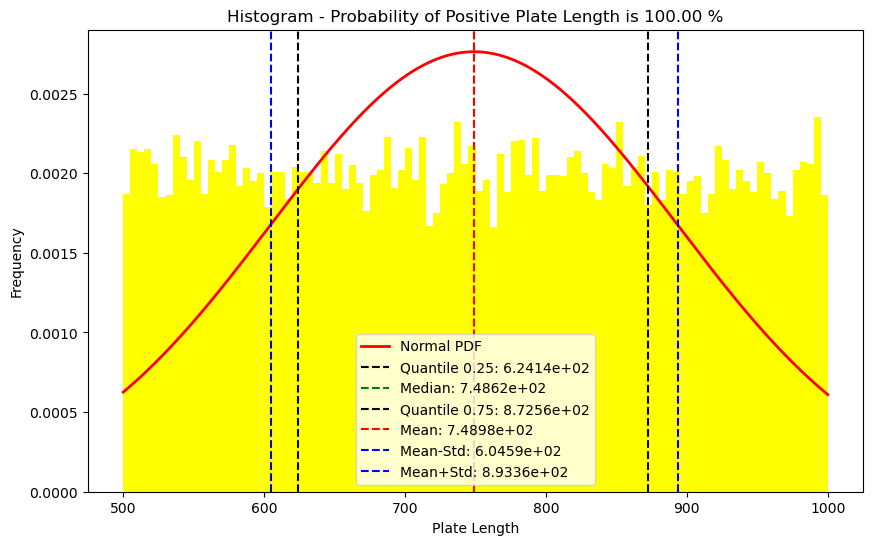

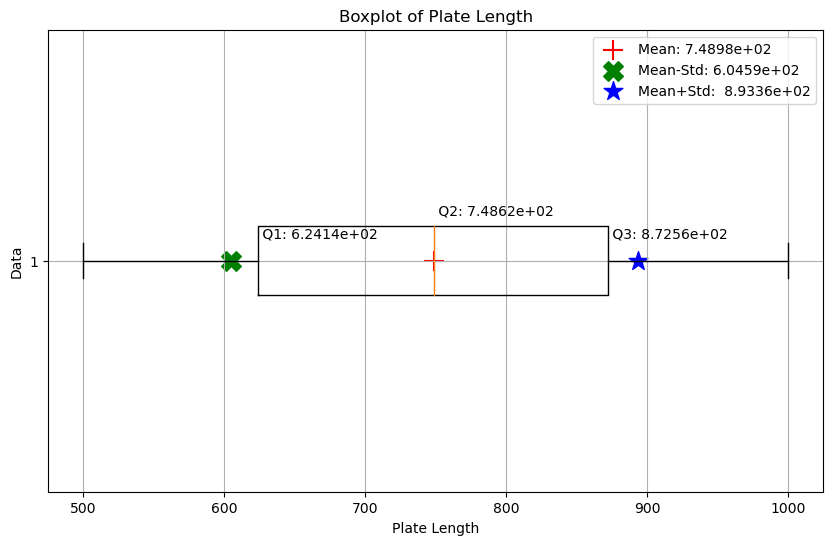

In [56]:
HISROGRAM_BOXPLOT(lr, HISTO_COLOR='yellow', LABEL='Plate Length')

-------------------------
Box-Chart Datas: 
Minimum: 4.0006e+00
First quartile: 6.0115e+00
Median: 7.9729e+00
Mean: 7.9951e+00
Std: 2.2937e+00
Third quartile: 9.9761e+00
Maximum: 1.2000e+01
Skewness: 8.4692e-03
kurtosis: -1.1898e+00
90% Confidence Interval: (4.4125e+00, 1.1573e+01)
-------------------------


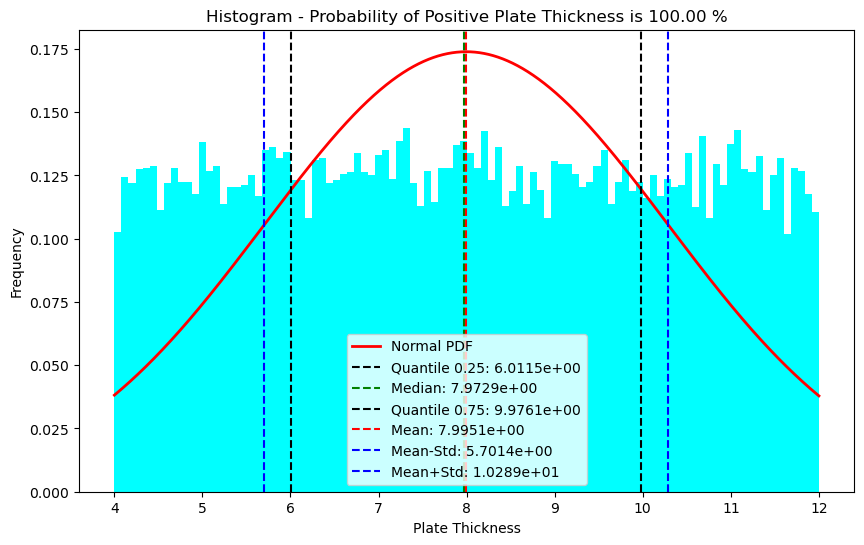

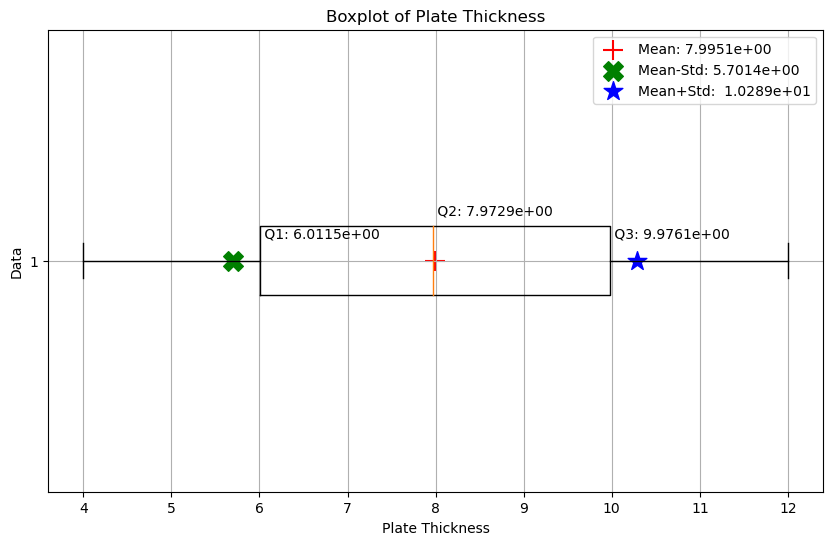

In [57]:
HISROGRAM_BOXPLOT(tr, HISTO_COLOR='cyan', LABEL='Plate Thickness')

-------------------------
Box-Chart Datas: 
Minimum: 3.2484e-06
First quartile: 6.3641e-06
Median: 9.3066e-06
Mean: 1.0141e-05
Std: 4.7542e-06
Third quartile: 1.2659e-05
Maximum: 3.0885e-05
Skewness: 1.0412e+00
kurtosis: 1.0042e+00
90% Confidence Interval: (4.3650e-06, 2.0242e-05)
-------------------------


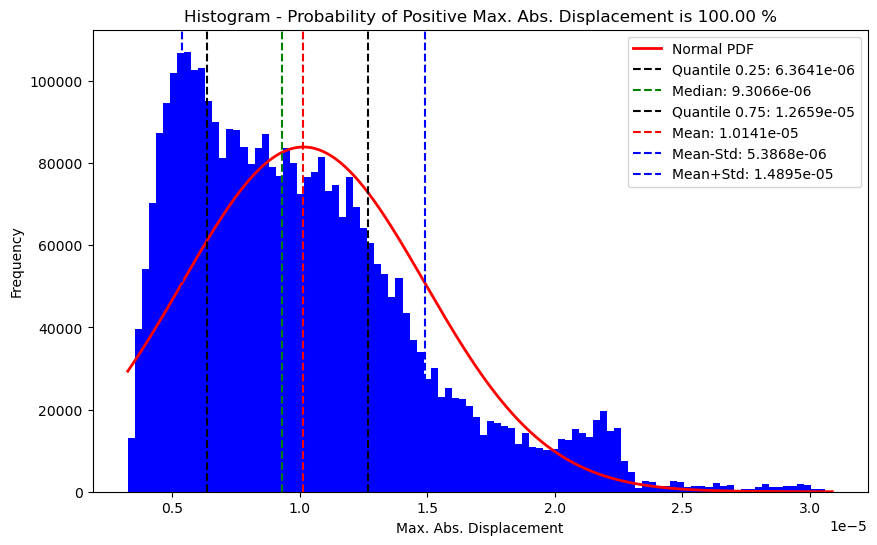

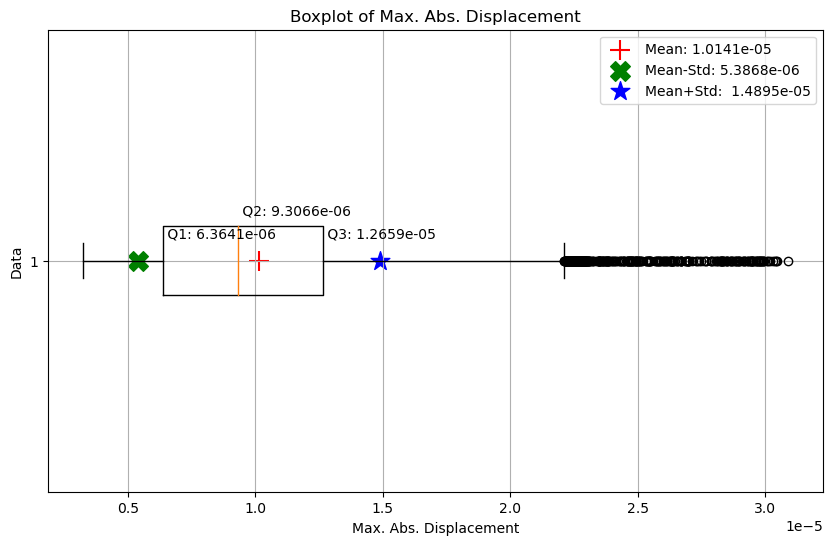

In [58]:
HISROGRAM_BOXPLOT(dd, HISTO_COLOR='blue', LABEL='Max. Abs. Displacement')

-------------------------
Box-Chart Datas: 
Minimum: 4.0570e-01
First quartile: 4.1000e-01
Median: 4.2046e-01
Mean: 4.2824e-01
Std: 2.8407e-02
Third quartile: 4.2821e-01
Maximum: 6.0451e-01
Skewness: 2.5218e+00
kurtosis: 7.0069e+00
90% Confidence Interval: (4.0723e-01, 5.0301e-01)
-------------------------


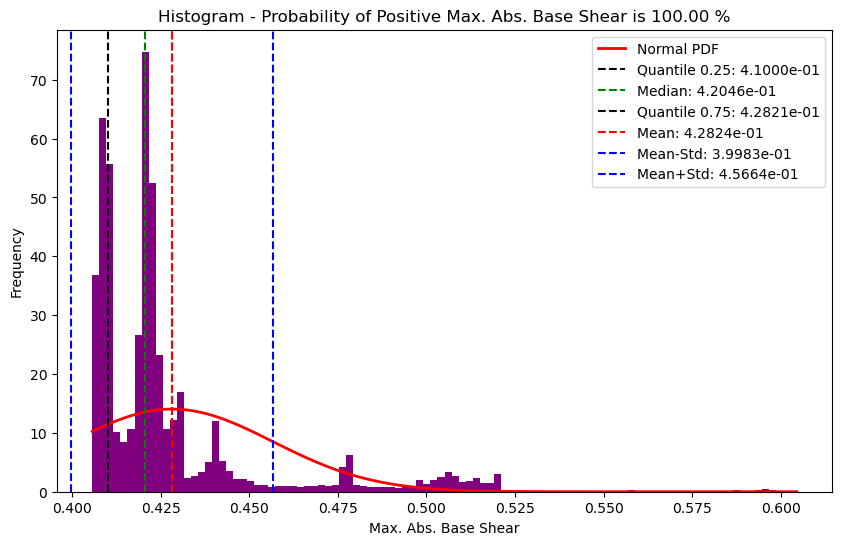

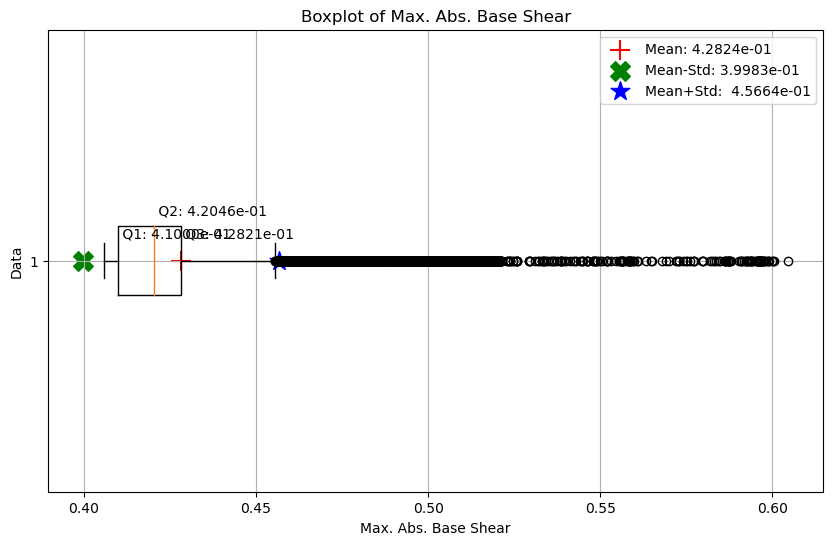

In [52]:
HISROGRAM_BOXPLOT(bs, HISTO_COLOR='purple', LABEL='Max. Abs. Base Shear')

-------------------------
Box-Chart Datas: 
Minimum: 1.0000e+05
First quartile: 1.0000e+05
Median: 1.0000e+05
Mean: 1.0000e+05
Std: 0.0000e+00
Third quartile: 1.0000e+05
Maximum: 1.0000e+05
Skewness: nan
kurtosis: nan
90% Confidence Interval: (1.0000e+05, 1.0000e+05)
-------------------------


C:\Users\Dell\AppData\Local\Temp\ipykernel_5004\2295424640.py:46: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  SKEW = skew(X)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5004\2295424640.py:47: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  KURT = kurtosis(X)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5004\2295424640.py:62: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(f'Skewness: {skew(X) :.4e}')
C:\Users\Dell\AppData\Local\Temp\ipykernel_5004\2295424640.py:63: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Resu

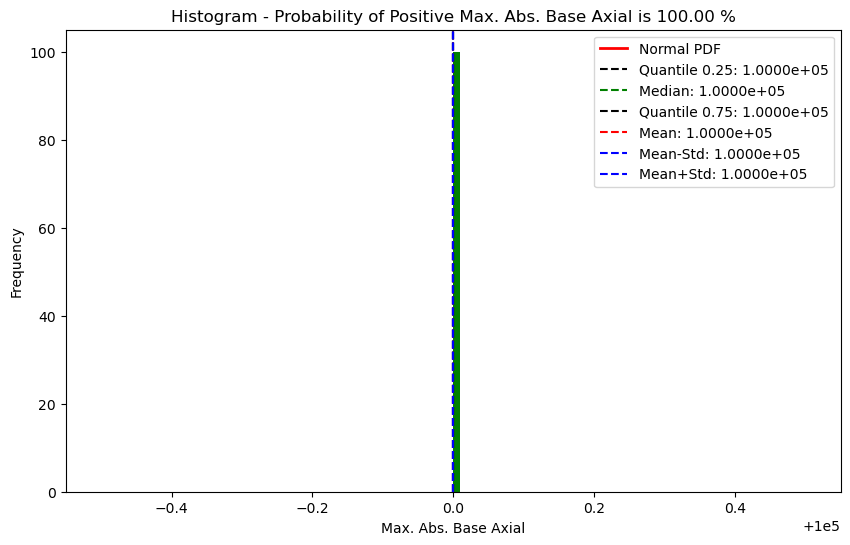

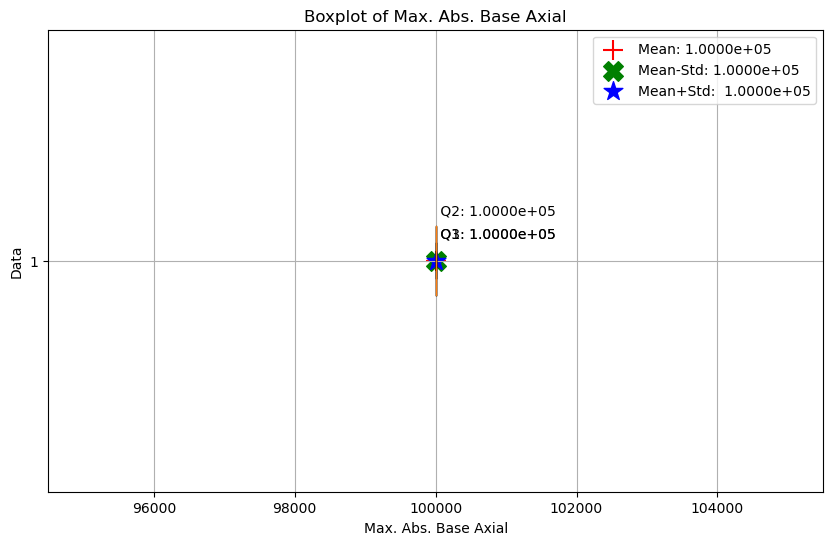

In [53]:
HISROGRAM_BOXPLOT(AS, HISTO_COLOR='green', LABEL='Max. Abs. Base Axial')

-------------------------
Box-Chart Datas: 
Minimum: 2.0297e+02
First quartile: 2.5655e+02
Median: 3.1485e+02
Mean: 3.2368e+02
Std: 8.0820e+01
Third quartile: 3.7432e+02
Maximum: 6.0415e+02
Skewness: 5.8239e-01
kurtosis: -2.9164e-01
90% Confidence Interval: (2.1391e+02, 4.7956e+02)
-------------------------


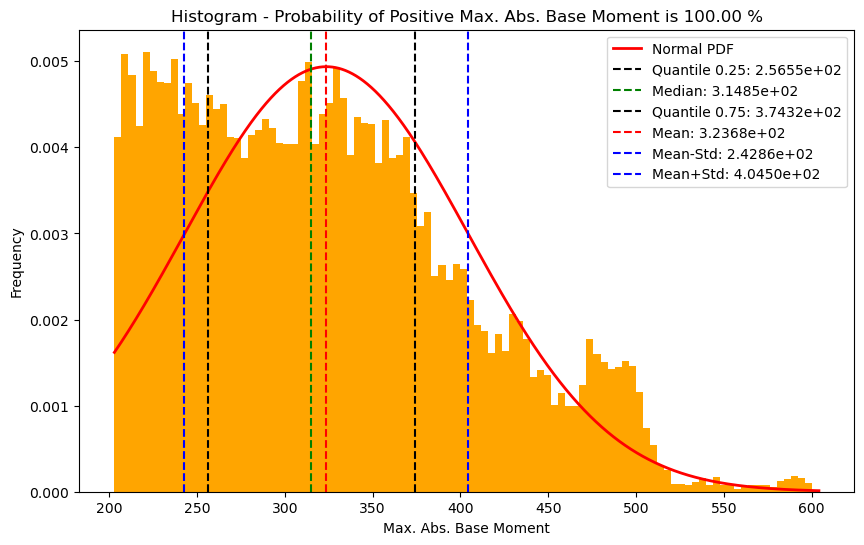

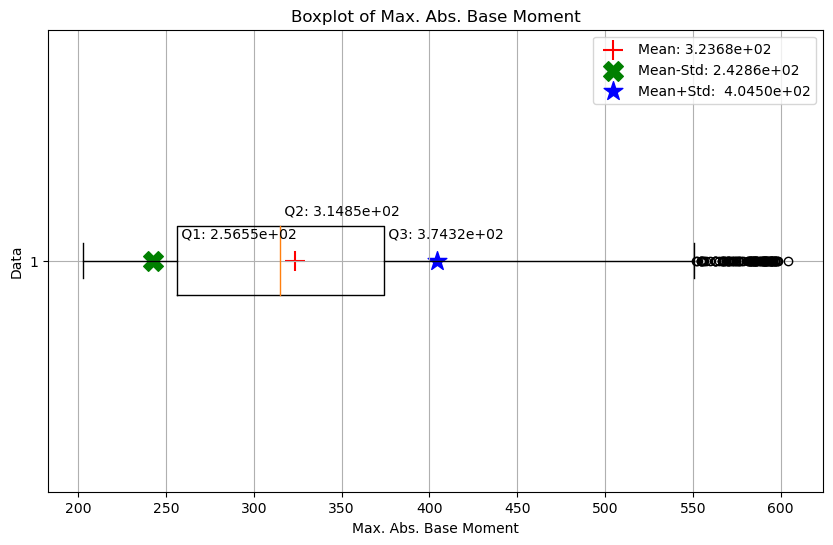

In [55]:
HISROGRAM_BOXPLOT(ms, HISTO_COLOR='orange', LABEL='Max. Abs. Base Moment')

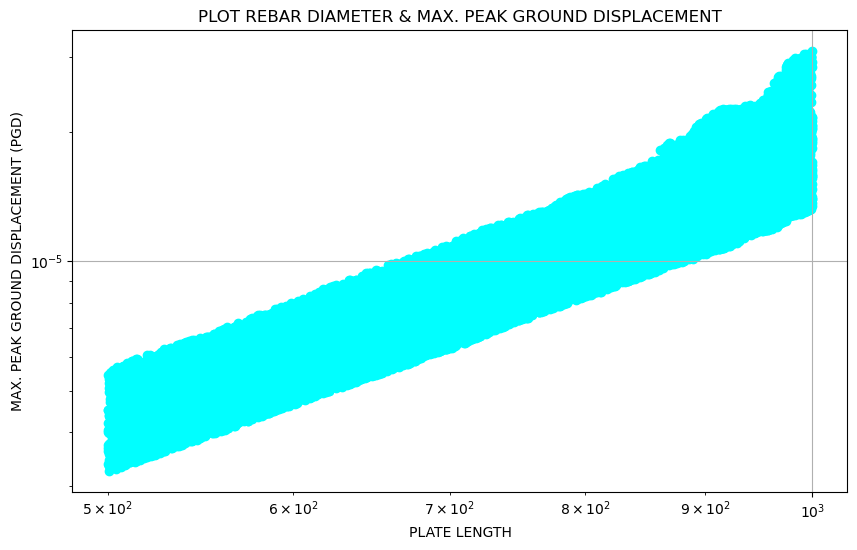

In [63]:
PLOT_SCATTER(lr, dd , XLABEL= 'PLATE LENGTH', YLABEL='MAX. PEAK GROUND DISPLACEMENT (PGD)', TITLE='PLOT PLATE LENGTH & MAX. PEAK GROUND DISPLACEMENT', COLOR = 'cyan') 
#plot_scatter_plotly(lr, dd , XLABEL= 'PLATE LENGTH', YLABEL='MAX. PEAK GROUND DISPLACEMENT (PGD)', TITLE='PLOT PLATE LENGTH & MAX. PEAK GROUND DISPLACEMENT', COLOR = 'cyan')

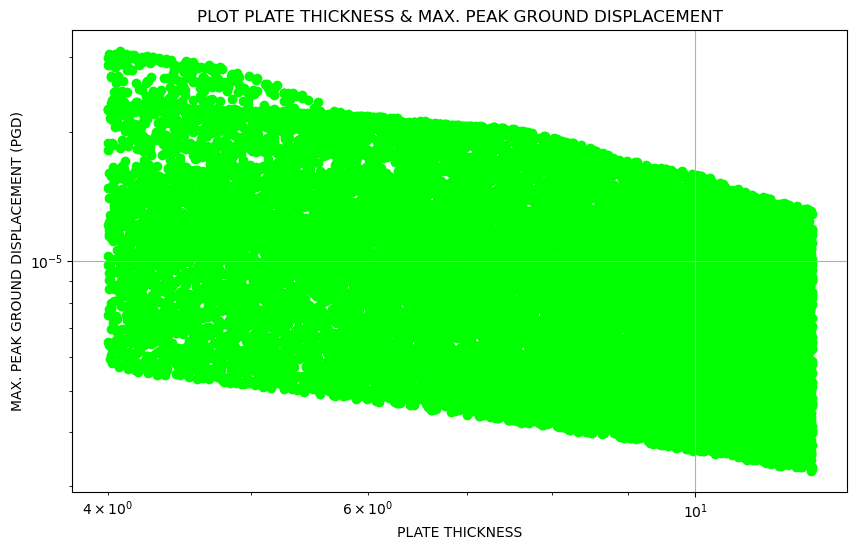

In [64]:
PLOT_SCATTER(tr, dd , XLABEL= 'PLATE THICKNESS', YLABEL='MAX. PEAK GROUND DISPLACEMENT (PGD)', TITLE='PLOT PLATE THICKNESS & MAX. PEAK GROUND DISPLACEMENT', COLOR = 'lime') 
#plot_scatter_plotly(lr, dd , XLABEL= 'PLATE THICKNESS', YLABEL='MAX. PEAK GROUND DISPLACEMENT (PGD)', TITLE='PLOT PLATE THICKNESS & MAX. PEAK GROUND DISPLACEMENT', COLOR = 'lime')

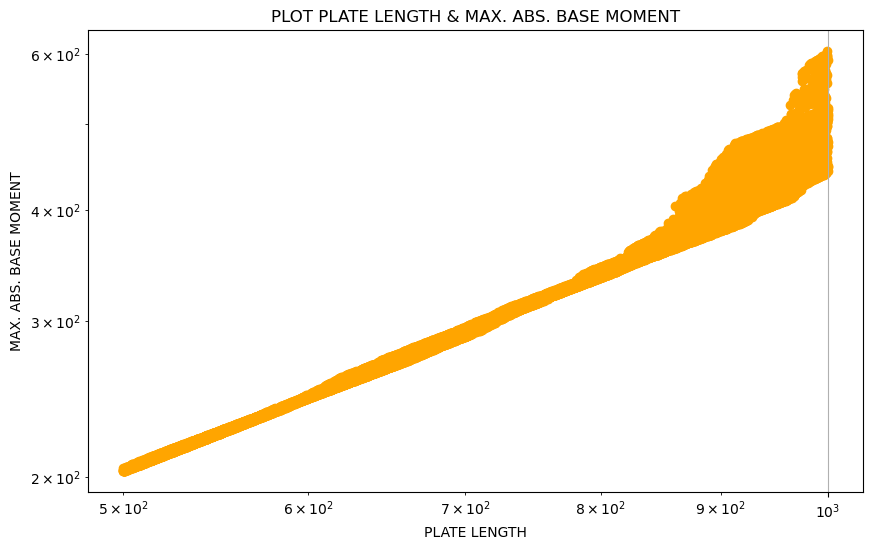

In [65]:
PLOT_SCATTER(lr, ms , XLABEL= 'PLATE LENGTH', YLABEL='MAX. ABS. BASE MOMENT', TITLE='PLOT PLATE LENGTH & MAX. ABS. BASE MOMENT', COLOR = 'orange') 
#plot_scatter_plotly(lr, ms , XLABEL= 'PLATE LENGTH', YLABEL='MAX. ABS. BASE MOMENT', TITLE='PLOT PLATE LENGTH & MAX. ABS. BASE MOMENT', COLOR = 'cyan')

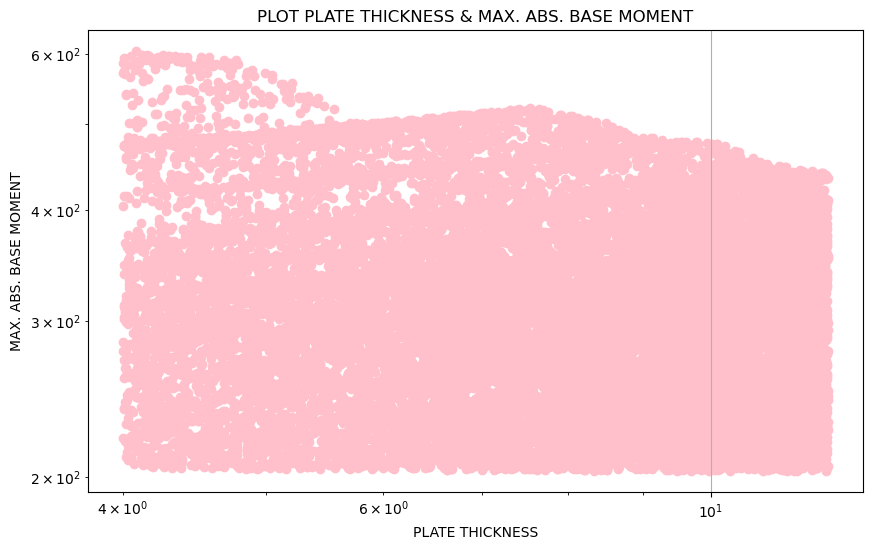

In [66]:
PLOT_SCATTER(tr, ms , XLABEL= 'PLATE THICKNESS', YLABEL='MAX. ABS. BASE MOMENT', TITLE='PLOT PLATE THICKNESS & MAX. ABS. BASE MOMENT', COLOR = 'pink') 
#plot_scatter_plotly(lr, dd , XLABEL= 'PLATE THICKNESS', YLABEL='MAX. ABS. BASE MOMENT', TITLE='PLOT PLATE THICKNESS & MAX. ABS. BASE MOMENT', COLOR = 'pink')

In [70]:
import pandas as pd
# Create a DataFrame
df = pd.DataFrame({'PLATE LENGTH': lr, 'PLATE THICKNESS': tr, 'PGD': dd,'BASE SHEAR': bs,  'BASE MOMENT': ms})
print(df)

       PLATE LENGTH  PLATE THICKNESS       PGD  BASE SHEAR  BASE MOMENT
0        638.491346         7.034541  0.000007    0.411443      262.703
1        920.407698         7.393251  0.000015    0.444188      408.834
2        755.082357        11.989207  0.000007    0.417948      315.585
3        619.391373         6.749728  0.000007    0.410952      254.540
4        844.397642        11.757291  0.000009    0.421959      356.301
...             ...              ...       ...         ...          ...
19995    705.956565        10.787088  0.000007    0.414022      292.281
19996    866.297796        10.052817  0.000011    0.422092      365.658
19997    921.609909        10.937937  0.000012    0.430315      396.582
19998    977.708039         7.293598  0.000019    0.505426      494.159
19999    908.489607         6.723612  0.000015    0.445747      404.956

[20000 rows x 5 columns]


In [71]:
# PLOT HEATMAP FOR CORRELATION 
PLOT_HEATMAP(df)  